<br>

<div align="center">
<h1>Использование языка программирования Julia для решения математических и инженерных задач
<br> 
<br> 
Часть II</h1>
</div>

<br>

<br>

<br>

<br>

<br>

<br>


<br>


**<span style="font-size: 1.1em">Автор:</span>** **Чуракова Юлия Романовна**  
*Студентка факультета математики и компьютерных наук*  
*Кубанского Государственного Университета*

**<span style="font-size: 1.1em">Автор:</span>** **Алексеев Евгений Ростиславович**  
*Кандидат технических наук, доцент*  
*Доцент кафедры информационных технологий*  
*Кубанского Государственного Университета*

<br>

<br>

<br>

<br>

<br>

<br>

<br>

---


**Полная версия пособия доступна в репозитории:** [https://github.com/JuliaChurakova/Julia](https://github.com/JuliaChurakova/Julia)

---



# Глава 12 Решение задач линейной алгебры

## 12.1 Определения и свойства матриц

**Матрицей** размера $m \times n$ называется прямоугольная таблица элементов, состоящая из $m$ строк и $n$ столбцов:
$$
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
$$

**Квадратной** называется матрица, у которой число строк равно числу столбцов ($m = n$).

**Главной диагональю** квадратной матрицы называется совокупность элементов, у которых номер строки совпадает с номером столбца:
$$
a_{11}, a_{22}, a_{33}, ..., a_{nn}
$$

**Побочной диагональю** называется совокупность элементов, у которых сумма индексов равна $n+1$:
$$
a_{1n}, a_{2(n-1)}, a_{3(n-2)}, ..., a_{n1}
$$

**Диагональной** называется квадратная матрица, у которой все элементы вне главной диагонали равны нулю:
$$
D = \begin{pmatrix}
d_{11} & 0 & \cdots & 0 \\
0 & d_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & d_{nn}
\end{pmatrix}
$$

**Треугольной** называется квадратная матрица, у которой все элементы ниже (*верхняя треугольная*) или выше (*нижняя треугольная*) главной диагонали равны нулю:
$$
U = \begin{pmatrix}
u_{11} & u_{12} & \cdots & u_{1n} \\
0 & u_{22} & \cdots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & u_{nn}
\end{pmatrix}, \quad
L = \begin{pmatrix}
l_{11} & 0 & \cdots & 0 \\
l_{21} & l_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
l_{n1} & l_{n2} & \cdots & l_{nn}
\end{pmatrix}
$$

**Транспонированной** матрицей $A^T$ называется матрица, полученная из исходной заменой строк на столбцы:
$$
(A^T)_{ij} = A_{ji}
$$

**Симметричная матрица равна транспонированной**:
$$
A = A^T.
$$

**Определителем (детерминантом)** квадратной матрицы $A$ называется скалярная величина, обозначаемая $\det A$ или $|A|$, которая вычисляется по формуле:

$$
\det A = \sum_{(\sigma_1, \sigma_2, ..., \sigma_n)} (-1)^s a_{1\sigma_1} a_{2\sigma_2} \cdots a_{n\sigma_n},
$$

где суммирование ведётся по всем перестановкам $(\sigma_1, \sigma_2, ..., \sigma_n)$ чисел $1, 2, ..., n$, а $s$ - число инверсий в перестановке.

Для матрицы $2 \times 2$:
$$
\det A = \begin{vmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{vmatrix}
= a_{11}a_{22} - a_{12}a_{21}
$$

**Обратной** матрицей $A^{-1}$ для квадратной матрицы $A$ называется такая матрица, что:
$$
A \cdot A^{-1} = A^{-1} \cdot A = I,
$$
где $I$ - единичная матрица. Обратная матрица существует только если $\det A \ne 0$.


Знание обратной матрицы позволяет найти решение системы линейных уравнений:
$$
A \cdot x = b \quad \text{или} \quad \sum_{j=1}^{n} a_{ij} x_j = b_i \quad \Rightarrow \quad x = A^{-1} b.
$$

**Собственные числа** $\lambda$ и **собственные векторы** $e$ матрицы $A$ определяются как:
$$
A \cdot e = \lambda \cdot e.
$$

Зная собственное число $\lambda$, можно найти собственный вектор из уравнения $(A - \lambda I) e = 0$. Для треугольной матрицы ($a_{ij} = 0$ при $j < i$) собственные числа равны $\lambda_i = a_{ii}$.





### 12.2 Метод Крамера и метод исключения переменных

Рассмотрим систему линейных уравнений общего вида:

$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2 \\
\vdots \\
a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = b_n \\
\end{cases}
$$

Матричная форма записи:

$$
A\mathbf{x} = \mathbf{b},
$$

где $A$ – матрица коэффициентов $n \times n$, $\mathbf{x}$ – вектор неизвестных, $\mathbf{b}$ – вектор правых частей.

#### 12.2.1 Метод Крамера

Решение системы выражается через определители:

$$
x_i = \frac{\det A_i}{\det A}, \quad i = 1, 2, ..., n
$$

где $A_i$ – матрица, полученная заменой $i$-го столбца матрицы $A$ на вектор $\mathbf{b}$:

$$
A_i = \begin{pmatrix}
a_{11} & \cdots & a_{1(i-1)} & b_1 & a_{1(i+1)} & \cdots & a_{1n} \\
a_{21} & \cdots & a_{2(i-1)} & b_2 & a_{2(i+1)} & \cdots & a_{2n} \\
\vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots \\
a_{n1} & \cdots & a_{n(i-1)} & b_n & a_{n(i+1)} & \cdots & a_{nn} \\
\end{pmatrix}
$$

Несмотря на простоту, метод становится непрактичным для систем большой размерности, поскольку требует вычисления большого количества определителей, что приводит к росту вычислительной сложности.

#### 12.2.2 Метод исключения переменных (метод Гаусса)

Первым шагом алгоритма является формирование расширенной матрицы $(A|\mathbf{b})$, которая объединяет матрицу коэффициентов $A$ и вектор правых частей $\mathbf{b}$:

$$
(A|\mathbf{b}) = \left(
\begin{array}{cccc|c}
a_{11} & a_{12} & \cdots & a_{1n} & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & b_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} & b_n
\end{array}
\right)
$$

Первый этап решения системы уравнений, называемый прямым ходом метода Гаусса, заключается в приведении расширенной матрицы к треугольному виду.

Сначала необходимо обнулить элементы первого столбца расширенной матрицы. Для этого необходимо из каждой строки (начиная со второй) вычесть первую строку, умноженную на некоторый множитель $M$.

Для второй строки множитель вычисляется по формуле:
$$
\begin{equation}
M = \frac{a_{21}}{a_{11}}
\end{equation}
$$

Для третьей строки:
$$
\begin{equation}
M = \frac{a_{31}}{a_{11}}
\end{equation}
$$

Для $i$-й строки:
$$
\begin{equation}
M = \frac{a_{i1}}{a_{11}}
\end{equation}
$$

После вычисления множителя выполняется преобразование строки:
$$
\begin{equation}
\begin{aligned}
a_{ij} &= a_{ij} - M \cdot a_{1j}, \quad j = 1, 2, 3, \ldots, n \\
b_i &= b_i - M \cdot b_1
\end{aligned}
\end{equation}
$$


После завершения прямого хода система принимает верхнетреугольный вид:

$$
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
0 & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & a_{nn}
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{pmatrix}
$$

Обратный ход метода Гаусса выполняется снизу вверх:

$$x_n = \frac{b_n}{a_{nn}}$$

В случае, если $a_{nn}=0$ и $b_n=0$, то система имеет бесконечное множество решений. Если $a_{nn}=0$ и $b_n \ne 0$, то система решения не имеет.

$$x_{n-1} = \frac{b_{n-1} - a_{n-1,n}x_n}{a_{n-1,n-1}}$$
$$x_{n-2} = \frac{b_{n-2} - a_{n-2,n-1}x_{n-1} - a_{n-2,n}x_n}{a_{n-2,n-2}}$$

Общая формула для $k$-й переменной:

$$x_k = \frac{b_k - \sum_{j=k+1}^{n} a_{kj}x_j}{a_{kk}}, \quad k = n, n-1, \ldots, 1$$

При численной реализации метода Гаусса возникают проблемы, когда диагональные элементы $a_{nn}$оказываются малыми по величине. В таких случаях деление на малые числа приводит к значительным ошибкам округления и снижает точность вычислений.

Избежать этого можно, выбрав главный (максимальный по модулю) элемент среди столбца $a_{in}$, и перестановкой строк переведя его на главную диагональ перед исключением. Такая процедура заметно уменьшит погрешность при численной реализации метода Гаусса. Соответствующий метод называют **методом Гаусса с выбором гравного элемента**.

**Задача 1.** Написать программу решения системы линейных алгебраический уравнений методом Гаусса на языке Julia. Метод 
Гаусса оформить в виде функции.

In [1]:
# Функция для выполнения метода Гаусса
function gause(A, B, n)
    b = copy(B)
    a = copy(A)

    for k in 1:n
        maxindex = k
        maxval = abs(a[k, k])

        for i in k+1:n
            if abs(a[i, k]) > maxval
                maxval = abs(a[i, k])
                maxindex = i
            end
        end

        for i in k:n
            a[k, i], a[maxindex, i] = a[maxindex, i], a[k, i]
        end
        b[k], b[maxindex] = b[maxindex], b[k]

        for i = k+1:n
            M = a[i, k] / a[k, k]
            for j = k:n
                a[i, j] -= M * a[k, j]
            end
            b[i] -= M * b[k]
        end
    end

        x = zeros(n)
        for i = n:-1:1
            s=0
            for j in i+1:n
            s=s+a[i,j]*x[j];
        end
            x[i] = (b[i] - s) / a[i, i]
        end

    return x
end

println("Введите количество строк (n):")
n = parse(Int, readline())
println("Введите количество столбцов (m):")
m = parse(Int, readline())

println("Введите элементы матрицы A($n x $m):")
A = zeros(Float64, n, m)
for i in 1:n
    for j in 1:m
   t = parse(Float64, readline())
    A[i,j] = t
end
end

println("Введите элементы массива a($n)")
a = zeros(Float64, n)
for i in 1:n
    k = parse(Float64, readline())
    a[i] = k
end

coef = gause(A, a,n)

Введите количество строк (n):


stdin>  3


Введите количество столбцов (m):


stdin>  3


Введите элементы матрицы A(3 x 3):


stdin>  5
stdin>  7
stdin>  8
stdin>  4
stdin>  6
stdin>  8
stdin>  6
stdin>  5
stdin>  3


Введите элементы массива a(3)


stdin>  2
stdin>  3
stdin>  0


3-element Vector{Float64}:
  0.9285714285714305
 -1.9285714285714317
  1.3571428571428585

## 12.3 Итерационные методы 

Итерационные методы лучше применять в случае, когда мы имеем дело с задачами большой размерности, где метод Гаусса становятся вычислительно неэффективным.

### 12.3.1 Метод простой интерации

Предположим, что некоторая матрица $B$ имеет обратную матрицу, то есть её определитель отличен от нуля: $\det B \neq 0$. Тогда исходное уравнение

$$
Ax = b
$$

можно преобразовать к эквивалентному виду:

$$
x = x + B(b - Ax)
$$

Данное представление позволяет построить итерационный процесс:

$$
x^{(k+1)} = x^{(k)} + B(b - Ax^{(k)}) = Dx^{(k)} + c,
$$

где $D = I - BA$, а $c = Bb$.

Итерационный процесс сходится к точному решению при любом начальном приближении тогда и только тогда, когда все собственные значения $\lambda_i$ матрицы $D$ меньше 1 по модулю:

$$
|\lambda_i(D)| < 1 \quad \text{для всех } i = 1, 2, \ldots, n
$$

Матрицу $A$ можно представиь в виде суммы трех матриц:
$$A = D + L + U$$,
где:
- $D$ – диагональная часть матрицы $A$;
- $L$ – строго нижняя треугольная часть;
- $U$ – строго верхняя треугольная часть.


$$
D =\begin{pmatrix}
a_{11} & 0 & \cdots & 0 \\
0 & a_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & a_{nn}
\end{pmatrix}, \quad
L = \begin{pmatrix}
0 & 0 & \cdots & 0 \\
a_{21} & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & 0
\end{pmatrix}, \quad
U = \begin{pmatrix}
0 & a_{12} & \cdots & a_{1n} \\
0 & 0 & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{pmatrix}
$$


### 12.3.2 Метод Якоби
Представим матрицу $A$ в виде суммы $A = D + L + U$ и выбираем $B = D^{-1}.$

Тогда:
$$x^{(k+1)} = x^{(k)} + D^{-1}(b - (D + L + U)x^{(k)})$$


Упрощаем:
$$x^{(k+1)} = D^{-1}(b - (L + U)x^{(k)})$$

Явная формула для вычисления компонент решения на каждом шаге:
$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j \neq i, i = 1}^n a_{ij}x_j^{(k)} \right)$$

**Достаточный признак сходимости метода Якоби.**

В случае диагонального преобладания в матрице A метод Якоби сходится

$$
|a_{ii}| > \sum_{j \neq i, i = 1}^n |a_{ij}|
$$



### 12.3.3 Метод Гаусса-Зейделя

Представим матрицу $A$ в виде суммы нижней треугольной матрицы $L$ и строго верхней треугольной матрицы $U$:

$$
A = L + U
$$

$$
L = \begin{pmatrix}
a_{11} & 0 & \cdots & 0 \\
a_{21} & a_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}, \quad
U = \begin{pmatrix}
0 & a_{12} & \cdots & a_{1n} \\
0 & 0 & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{pmatrix}
$$


Итерационный процесс:
$$
\mathbf{x}^{(k+1)} = L^{-1}(\mathbf{b} - U\mathbf{x}^{(k)})
$$

Явная формула для вычисления компонент решения на каждом шаге:

$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right), \quad i = 1, 2, \ldots, n
$$

**Достаточный признак сходимости метода Якоби и метода Гаусса-Зейделя.**

В случае диагонального преобладания в матрице A метод Якоби и метод Гаусса-Зейделя сходятся.

$$
|a_{ii}| > \sum_{j \neq i, i = 1}^n |a_{ij}|
$$


**Критерии остановки:**
$$
\|\mathbf{x}^{(k+1)} - \mathbf{x}^{(k)}\| < \varepsilon
$$
или
$$
\|A\mathbf{x}^{(k)} - \mathbf{b}\| < \varepsilon
$$





In [1]:

function jacobi(A, b; tol=1e-6, max_iter=1000)
    n = length(b)
    x = zeros(n)
    x_new = zeros(n)
    
    for k in 1:max_iter
        # Вычисляем новое приближение для каждой компоненты
        for i in 1:n
            sum = 0.0
            for j in 1:n
                if j != i
                    sum += A[i, j] * x[j]
                end
            end
            x_new[i] = (b[i] - sum) / A[i, i]
        end
        
        # Проверка сходимости
        delta = 0.0
        for i in 1:n
            delta += abs(x_new[i] - x[i])
        end
        
        if delta < tol
            println("Сходимость достигнута на итерации $k")
            return x_new
        end
        
        # Обновляем решение
        for i in 1:n
            x[i] = x_new[i]
        end
    end
    
    println("Достигнуто максимальное число итераций")
    return x
end

function gauss_seidel(A, b; tol=1e-6, max_iter=1000)
    n = length(b)
    x = zeros(n)
    x_new = copy(x)
    
    for k in 1:max_iter
        # Последовательно обновляем каждую компоненту в x_new
        for i in 1:n
            sum = 0.0
            for j in 1:n
                if j != i
                    # Для j < i используем новые значения из x_new, для j > i - старые из x
                    if j < i
                        sum += A[i, j] * x_new[j]
                    else
                        sum += A[i, j] * x[j]
                    end
                end
            end
            x_new[i] = (b[i] - sum) / A[i, i]
        end
        
        # Проверка сходимости
        delta = 0.0
        for i in 1:n
            delta += abs(x_new[i] - x[i])
        end
        
        if delta < tol
            println("Сходимость достигнута на итерации $k")
            return x_new
        end
        
        # Обновляем решение для следующей итерации
        for i in 1:n
            x[i] = x_new[i]
        end
    end
    
    println("Достигнуто максимальное число итераций")
    return x_new
end

function check_diagonal_dominance(A)
    n = size(A, 1)
    for i in 1:n
        diag_val = abs(A[i, i])
        row_sum = 0.0
        for j in 1:n
            if j != i 
                row_sum += abs(A[i, j])
            end
        end
        if diag_val <= row_sum
            println("Строка $i: |a_ii| = $diag_val <= Σ|a_ij| = $row_sum")
            return false
        end
    end
    return true
end



# Пример использования
function test_methods()
    
    # Создаем матрицу с диагональным преобладанием
    A = [10.0 8.0 1.0; 1.0 8.0 2.0; 2.0 1.0 6.0]
    
    b = [13.0, 11.0, 9.0]
    
    # Проверка диагонального преобладания
    if check_diagonal_dominance(A)
        println("Матрица имеет строгое диагональное преобладание")
    else
        println("Матрица НЕ имеет строгого диагонального преобладания")
    end
    
    # Тестируем метод Якоби
    println("МЕТОД ЯКОБИ")
    println("-"^30)
    x_jacobi = jacobi(A, b)
    println("Полученное решение: $(round.(x_jacobi, digits=6))")
    println()
    
    # Тестируем метод Гаусса-Зейделя
    println("МЕТОД ГАУССА-ЗЕЙДЕЛЯ")
    println("-"^30)
    x_gs = gauss_seidel(A, b)
    println("Полученное решение: $(round.(x_gs, digits=6))")
    println()
end

# Запускаем тестирование
test_methods()

Матрица имеет строгое диагональное преобладание
МЕТОД ЯКОБИ
------------------------------
Сходимость достигнута на итерации 27
Полученное решение: [0.356643, 1.027972, 1.20979]

МЕТОД ГАУССА-ЗЕЙДЕЛЯ
------------------------------
Сходимость достигнута на итерации 13
Полученное решение: [0.356643, 1.027972, 1.20979]



## 12.4 Библиотека для решения задач линейной алгебры

Для решения задач линейной алгебры предназначена библиотека **LinearAlgebra**. 

Для получения дополнительной информации о пакете см. [документацию.](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/)

Некоторые из функций этой библиотеки представлены в таблице ниже:

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="40%" />
<col width="60%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Команда</th>
<th class="head">Описание</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>norm(A)</td>
<td>Функция используется для вычисления нормы матрицы или вектора.</td>
</tr>
<tr class="row-odd"><td>det(A)</td>
<td>Функция вычисляет определитель матрицы A.</td>
</tr>
<tr class="row-even"><td>inv(A)</td>
<td>Функция используется для нахождения обратной матрицы A.</td>
</tr>
<tr class="row-odd"><td>eigvals(A)</td>
<td>Функция возвращает собственные значения матрицы A.</td>
</tr>
<tr class="row-even"><td>eigvecs(A)</td>
<td>Функция возвращает собственные векторы матрицы A.
</td>
</tr>
<tr class="row-odd"><td>qr(A)</td>
<td> Функция выполняет QR-разложение матрицы A на ортогональную матрицу Q и верхнюю треугольную матрицу R.</td>
</tr>
<tr class="row-even"><td> lu(A)</td>
<td>Функция выполняет LU-разложение матрицы A на нижнюю треугольную матрицу L и верхнюю треугольную матрицу U.</td>
</tr>
<tr class="row-odd"><td>svd(A): </td>
<td>Функция выполняет сингулярное разложение матрицы A на матрицы левых и правых сингулярных векторов U и V соответственно, а также диагональную матрицу сингулярных значений Σ.</td>
</tr>
<tr class="row-even"><td>dot(x, y)</td>
<td>Функция используется для вычисления скалярного произведения двух векторов x и y.</td>
</tr>
<tr class="row-odd"><td>cross(x, y)</td>
<td>Функция используется для вычисления векторного произведения двух трехмерных векторов x и y.</td>
</tr>
<tr class="row-even"><td>adjoint(A):</td>
<td>Функция возвращает сопряженно-транспонированную матрицу A.</td>
</tr>
<tr class="row-odd"><td>rank(A)</td>
<td>Функция возвращает ранг матрицы A.</td>
</tr>
<tr class="row-even"><td>trace(A)</td>
<td>Функция возвращает след матрицы A, т.е. сумму элементов главной диагонали.</td>

**Задача 1.** Написать программу решения системы линейных алгебраический уравнений на языке Julia. Для тестирования программы решения систем линейных алгебраических уравнений будем использовать следующую тестовую систему:
$$
A \cdot x =b
$$
Матрица $A(N,N)$ формируется следующим образом. Диагональные элеменнты равны $2 \dot N$, все остальные элементы матрицы равны 1. 

Вектор правых частей **b** определяется формулой $b_i=\frac{n \cdot (n+1)}{2} +i \cdot (2 \cdot (n-1))$, если элементы нумеруются с 1 и $b_i=\frac{n \cdot (n+1)}{2} +(i+1) \cdot (2 \cdot (n-1))$, если элементы нумеруются с 0. 

Матрица A обладает следующими особенностями:
1. Матрица A имеет диагональное преобладание, что позволяет использовать её в качестве тестовой для итерационных методов (Зейделя, Якоби и т. д.).
2. Заранее известно решение системы любой размерности x=(1,2,3,4,5...).

In [14]:
using LinearAlgebra
using Printf

# Ввод размера матрицы
print("Введите размер матрицы N: ")
N = parse(Int, readline())

# Инициализация матрицы A и вектора b
A = ones(N, N)
b = ones(N)

# Заполнение матрицы A и вектора b
for i in 1:N
    for j in 1:N
        if i == j
            A[i, j] = 2*N  # Диагональные элементы = 2N
        else
            A[i, j] = 1     # Остальные элементы = 1
        end
    end
    b[i] = (N * (N + 1)) / 2 + i * (2*(N - 1))
end

# Вывод матрицы A
println("\nМатрица A:")
for i in 1:N
    for j in 1:N
        @printf("%5.1f ", A[i, j])
    end
    println()
end

# Вывод вектора b
println("\nВектор b:")
for i in 1:N
    @printf("%5.1f\n", b[i])
end

# Решение системы
x = A \ b

# Вывод решения
println("\nКорни уравнения:")
for i in 1:N
    @printf("x[%d] = %8.4f\n", i, x[i])
end


r = A * x - b

println("\nМассив ошибок (невязка):")
for i in 1:N
    @printf("r[%d] = %.15e\n", i, r[i])
end


Введите размер матрицы N: 

stdin>  3



Матрица A:
  6.0   1.0   1.0 
  1.0   6.0   1.0 
  1.0   1.0   6.0 

Вектор b:
 10.0
 14.0
 18.0

Корни уравнения:
x[1] =   0.9500
x[2] =   1.7500
x[3] =   2.5500

Массив ошибок (невязка):
r[1] = 0.000000000000000e+00
r[2] = 0.000000000000000e+00
r[3] = -3.552713678800501e-15


**Задача 2.** Написать программу найхождения определителя матрицы, вычисления обратной матрицы, нахождения собственные значений и собственные векторов матрицы.



In [27]:
using LinearAlgebra
using Printf

print("Введите размер матрицы N: ")
N = parse(Int, readline())
A = ones(N, N)

for i in 1:N
    for j in 1:N
        if i == j
            A[i, j] = 2N
        else
            A[i, j] = 1
        end
    end
end

@printf("Исходная матрица А:\n");
for i in 1:N
    for j in 1:N
        @printf("%8.2f\t", A[i, j])
    end
    @printf("\n");
end

a1 = inv(A)
@printf("\nОбратная матрица к матрице А:\n");
for i in 1:N
    for j in 1:N
        @printf("%8.5f\t", a1[i, j])
    end
    @printf("\n");
end

@printf("\nПроверка:\n");
a2 = A  *  a1
for i in 1:N
    for j in 1:N
        @printf("%8.5f\t", a2[i, j])
    end
    @printf("\n");
end

dt = det(A)
@printf("\nОпределитель:%8.4f\n", dt)

a3 = eigvals(A)
a4 = eigvecs(A)

@printf("\nСобственные числа:")
for j in 1:N
    @printf("%8.5f\t", a3[j])
end
@printf("\n\nСобственные вектора:\n");
for i in 1:N
    for j in 1:N
        @printf("%8.5f\t", a4[i, j])
    end
    @printf("\n");
end


Введите размер матрицы N: 

stdin>  4


Исходная матрица А:
    1.00	    1.00	    1.00	
    1.00	    8.00	    1.00	    1.00	
    1.00	    1.00	    8.00	    1.00	
    1.00	    1.00	    1.00	    8.00	

Обратная матрица к матрице А:
 0.12987	-0.01299	-0.01299	-0.01299	
-0.01299	 0.12987	-0.01299	-0.01299	
-0.01299	-0.01299	 0.12987	-0.01299	
-0.01299	-0.01299	-0.01299	 0.12987	

Проверка:
 1.00000	-0.00000	 0.00000	 0.00000	
 0.00000	 1.00000	 0.00000	 0.00000	
-0.00000	-0.00000	 1.00000	 0.00000	
-0.00000	 0.00000	 0.00000	 1.00000	

Определитель:3773.0000

Собственные числа: 7.00000	 7.00000	 7.00000	11.00000	

Собственные вектора:
-0.40825	 0.70711	-0.28868	-0.50000	
-0.40825	-0.70711	-0.28868	-0.50000	
 0.81650	-0.00000	-0.28868	-0.50000	
 0.00000	 0.00000	 0.86603	-0.50000	


# Глава 13 Решение задач обработки эксперимента

## 13.1 Метод наименьших квадратов

**Метод наименьших квадратов (МНК)** – это математический подход, позволяющий найти аналитическую функцию, наилучшим образом приближающую экспериментальные данные. Иными словами, с помощью МНК можно подобрать такую функцию, которая будет максимально близко проходить к заданным точкам.

Предположим, в ходе эксперимента получена некоторая зависимость $y(x)$, представленная в виде таблицы:

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| $x$ |$x_1$|$x_2$|$x_3$|...|$x_{n-1}$|$x_n$| 
| $y$ |$y_1$|$y_2$|$y_3$|...|$y_{n-1}$|$y_n$| 


Требуется построить аналитическую зависимость $f(x, a_1, a_2, \dots, a_k)$, которая с высокой точностью описывает экспериментальные данные. Построение подобной кривой называют **аппроксимацией** экспериментальных значений.

Суть МНК заключается в том, чтобы подобрать параметры функции $f(x, a_1, a_2, \dots, a_k)$ таким образом, чтобы сумма квадратов отклонений между измеренными значениями $ y_i$ и расчётными $Y_i = f(x_i, a_1, a_2, \dots, a_k)$ была минимальной.

$$
S(a_1, a_2, \dots, a_k) = \sum_{i=1}^n (y_i - (f(x, a_1, a_2, \dots, a_k)))^2 \rightarrow \min
$$

**Этапы решения задачи:**  

1. на основе экспериментальных данных подбирается вид функции  $Y = f(x, a_1, a_2, \dots, a_k)$;

2. подобрать коэффициенты  $a_1, a_2, \dots, a_k$ выбранной зависимости. 

Таким образом, МНК сводится к оптимизационной задаче, где коэффициенты подбираются так, чтобы минимизировать расхождения между моделью и реальными данными.

### 13.1.1 Подбор параметров экспериментальной зависимости методом наименьших квадратов

Для решения задачи подбора параметров методом наименьших квадратов воспользуемся достаточным условием минимума функции.

**Достаточное условие минимума:**
$$
\frac{\partial S}{\partial a_j} = 0, \quad j = 1, 2, \dots, k
$$

Если параметры $a_i$ входят в зависимость $Y = f(x, a_1 , a_2 , …, a_k )$ линейно, то
получим систему из k линейных уравнений с k неизвестными:

$$
\begin{cases}
\sum_{i=1}^n 2[y_i - f(x_i, a_1, a_2, \dots, a_k)] \frac{\partial f}{\partial a_1} = 0 \\
\sum_{i=1}^n 2[y_i - f(x_i, a_1, a_2, \dots, a_k)] \frac{\partial f}{\partial a_2} = 0 \\
\vdots \\
\sum_{i=1}^n 2[y_i - f(x_i, a_1, a_2, \dots, a_k)] \frac{\partial f}{\partial a_k} = 0
\end{cases}
$$


#### 13.1.1.1 Подбор коэффициентов линейной зависимости

Рассмотрим подбор параметров линейной функции вида:

$$
Y = a_1 + a_2x
$$

Функция суммы квадратов отклонений для этого случая принимает вид:

$$
S(a_1, a_2) = \sum_{i=1}^n [y_i - (a_1 + a_2x_i)]^2 \rightarrow \min
$$

Для нахождения минимума приравняем частные производные к нулю:

$$
\begin{cases}
\frac{\partial S}{\partial a_1} = -2\sum_{i=1}^n [y_i - (a_1 + a_2x_i)] = 0 \\
\frac{\partial S}{\partial a_2} = -2\sum_{i=1}^n [y_i - (a_1 + a_2x_i)]x_i = 0
\end{cases} 
$$

После преобразований получаем систему уравнений:

$$
\begin{cases}
na_1 + a_2\sum_{i=1}^n x_i = \sum_{i=1}^n y_i \\
a_1\sum_{i=1}^n x_i + a_2\sum_{i=1}^n x_i^2 = \sum_{i=1}^n x_i y_i
\end{cases}
$$

Решение данной системы дает искомые коэффициенты:

$$
a_1 = \frac{\sum_{i=1}^n y_i - a_2\sum_{i=1}^n x_i}{n} 
$$
$$
a_2 = \frac{n\sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}
$$

#### 13.1.1.2 Подбор коэффициентов полинома k-й степени

Для полиномиальной зависимости второго порядка:

$$
Y = a_1 + a_2x + a_3x^2
$$

Функция суммы квадратов отклонений:

$$
S(a_1, a_2, a_3) = \sum_{i=1}^n [y_i - (a_1 + a_2x_i + a_3x_i^2)]^2
$$

После дифференцирования S по $a_1 , a_2 и a_3$ получим систему линейных алгебраических уравнений:

$$
\begin{cases}
n a_1 + a_2 \sum_{i=1}^n x_i + a_3 \sum_{i=1}^n x_i^2 = \sum_{i=1}^n y_i \\
a_1 \sum_{i=1}^n x_i + a_2 \sum_{i=1}^n x_i^2 + a_3 \sum_{i=1}^n x_i^3 = \sum_{i=1}^n x_i y_i \\
a_1 \sum_{i=1}^n x_i^2 + a_2 \sum_{i=1}^n x_i^3 + a_3 \sum_{i=1}^n x_i^4 = \sum_{i=1}^n x_i^2 y_i
\end{cases}
$$
Решив систему, найдём значения параметров $a_1 , a_2 и a_3$.
Для полинома третьей степени:

$$
Y = a_1 + a_2x + a_3x^2 + a_4x^3
$$

cистема уравнений имеет следующий вид:

$$
\begin{cases}
n a_1 + a_2 \sum_{i=1}^n x_i + a_3 \sum_{i=1}^n x_i^2 + a_4 \sum_{i=1}^n x_i^3 = \sum_{i=1}^n y_i \\
a_1 \sum_{i=1}^n x_i + a_2 \sum_{i=1}^n x_i^2 + a_3 \sum_{i=1}^n x_i^3 + a_4 \sum_{i=1}^n x_i^4 = \sum_{i=1}^n x_i y_i \\
a_1 \sum_{i=1}^n x_i^2 + a_2 \sum_{i=1}^n x_i^3 + a_3 \sum_{i=1}^n x_i^4 + a_4 \sum_{i=1}^n x_i^5 = \sum_{i=1}^n x_i^2 y_i \\
a_1 \sum_{i=1}^n x_i^3 + a_2 \sum_{i=1}^n x_i^4 + a_3 \sum_{i=1}^n x_i^5 + a_4 \sum_{i=1}^n x_i^6 = \sum_{i=1}^n x_i^3 y_i
\end{cases}
$$

Для полинома k-й степени вида:

$$
Y = a_1 + a_2x + a_3x^2 + \cdots + a_{k+1}x^k
$$

cистема уравнений имеет следующий вид:

$$
\begin{cases}
a_1 n + a_2 \sum_{i=1}^n x_i + a_3 \sum_{i=1}^n x_i^2 + \cdots + a_{k+1} \sum_{i=1}^n x_i^k = \sum_{i=1}^n y_i \\
a_1 \sum_{i=1}^n x_i + a_2 \sum_{i=1}^n x_i^2 + a_3 \sum_{i=1}^n x_i^3 + \cdots + a_{k+1} \sum_{i=1}^n x_i^{k+1} = \sum_{i=1}^n x_i y_i \\
a_1 \sum_{i=1}^n x_i^2 + a_2 \sum_{i=1}^n x_i^3 + a_3 \sum_{i=1}^n x_i^4 + \cdots + a_{k+1} \sum_{i=1}^n x_i^{k+2} = \sum_{i=1}^n x_i^2 y_i \\
\vdots \\
a_1 \sum_{i=1}^n x_i^k + a_2 \sum_{i=1}^n x_i^{k+1} + a_3 \sum_{i=1}^n x_i^{k+2} + \cdots + a_{k+1} \sum_{i=1}^n x_i^{2k} = \sum_{i=1}^n x_i^k y_i
\end{cases}
$$

В матричной форме:

$$
\begin{pmatrix}
n & \sum_{i=1}^n x_i & \sum_{i=1}^n x_i^2 & \cdots & \sum_{i=1}^n x_i^k \\
\sum_{i=1}^n x_i & \sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i^3 & \cdots & \sum_{i=1}^n x_i^{k+1} \\
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^4 & \cdots & \sum_{i=1}^n x_i^{k+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=1}^n x_i^k & \sum_{i=1}^n x_i^{k+1} & \sum_{i=1}^n x_i^{k+2} & \cdots & \sum_{i=1}^n x_i^{2k}
\end{pmatrix}
\begin{pmatrix}
a_1 \\
a_2 \\
a_3 \\
\vdots \\
a_{k+1}
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^n y_i \\
\sum_{i=1}^n x_i y_i \\
\sum_{i=1}^n x_i^2 y_i \\
\vdots \\
\sum_{i=1}^n x_i^k y_i
\end{pmatrix}
$$

Тогда систему уравнений можно записать в виде:

$$
\mathbf{C}\mathbf{a} = \mathbf{g}
$$

где элементы матрицы $\mathbf{C}$ и вектора $\mathbf{g}$ рассчитываются по формулам:

$$
c_{ij} = \sum_{k=1}^n x_k^{i+j-2}, \quad g_i = \sum_{k=1}^n x_k^{i-1} y_k, \quad i, j = 1,2,...,k+1
$$

#### 13.1.1.3 Подбор коэффициентов для функции $Y = ax^b e^{cx}$

После логарифмирования:

$$
\ln Y = \ln a + b \ln x + cx
$$

С заменой $Y_1 = \ln Y$, $A = \ln a$ получаем линейную форму:

$$
Y_1 = A + b \ln x + cx
$$

После дифференцирования получим систему трёх линейных алгебраических уравнений для определения коэффициентов A, b, c:

$$
\begin{cases}
n A + b \sum_{i=1}^n \ln x_i + c \sum_{i=1}^n x_i = \sum_{i=1}^n \ln y_i \\
A \sum_{i=1}^n \ln x_i + b \sum_{i=1}^n (\ln x_i)^2 + c \sum_{i=1}^n x_i \ln x_i = \sum_{i=1}^n \ln y_i \ln x_i \\
A \sum_{i=1}^n x_i + b \sum_{i=1}^n x_i \ln x_i + c \sum_{i=1}^n x_i^2 = \sum_{i=1}^n x_i \ln y_i
\end{cases}
$$

После решения системы коэффициент $a$ находится как $a = e^A$.

#### 13.1.1.4 Функции, приводимые к линейной

1. Для степенной функции $Y = ax^b$:
   $$
   \ln Y = \ln a + b \ln x
   $$
   Замена: $Z = \ln Y$, $X = \ln x$, $A = \ln a$ → $Z = bX + A$

2. Для экспоненциальной функции $Y = ae^{bx}$:
   $$
   \ln Y = \ln a + bx
   $$
   Замена: $Z = \ln Y$, $A = \ln a$ → $Z = bx + A$

3. $Y = \frac{1}{ax+b}$:


   Замена: $Z = \frac{1}{Y}$ → $Z = ax + b$
5. $Y = \frac{x}{ax+b}$:


   Замена: $Z = \frac{1}{Y}$, $X = \frac{1}{x}$ → $Z = a + bX$
7. $Y = a + be^{-x}$:


   Замена: $Z = Y$, $X = e^{-x}$ → $Z = aX + b$

Аналогичными преобразованиями многие зависимости можно свести к решению системы линейных уравнений, что значительно упрощает вычисления.

### 13.1.2 Точность подбора параметров

После определения параметров модели $f(x, a_1, a_2, ..., a_k)$ необходимо оценить качество соответствия модели экспериментальным данным. Основные показатели точности:

**Суммарная квадратичная ошибка:**
$$
S = \sum_{i=1}^n (y_i - f(x_i, a_1, a_2, ..., a_k))^2
$$
Чем ближе S к нулю, тем точнее модель описывает данные.

**Средняя квадратичная ошибка:**
$$
S_t = \sqrt{\frac{S}{n}}
$$
Показывает среднее отклонение модели от экспериментальных значений.

**Относительная ошибка:**
$$
S_{to} = \frac{{S_t}}{M_y} = \frac{{\frac{\sqrt {\sum_{i=1}^n (y_i - f(x_i, a_1, a_2, ..., a_k))^2}}{n}}}{\frac{\sum_{i=1}^n (y_i)}{n}}
$$
Позволяет оценить точность независимо от масштаба данных.

Относительную ошибку можно перевести в проценты, умножив на 100. Для инженерных расчетов хорошо, если ошибка составляет 5-10%. Если погрешность меньше 2% – это отличный результат для расчётов. Но здесь важно проверить: насколько точными были сами измерения и оборудование.

### 13.1.2 Линия регрессии и коэффициент корреляции

Линия, описываемая уравнением вида $y = a_1 + a_2x$, называется линией регрессии y на x, параметры $a_1$ и $a_2$ называются коэффициентами регрессии и определяются формулами:

$$
a_1 = \frac{\sum_{i=1}^n y_i - a_2\sum_{i=1}^n x_i}{n} 
$$
$$
a_2 = \frac{n\sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}
$$


Для количественной оценки силы линейной зависимости используют **коэффициент корреляции**:
$$
r = \frac{\sum_{i=1}^n (x_i - M_x)(y_i - M_y)}{\sqrt{\sum (x_i - M_x)^2 \sum (y_i - M_y)^2}}
$$
где $M_x = \frac{\sum_{i=1}^n x_i}{n}$ - среднее значение x, $M_y = \frac{\sum_{i=1}^n y_i}{n}$ - среднее значение y. 

**Характеристики коэффициента:**

- диапазон значений: от -1 до 1;
- |r| ≈ 1 – сильная линейная связь;
- r ≈ 0 – отсутствие линейной связи.

Для того чтобы проверить, значимо ли отличается от нуля коэффициент корреляции, можно использовать критерий Стьюдента. Вычисленное значение критерия определяется по формуле:
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}
$$
Рассчитанное по формуле значение t сравнивается со значением, взятым из таблицы распределения Стьюдента:

| k \ p  | 0.99   | 0.98   | 0.95   | 0.90  | 0.80  | 0.70  | 0.60  |
|---------|--------|--------|--------|-------|-------|-------|-------|
| 1       | 63.657 | 31.821 | 12.706 | 6.314 | 3.078 | 1.963 | 1.376 |
| 2       | 9.925  | 6.965  | 4.303  | 2.920 | 1.886 | 1.386 | 1.061 |
| 3       | 5.841  | 4.541  | 3.182  | 2.353 | 1.638 | 1.250 | 0.978 |
| 4       | 4.604  | 3.747  | 2.776  | 2.132 | 1.533 | 1.190 | 0.941 |
| 5       | 4.032  | 3.365  | 2.571  | 2.050 | 1.476 | 1.156 | 0.920 |
| 6       | 3.707  | 3.141  | 2.447  | 1.943 | 1.440 | 1.134 | 0.906 |
| 7       | 3.499  | 2.998  | 2.365  | 1.895 | 1.415 | 1.119 | 0.896 |
| 8       | 3.355  | 2.896  | 2.306  | 1.860 | 1.387 | 1.108 | 0.889 |
| 9       | 3.250  | 2.821  | 2.261  | 1.833 | 1.383 | 1.100 | 0.883 |
| 10      | 3.169  | 2.764  | 2.228  | 1.812 | 1.372 | 1.093 | 0.879 |
| 11      | 3.106  | 2.718  | 2.201  | 1.796 | 1.363 | 1.088 | 0.876 |
| 12      | 3.055  | 2.681  | 2.179  | 1.782 | 1.356 | 1.083 | 0.873 |
| 13      | 3.012  | 2.650  | 2.160  | 1.771 | 1.350 | 1.079 | 0.870 |
| 14      | 2.977  | 2.624  | 2.145  | 1.761 | 1.345 | 1.076 | 0.868 |
| 15      | 2.947  | 2.602  | 2.131  | 1.753 | 1.341 | 1.074 | 0.866 |
| 16      | 2.921  | 2.583  | 2.120  | 1.746 | 1.337 | 1.071 | 0.865 |
| 17      | 2.898  | 2.567  | 2.110  | 1.740 | 1.333 | 1.069 | 0.863 |
| 18      | 2.878  | 2.552  | 2.101  | 1.734 | 1.330 | 1.067 | 0.862 |
| 19      | 2.861  | 2.539  | 2.093  | 1.729 | 1.328 | 1.066 | 0.861 |
| 20      | 2.845  | 2.528  | 2.086  | 1.725 | 1.325 | 1.064 | 0.860 |
| 21      | 2.831  | 2.518  | 2.080  | 1.721 | 1.323 | 1.063 | 0.859 |
| 22      | 2.819  | 2.508  | 2.074  | 1.717 | 1.321 | 1.061 | 0.858 |
| 23      | 2.807  | 2.500  | 2.069  | 1.714 | 1.319 | 1.060 | 0.858 |
| 24      | 2.797  | 2.492  | 2.064  | 1.711 | 1.318 | 1.059 | 0.857 |
| 25      | 2.779  | 2.485  | 2.060  | 1.708 | 1.316 | 1.058 | 0.856 |
| 26      | 2.771  | 2.479  | 2.056  | 1.706 | 1.315 | 1.058 | 0.856 |
| 27      | 2.763  | 2.473  | 2.052  | 1.703 | 1.314 | 1.057 | 0.855 |
| 28      | 2.756  | 2.467  | 2.048  | 1.701 | 1.313 | 1.056 | 0.855 |
| 29      | 2.750  | 2.462  | 2.045  | 1.699 | 1.311 | 1.055 | 0.854 |
| 30      | 2.704  | 2.457  | 2.042  | 1.697 | 1.310 | 1.055 | 0.854 |
| 40      | 2.660  | 2.423  | 2.021  | 1.684 | 1.303 | 1.050 | 0.851 |
| 60      | 2.612  | 2.390  | 2.000  | 1.671 | 1.296 | 1.046 | 0.848 |
| 120     | 2.617  | 2.358  | 1.980  | 1.658 | 1.289 | 1.041 | 0.845 |
| ∞       | 2.576  | 2.326  | 1.960  | 1.645 | 1.282 | 1.036 | 0.842 |


- p – уровнь значимости (стандартное значение p = 0.95);
- k – cтепень свободы (k = n - 2).

Если полученная по формуле величина t больше табличного значения, то коэффициент корреляции значимо отличен от нуля.

### 13.1.3 Нелинейная корреляция

Когда связь имеет нелинейный характер (квадратичная, экспоненциальная, логарифмическая и др.), используют **индекс корреляции** $R$. Этот показатель рассчитывается по формуле:
$$
R = \sqrt{1 - \frac{\sum_{i=1}^n (y_i - Y_i)^2}{\sum_{i=1}^n (y_i - M_y)^2}}
$$
где 0 ≤ R ≤ 1. Характеризует тесноту связи для любых зависимостей.

**Характеристики коэффициента:**
- R ≈ 1 – сильная зависимость;
- R ≈ 0 – отсутствие связи;
- Для линейных моделей |r| = R.

### 13.1.4 Решение задач в Julia 

**Задача 1.** В «Основах химии» Д.И. Менделеева приводятся данные о растворимости $Na NO_3$  (P) в зависимости от температуры воды. В 100 частях воды растворяется следующее число условных частей  при соответствующих температурах.

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| $T, ^oC$ | 0| 4| 10| 15|21| 29 | 36| 51|58|
| P | 66.7| 71| 76.3| 80.6|85.7| 92.9 | 99.4 | 113.6|125.1|

Температура 32°С не входит в наблюдаемые значения. Необходимо определить, какова будет растворимость $NaNO_3$   при соответствующих температурах. 


Свободный член (a): 67.5078
Коэффициент наклона (b): 0.8706

6.44арная квадратичная ошибка: 
Средняя квадратичная ошибка: 0.846
Относительная ошибка: 0.94%

Коэффициент корреляции (r): 0.999

Критерий Стьюдента: 57.826

Прогноз при температуре 32°C: 95.36828680897646



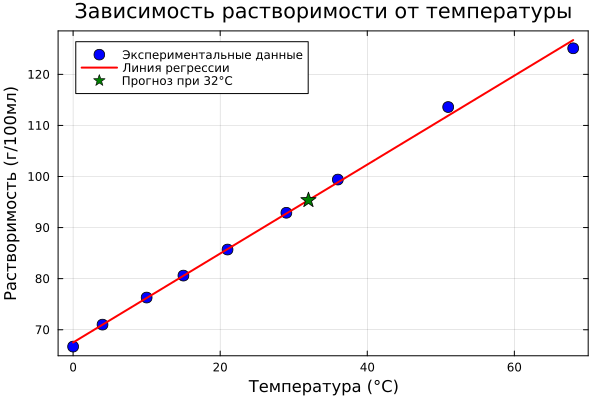

In [1]:
using Plots

# Исходные данные
t = [0, 4, 10, 15, 21, 29, 36, 51, 68]  
s = [66.7, 71, 76.3, 80.6, 85.7, 92.9, 99.4, 113.6, 125.1] 
n = length(t)

# Функция для среднего
function avg(v)
    sum(v) / length(v)
end

t_avg = avg(t)
s_avg = avg(s)

# Расчет коэффициентов
function calc_coeffs(x, y)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x .* y)
    sum_x2 = sum(x.^2)
    
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x^2)
    a = s_avg - b * t_avg
    
    return a, b
end

a, b = calc_coeffs(t, s)

# Вывод коэффициентов регрессии 
println("Свободный член (a): ", round(a, digits=4))
println("Коэффициент наклона (b): ", round(b, digits=4))
println()

# Расчет ошибок
s_pred = a .+ b .* t

total_err = sum((s .- s_pred).^2)
mean_err = sqrt(total_err/n)
rel_err = mean_err / s_avg

# Вывод ошибок
println("Суммарная квадратичная ошибка: ", round(total_err, digits=2))
println("Средняя квадратичная ошибка: ", round(mean_err, digits=3))
println("Относительная ошибка: ", round(rel_err*100, digits=2), "%")
println()

# Расчет корреляции
num = sum((t .- t_avg) .* (s .- s_avg))
den = sqrt(sum((t.-t_avg).^2) * sum((s.-s_avg).^2))
r = num / den

# Вывод корреляции 
println("Коэффициент корреляции (r): ", round(r, digits=4))
println()

# Проверка значимости
t_val = r * sqrt(n-2) / sqrt(1 - r^2)
println("Критерий Стьюдента: ", round(t_val, digits=3))
println()

# Прогнозирование
new_t = 32
pred_s = a + b * new_t
println("Прогноз при температуре ", new_t, "°C: ", pred_s)
println()

# График
plot(t, s, seriestype=:scatter, color=:blue, markersize=6, label="Экспериментальные данные",title="Зависимость растворимости от температуры", xlabel="Температура (°C)", ylabel="Растворимость (г/100мл)", legend=:topleft, grid=true, framestyle=:box)

plot!(minimum(t):maximum(t), x -> a + b * x, color=:red, linewidth=2, label="Линия регрессии")

scatter!([new_t], [pred_s], color=:green, markersize=8, marker=:star, label="Прогноз при $(new_t)°C")

**Задача 2.** Производится наблюдение над двумя переменными – процентным содержанием протеина (P) и крахмала (K) в зернах пшеницы. Обе переменные характеризуют качество пшеницы, но определение протеина требует сложного химического анализа, а определение крахмала может быть сделано гораздо проще. В таблице приведены результаты 20 наблюдений. Необходимо произвести выравнивание этих наблюдений по квадратичной и по кубической параболам, а затем сравнить результаты полученных вычислений.

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| P,% |10.3| 12.2|14.5| 11.1 |10.9| 18.1 |14 | 10.8 |11.4|11 | 10.2|17| 13.8 |10.1| 14.4 |15.8 | 15.6 |15|13.3 |19|
| K,% | 6 |75| 87| 55|34| 98| 91| 45 |51| 17 |36| 97| 74|24| 85| 96| 92 |94| 84 |99|

Напишем небольшой код, который позволяет построить график экспериментальных точек.


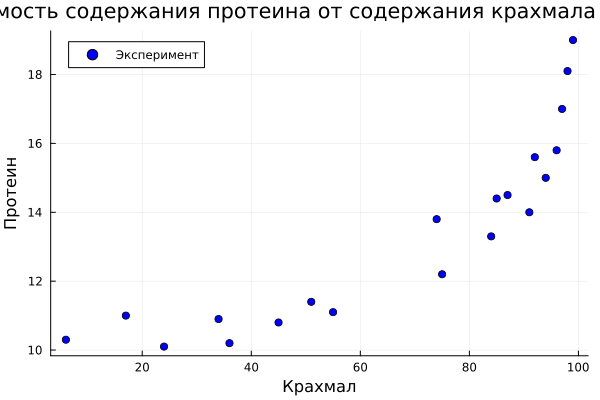

In [33]:
using Plots

P = [10.3, 12.2, 14.5, 11.1, 10.9, 18.1, 14.0, 10.8, 11.4, 11, 10.2, 17, 13.8, 10.1, 14.4, 15.8, 15.6, 15, 13.3, 19]
K = [6, 75, 87, 55, 34, 98, 91, 45, 51, 17, 36, 97, 74, 24, 85, 96, 92, 94, 84, 99]
scatter(K, P, label="Эксперимент", color = :blue, title = "Зависимость содержания протеина от содержания крахмала в пшенице")
xlabel!("Крахмал")
ylabel!("Протеин")


При попытке соединить точки график ломается.

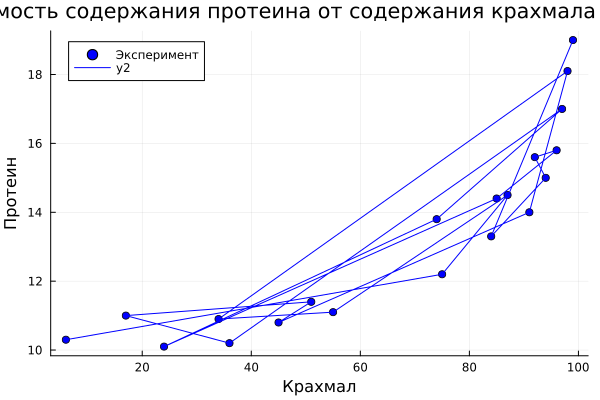

In [34]:
using Plots

P = [10.3, 12.2, 14.5, 11.1, 10.9, 18.1, 14.0, 10.8, 11.4, 11, 10.2, 17, 13.8, 10.1, 14.4, 15.8, 15.6, 15, 13.3, 19]
K = [6, 75, 87, 55, 34, 98, 91, 45, 51, 17, 36, 97, 74, 24, 85, 96, 92, 94, 84, 99]
scatter(K, P, label="Эксперимент", color = :blue, title = "Зависимость содержания протеина от содержания крахмала в пшенице")
plot!(K, P, color = :blue)
xlabel!("Крахмал")
ylabel!("Протеин")

Это связано с тем, что массивы P и K не упорядочены по возрастанию значений K. Это может мешать и в других моментах решения задачи, поэтому необходимо упорядочить массивы P и K по возрастанию элементов массива K. В Julia есть функции сортировки, но так как нужна сортировка двух массивов по возрастанию элементов одного из них, напишем это самостоятельно, воспользовавшись алгоритмом «пузырька».
Код всей программы решения задачи и результаты её работы приведены ниже.


Коэффициенты полинома 2-й степени:
a0 = 11.5595058189
a1 = -0.0879414289
a2 = 0.0014423833

Коэффициенты полинома 3-й степени:
b0 = 9.7214626329
b1 = 0.0899538482
b2 = -0.0025791578
b3 = 2.4944e-5

Ошибки аппроксимации:
Для полинома 2-й степени: 14.0911209865
Для полинома 3-й степени: 10.3538143973


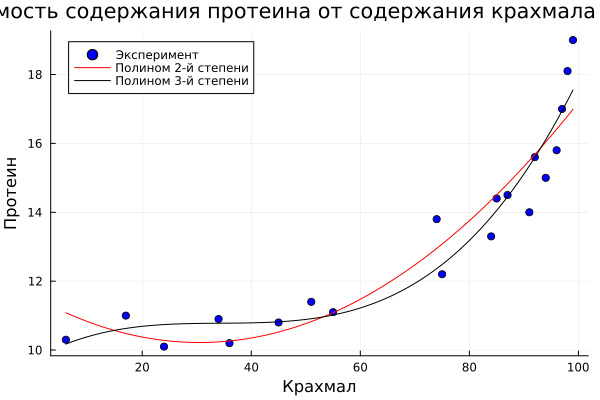

In [18]:
using Plots

P = [10.3, 12.2, 14.5, 11.1, 10.9, 18.1, 14.0, 10.8, 11.4, 11, 10.2, 17, 13.8, 10.1, 14.4, 15.8, 15.6, 15, 13.3, 19]
K = [6, 75, 87, 55, 34, 98, 91, 45, 51, 17, 36, 97, 74, 24, 85, 96, 92, 94, 84, 99]
n = length(K)
Mk = sum(K) / n
Mp = sum(P) / n
temp = 0.0

for j in 1:(n - 1)
    for i in 1:(n - 1 - j)
        if K[i] > K[i + 1]
            temp = K[i]
            K[i] = K[i + 1]
            K[i + 1] = temp
            temp = P[i]
            P[i] = P[i + 1]
            P[i + 1] = temp
        end
    end
end

k = 2
C = ones(k + 1, k + 1)
d = ones(k + 1)

for i in 0:k
    for j in 0:k
        C[i + 1, j + 1] = sum(K .^ (i + j))
    end
    d[i + 1] = sum(P .* K .^ i)
end

a = C \ d

k = 3
C = ones(k + 1, k + 1)
d = ones(k + 1)

for i in 0:k
    for j in 0:k
        C[i + 1, j + 1] = sum(K .^ (i + j))
    end
    d[i + 1] = sum(P .* K .^ i)
end

b = C \ d

println("\nКоэффициенты полинома 2-й степени:")
println("a0 = ", round(a[1], digits=10))
println("a1 = ", round(a[2], digits=10))
println("a2 = ", round(a[3], digits=10))

println("\nКоэффициенты полинома 3-й степени:")
println("b0 = ", round(b[1], digits=10))
println("b1 = ", round(b[2], digits=10))
println("b2 = ", round(b[3], digits=10))
println("b3 = ", round(b[4], digits=10))

t = LinRange(K[1], K[n], 101)

P2 = ones(length(t))
P3 = ones(length(t))

S2 = sum((P .- a[1] .- a[2] .* K .- a[3] .* K .^ 2) .^ 2)
S3 = sum((P .- b[1] .- b[2] .* K .- b[3] .* K .^ 2 .- b[4] .* K .^ 3) .^ 2)
println("\nОшибки аппроксимации:")
println("Для полинома 2-й степени: ", round(S2, digits=10))
println("Для полинома 3-й степени: ", round(S3, digits=10))
for i in 1:length(t)
    P2[i] = a[1] + a[2] * t[i] + a[3] * t[i] ^ 2
    P3[i] = b[1] + b[2] * t[i] + b[3] * t[i] ^ 2 + b[4] * t[i] ^ 3
end

scatter(K, P, label="Эксперимент", color = :blue)
plot!(t, P2, color = :red, label="Полином 2-й степени")
plot!(t, P3, color = :black, label="Полином 3-й степени")

title!("Зависимость содержания протеина от содержания крахмала в пшенице")
xlabel!("Крахмал")
ylabel!("Протеин")


## 13.2 Интерполяция функций

В отличие от аппроксимации, где строится приближенная зависимость, **интерполяция** требует построения функции, точно проходящей через заданные экспериментальные точки. 

Пусть на отрезке [a, b] заданы:
- узлы интерполяции: $a = x_1 < x_2 < ... < x_{n+1} = b$;
- значения неизвестной функции: $y_1 = f(x_1), y_2 = f(x_2), ..., y_{n+1} = f(x_{n+1})$.

Требуется построить интерполирующую функцию F(x), которая в узлах интерполяции принимает те же значения, что и f(x):

$$
F(x_i) = y_i \quad \text{для всех} \quad i = 1,2,...,n+1
$$

Полученную интерполяционную формулу y = F(x) зачастую используют для нахождения приближённых значений данной функции f(x) в точках x, отличных от узлов интерполирования. Такая операция называется интерполированием функции f(x).

### 13.2.1 Канонический полином

Интерполирующая функция в виде полинома n-й степени:
$$
F(x) = a_1 + a_2x + a_3x^2 + \cdots + a_{n+1}x^n
$$

Коэффициенты находятся из системы:
$$
\begin{cases}
a_1 + a_2x_1 + \cdots + a_{n+1}x_1^n = y_1 \\
a_1 + a_2x_2 + \cdots + a_{n+1}x_2^n = y_2 \\
\vdots \\
a_1 + a_2x_{n+1} + \cdots + a_{n+1}x_{n+1}^n = y_{n+1}
\end{cases}
$$

Решив эту систему линейных алгебраических уравнений, найдём коэффициенты интерполяционного полинома $a_1, a_1, \cdots, a_{n+1}$.

### 13.2.2 Полином Ньютона

Полином Ньютона n-й степени записывается в следующей форме:
$$
F(t) = A_1 + A_2(t-x_1) + A_3(t-x_1)(t-x_2) + \cdots + A_{n+1}(t-x_1)\cdots(t-x_n)
$$

Из условия интерполяции в точке $x_1$:
$$
F(x_1) = A_1 = y_1
$$

Используя условие для точки $x_2$:
$$
F(x_2) = A_1 + A_2(x_2-x_1) = y_2
$$

Выражаем $A_2$:
$$
A_2 = \frac{y_2 - y_1}{x_2 - x_1} = y_{12}
$$

$y_{12}$ – разделённая разность первого порядка. По аналогии вводятся и другие разделённые разности первого порядка:
$$
A_3 = \frac{y_3 - y_1}{x_3 - x_1} = y_{13},\quad \cdots \quad, \quad A_{n+1} = \frac{y_{n+1} - y_1}{x_{n+1} - x_1} = y_{1n+1}
$$

Используя условие для точки $x_3$:
$$
F(x_3) = A_1 + A_2(x_3-x_1) + A_3(x_3-x_1)(x_3-x_2) = y_3
$$

Подставляя уже известные A₁ и A₂:
$$
y_1 + y_{12}(x_3-x_1) + A_3(x_3-x_1)(x_3-x_2) = y_3
$$

Решаем относительно $A_3$:
$$
A_3 = \frac{y_3 - y_1 - y_{12}(x_3-x_1)}{(x_3-x_1)(x_3-x_2)} = \frac{y_{13} - y_{12}}{x_3 - x_2} = y_{123}
$$
$y_{123}$ – разделённая разность второго порядка

Аналогично:
$$
A_4 = \frac{y_{14} - y_{12}}{x_4 - x_2} = y_{124},\quad
A_5 = \frac{y_{15} - y_{12}}{x_5 - x_2} = y_{125}, \quad \cdots \quad, \quad
A_{n+1} = \frac{y_{1n+1} - y_{12}}{x_{n+1} - x_2} = y_{12n+1}
$$

Решаем относительно $A_4$:
$$
A_4 = \frac{y_{124} - y_{123}}{x_4 - x_3} = y_{1234}
$$

Аналогично:
$$
A_5 = \frac{y_{125} - y_{123}}{x_5 - x_3} = y_{1235}, \quad \cdots \quad, \quad
A_{n+1} = \frac{y_{12n+1} - y_{123}}{x_{n+1} - x_3} = y_{123n+1}
$$

Будем продолжать до тех пор, пока не вычислим:
$$
A_n = y_{123...n+1} = \frac{y_{123...n+1} - y_{123...n}}{x{n+1} - x_{n}}
$$

### 13.2.3 Полином Лагранжа
Полином Лагранжа n-й степени записывается в следующей форме:

$$
F(t) = \sum_{i=1}^{n+1} y_i \prod_{\substack{j=1 \\ j \neq i}}^{n+1} \frac{t-x_j}{x_i-x_j}
$$

### 13.2.4 Интерполяция кубическими сплайнами  
 
Исторически сплайны возникли из задачи моделирования гибкой линейки, закреплённой в заданных точках. Форма такой линейки в промежутках между узлами описывается уравнением:  
$$
\varphi^{IV}(x) = 0,  
$$  
решением которого является кубический полином. Это объясняет выбор именно кубических функций для интерполяции – они обеспечивают минимальную кривизну.  
 
Пусть на интервале $[a, b]$ заданы узлы $a = x_1 < x_2 < \dots < x_n = b$ и значения $y_i = y(x_i)$.Кубическим сплайном, интерполирующим на отрезке [a , b] данную функцию y(x), называется функция:  
$$
g_k(s) = a_k + b_k (s - x_k) + c_k (s - x_k)^2 + d_k (s - x_k)^3, \quad s \in [x_{k-1}, x_k], \quad k = 2, \dots, n.  
$$  
Эта функция должна удовлетворять следующим условиям:  
1. **интерполяция в узлах**: $g_k(x_k) = y_k$ и $g_k(x_{k-1}) = y_{k-1}$;  
2. **непрерывность производных**: функция $g(x)$ дважды непрерывно дифференцируема на интервале [a, b];
3. **граничные условия**: вторая производная на концах интервала равна нулю ($g''(a) = g''(b) = 0$).  

Для определения коэффициентов сплайна $a_k$, $b_k$, $c_k$, $d_k$ ($k = 2, 3, \dots, n$) требуется решить систему уравнений.

**Условия интерполяции в узлах:**
$$
g_2(x_1) = y_1, \quad g_k(x_k) = y_k \quad (k = 2, \dots, n)
$$

**Условия гладкости:**
$$
\begin{aligned}
g_{k-1}(x_{k-1}) &= g_k(x_{k}) \\
g'_{k-1}(x_{k-1}) &= g'_k(x_{k}) \quad (k = 2, \dots, n)\\
g''_{k-1}(x_{k-1}) &= g''_k(x_{k})
\end{aligned}
$$

**Граничные условия:**
$$
g''_1(x_0) = 0, \quad g''_n(x_n) = 0
$$

Производные сплайна вычисляются по формулам:
$$
\begin{aligned}
g'_k(s) &= b_k + 2c_k(s-x_k) + 3d_k(s-x_k)^2 \\
g''_k(s) &= 2c_k + 6d_k(s-x_k)
\end{aligned}
$$

Введя обозначение $h_k = x_k - x_{k-1}$, получаем систему:

$$
\begin{aligned}
&a_2 - b_2h_2 + c_2h_{2}^{2} = y_1\\
&a_k = y_k \quad (k = 2, \dots, n)\\
&a_{k-1} = a_k - b_k h_k + c_k h_k^2 - d_k h_k^3 \quad (k = 3, \dots, n)\\
&b_{k-1} = b_k - 2c_k h_k + 3d_k h_k^2 \quad (k = 3, \dots, n)\\
&c_{k-1} = c_k - 3d_k h_k \quad (k = 3, \dots, n)\\
&c_2 - 3d_2 h_2 = 0 \\
&c_n = 0
\end{aligned}
$$

**Решение системы:** коэффициенты $a_k$ непосредственно равны $y_k \quad (k = 2, \dots, n)$.

Выражаем $b_k$ через $c_k$:
$$
b_k = \frac{y_k - y_{k-1}}{h_k} + c_kh_k - d_k h_k ^2 \quad (k = 2, \dots, n)
$$
   
Выражаем $d_k$ через $c_k$:
$$
d_k = \frac{c_k - c_{k-1}}{3h_k}
$$
Подставляем $d_k$ в $b_k$ и получаем:
$$
b_k = \frac{y_k - y_{k-1}}{h_k} + \frac{2}{3}c_k h_k + \frac{1}{3} h_k c_{k-1} (k = 2, \dots, n)
$$

Введя обозначение $l_k = \frac{y_k - y_{k-1}}{h_k}$ , получаем:

$$
b_k = l_k + \frac{2}{3}c_k h_k + \frac{1}{3} h_k c_{k-1} (k = 2, \dots, n)
$$

Из условия $b_{k-1} = b_k - 2c_k h_k + 3d_k h_k^2$ подставляем выражения для $b_k$ и $d_k$:

Запишем $b_{k-1}$ по аналогии:
$$b_{k-1} = l_{k-1} + \frac{2}{3}c_{k-1} h_{k-1} + \frac{1}{3}c_{k-2} h_{k-1}$$

Подставим в уравнение:
   $$
l_{k-1} + \frac{2}{3}c_{k-1} h_{k-1} + \frac{1}{3}c_{k-2} h_{k-1} = \left(l_k + \frac{2}{3}c_k h_k + \frac{1}{3}c_{k-1} h_k\right) - 2c_k h_k + 3\left(\frac{c_k - c_{k-1}}{3h_k}\right)h_k^2
   $$

Упростим правую часть:
   $$
   = l_k + \frac{2}{3}c_k h_k + \frac{1}{3}c_{k-1} h_k - 2c_k h_k + (c_k - c_{k-1})h_k \\
   = l_k + \left(\frac{2}{3} - 2 + 1\right)c_k h_k + \left(\frac{1}{3} - 1\right)c_{k-1} h_k \\
   = l_k - \frac{1}{3}c_k h_k - \frac{2}{3}c_{k-1} h_k
   $$

Перенесем все члены в одну сторону:
   $$
   l_{k-1} - l_k + \frac{2}{3}c_{k-1} h_{k-1} + \frac{1}{3}c_{k-2} h_{k-1} + \frac{1}{3}c_k h_k + \frac{2}{3}c_{k-1} h_k = 0
   $$

Умножим на 3 и перегруппируем:
   $$
   h_{k-1} c_{k-2} + 2(h_{k-1} + h_k) c_{k-1} + h_k c_k = 3(l_k - l_{k-1}),
   $$
где $k = 3, \dots, n$, с краевыми условиями $c_0 = c_n = 0$.  

Вычисление c можно провести с помощью метода прогонки для трёхдиагональной матрицы. Этот метод сводится к нахождению прогоночных коэффициентов по формулам прямой прогонки.

Начальные значения прогоночных коэффициентов:

$$
\delta_2 = -\frac{h_3}{2(h_2 + h_3)} \tag{9.51}
$$

$$
\lambda_2 = \frac{3(l_3 - l_2)}{2(h_2 + h_3)} = \frac{1.5(l_3 - l_2)}{h_2 + h_3} \tag{9.51}
$$
$$
\delta_{k-1} = -\frac{h_k}{2(h_{k-1} + h_k) + h_{k-1} \delta_{k-2}} 
$$

$$
\lambda_{k-1} = \frac{3(l_k - l_{k-1}) - h_{k-1} \lambda_{k-2}}{2(h_{k-1} + h_k) + h_{k-1} \delta_{k-2}} 
$$
где k = 4,5,...,n

а затем к нахождению искомых коэффициентов $c_k$:

$$
c_{k-1} = \delta_{k-1} c_k + \lambda_{k-1} \tag{9.53}
$$




**Задача.** Найти приближённое значение функции при заданном значении аргумента с помощью интерполяции кубическими сплайнами в точках $x_1 = 150$, $x_2 = 160$, $x_3 = 165$. Функция задана таблично.

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| 132 |140|162|170|180|
| 330| 350 |385|425|485|

Значения P(U) в точках UP:
P(150) ≈ 361.2410425599695 Вт
P(160) ≈ 378.24267567933737 Вт
P(165) ≈ 398.0379916522335 Вт


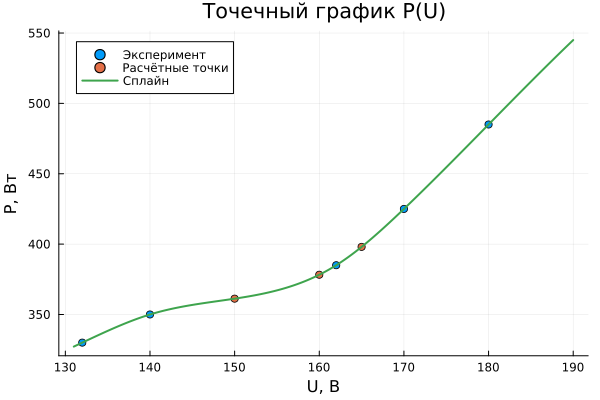

In [3]:
using Plots

# Функция вычисления коэффициентов сплайна b, c, d
function koef_spline(x, y)
    n = length(x)
    h = zeros(n)
    l = zeros(n)
    delt = zeros(n)
    lyam = zeros(n)
    b = zeros(n)
    c = zeros(n)
    d = zeros(n)
    
    # Вычисление элементов массива h
    for k in 2:n
        h[k] = x[k] - x[k-1]
    end
    
    # Вычисление элементов массива l
    for k in 2:n
        l[k] = (y[k] - y[k-1]) / h[k]
    end
    
    # Вычисление прогоночных коэффициентов
    delt[2] = -h[3] / (2 * (h[3] + h[2]))
    lyam[2] = 1.5 * (l[3] - l[2]) / (h[3] + h[2])
    
    for k in 4:n
        delt[k-1] = -h[k] / (2 * (h[k-1] + h[k]) + h[k-1] * delt[k-2])
        lyam[k-1] = (3 * (l[k] - l[k-1]) - h[k-1] * lyam[k-2]) / (2 * (h[k-1] + h[k]) + h[k-1] * delt[k-2])
    end
    
    # Вычисление коэффициентов сплайна c
    c[n] = 0
    for k in n:-1:3
        c[k-1] = delt[k-1] * c[k] + lyam[k-1]
    end
    
    # Расчёт коэффициентов сплайна b, d
    for k in 2:n
        d[k] = (c[k] - c[k-1]) / (3 * h[k])
        b[k] = l[k] + (2 * c[k] * h[k] + h[k] * c[k-1]) / 3
    end
    
    return b, c, d
end

# Расчёт ожидаемого значения в точке t
function my_spline(x, y, t)
    b, c, d = koef_spline(x, y)
    n = length(x)
    a = y
    
    # Определяем номер интервала j, в котором находится точка t
    if t > x[n-1]
        j = n
    else
        for i in 2:n
            if t<=x[i]
                j=i
                break
            end
        end
    end
    
    # Вычисление ожидаемого значения в точке t
    z = a[j] + b[j] * (t - x[j]) + c[j] * (t - x[j])^2 + d[j] * (t - x[j])^3
    return z
end

# Исходные данные, зависимость P(U)
U = [132, 140, 162, 170, 180]
P = [330, 350, 385, 425, 485]

# Точки, в которых требуется вычислить ожидаемое значение.
UP = [150, 160, 165]

# Вычисление ожидаемого значения.
PP = [my_spline(U, P, up) for up in UP]

# Формирование интерполяционной кривой на интервале [131;190]
U2 = 131:0.05:190
P2 = [my_spline(U, P, u) for u in U2]

# Вывод результатов в консоль
println("Значения P(U) в точках UP:")
for (up, pp) in zip(UP, PP)
    println("P($up) ≈ $pp Вт")
end

# Построение графика
plot(U, P, 
    seriestype=:scatter, 
    label="Эксперимент", 
    xlabel="U, В", 
    ylabel="P, Вт", 
    title="Точечный график P(U)",
    legend=:topleft
)
scatter!(UP, PP, label="Расчётные точки")
plot!(U2, P2, label="Сплайн", linewidth=2)



# Глава 14 Элементарная теория чисел
**Теория чисел** – это раздел математики, занимающийся изучением свойств целых чисел, их структур и взаимосвязей. Она охватывает такие вопросы, как делимость чисел, разложение на простые множители, алгоритмы нахождения наибольшего общего делителя и наименьшего общего кратного, а также другие теоретико-числовые задачи.

## 14.1 Теорема деления

**Теорема деления** (также известная как **формула деления с остатком**) 

Теорема утверждает, что для любых двух натуральных чисел a и b ($a \geq b$) существует уникальная пара неотрицательных целых чисел q и r, которые удовлетворяют следующему равенству:

$$
a = bq + r,
$$

где:

- q – это **целая часть** от деления a на b;
- r – это **остаток** от деления a на b;
- $0 \leq r < b$ – остаток должен быть неотрицательным и строго меньше делителя b.

По другому это можно записать через операцию **mod**.


Операция **mod** – это операция, которая возвращает остаток от деления одного числа на другое. Операция **mod** обозначается как $a\mod b$, где a – делимое, b – делитель, а r – это остаток от деления числа a на b.

$$
a\mod b = r,
$$


## 14.2 Наибольший общий делитель (НОД)

В теории чисел важной задачей является нахождение **наибольшего общего делителя** (НОД) двух чисел. НОД двух чисел – это наибольшее число, которое делит оба исходных числа без остатка. 


### 14.2.1 Алгоритм Евклида

Алгоритм Евклида позволяет находить наибольший общий делитель (НОД) двух чисел a и b с помощью последовательных делений с остатком.

Шаги алгоритма:

1. пусть a и b – два числа, $a \geq b > 0$;
2. на каждом шаге выполняем деление с остатком $a = bq + r$;
3. если $r = 0$, то НОД равен b;
4. иначе, заменяем a на b, а b на r, и повторяем шаги.

In [2]:
function euclid(a, b)
    while true
        r = a % b  # Вычисляем остаток от деления
        if r == 0  # Проверяем, равен ли остаток нулю
            return b  # Когда остаток 0, НОД равен последнему ненулевому делителю
        else
            # Обновляем значения
            a = b
            b = r
        end
    end
end


println("Введите первое число (a):")
a = parse(Int, readline())  

println("Введите второе число (b):")
b = parse(Int, readline())  


println("Наибольший общий делитель (НОД) чисел ", a, " и ", b, " равен: ", euclid(a, b))


Введите первое число (a):


stdin>  45


Введите второе число (b):


stdin>  65


Наибольший общий делитель (НОД) чисел 45 и 65 равен: 5


### 14.2.2 Расширенный алгоритм Евклида

Алгоритм Евклида, который мы рассмотрели ранее, позволяет находить **наибольший общий делитель (НОД)** двух чисел. Однако, в некоторых задачах нам нужно не только вычислить НОД, но и найти коэффициенты, которые позволяют выразить НОД как линейную комбинацию этих чисел. Именно для этого используется **расширенный алгоритм Евклида**.

Пусть даны два целых числа a и b. Необходимо найти такие целые числа x и y, что:

$$
\text{НОД}(a, b) = a \cdot x + b \cdot y,
$$

где x и y – целые коэффициенты, называемые **коэффициентами линейной комбинации** для чисел a и b.

Расширенный алгоритм Евклида строится на основе стандартного алгоритма Евклида, но дополнительно отслеживаются коэффициенты x и y.

Мы начинаем с инициализации этих коэффициентов: $x_0 = 1$, $y_0 = 0$ для a и $x_1 = 0$, $y_1 = 1$ для b.

Далее, на каждом шаге, помимо вычисления нового остатка, также вычисляются новые коэффициенты $x_i$ и $y_i$ . 
$$
	\begin{split}
x_{i+1} = x_{i-1} - x_{i} \cdot q_{i-1}\\
y_{i+1} = y_{i-1}- y_{i} \cdot q_{i-1}
\end{split}
$$

Когда остаток становится равным нулю, последний ненулевой остаток будет являться НОД. Коэффициенты x и y в этот момент будут такими, что они удовлетворяют уравнению:
$$
     \text{НОД}(a, b) = a \cdot x + b \cdot y.
$$

In [35]:
function extended_euclid(a, b)
    x0, x1 = 1, 0  # Начальные значения для x
    y0, y1 = 0, 1  # Начальные значения для y

    while b != 0
        r = a % b  # Вычисляем остаток от деления
        q = a ÷ b  # Вычисляем целую часть от деления

        # Обновляем значения для a и b
        a = b
        b = r

        # Обновляем коэффициенты x и y
        temp_x = x0 - q * x1
        temp_y = y0 - q * y1
        x0, x1 = x1, temp_x
        y0, y1 = y1, temp_y
    end

    return a, x0, y0  # Возвращаем НОД и коэффициенты x и y
end

println("Введите первое число (a):")
a = parse(Int, readline())  

println("Введите второе число (b):")
b = parse(Int, readline()) 

gcd, x, y = extended_euclid(a, b)
println("Наибольший общий делитель (НОД) чисел ", a, " и ", b, " равен: ", gcd)
println("Коэффициенты: x = ", x, ", y = ", y)


Введите первое число (a):


stdin>  345495825


Введите второе число (b):


stdin>  345945


Наибольший общий делитель (НОД) чисел 345495825 и 345945 равен: 15
Коэффициенты: x = -1250, y = 1248377


В Julia есть стандартная функция **gcdx()** из встроенного модуля:


In [34]:
a = 345495825
b = 345945
gcdx(a, b)  # Возвращает кортеж (НОД, x, y), где x*a + y*b = НОД

(15, -1250, 1248377)

## 14.3 Простые и составные числа


В теории чисел различают два основных класса чисел — простые и составные.

**Простое число** – это натуральное число больше единицы, которое делится только на 1 и на себя. То есть, если n – простое число, то его единственными делителями являются 1 и n.

**Составное число** – это натуральное число больше единицы, которое не является простым, то есть оно имеет больше двух делителей. Составные числа можно разложить на произведение простых чисел.

### 14.4.1 Метод пробного деления
Один из самых прямолинейных методов проверки, является **метод пробного деления**. В этом методе мы проверяем, делится ли число n на любое число от 2 до $\sqrt n$. Если n делится на одно из таких чисел, оно составное, если нет – число простое.


**Почему достаточно проверять делители до $\sqrt{n}$?** Это можно объяснить следующим образом:

пусть n – составное число, то есть оно может быть представлено как произведение двух чисел a и b:
$$
   n = a \times b
$$
   Если оба множителя a и b больше $\sqrt{n}$, то их произведение будет больше n, что невозможно, потому что $a \times b = n$. Поэтому хотя бы один из множителей должен быть меньше или равен $\sqrt{n}$. Следовательно, если мы проверяем делители числа n до $\sqrt{n}$, мы гарантированно находим хотя бы один из множителей, если n составное.

In [8]:
function is_prime(n)
    if n < 2
        return false  # Числа < 2 не являются простыми
    end
    for i in 2:isqrt(n)  # Проверяем делители от 2 до √n
        if n % i == 0  # Если n делится на i, то оно составное
            return false
        end
    end
    return true  # Если делителей не найдено, число простое
end


println("Введите число:")
n = parse(Int, readline())

if is_prime(n)
    println("Число $n простое.")
else
    println("Число $n составное.")
end


Введите число:


stdin>  11


Число 11 простое.


Хотя метод пробного деления прост и понятен, он имеет значительные недостатки, особенно для больших чисел. Время работы резко увеличивается с ростом числа n, для очень больших чисел этот метод становится слишком медленным и непрактичным.

### 14.4.2 Решето Эратосфена

Этот алгоритм позволяет найти все простые числа до заданного числа N. Он состоит в поочередном вычеркивании составных чисел, начиная с 2. После завершения алгоритма все оставшиеся числа – простые.


Алгоритм можно описать следующим образом:

1. запишем все целые числа от 2 до N. $S = {2, 3, 4, \dots, N}$ – исходный список чисел;
2. пусть переменная p изначально равно 2 – первому простому числу, вычёркиваем из списка все числа от $2 \cdot p$ до N, считая шагами по p;
3. находим первое незачёркнутое число в списке, большее p, и присваиваем это число переменной p;
4. повторяем шаги 2 и 3, пока значение $p^2 \leq N)$.


In [10]:
function Eratosthenes(n)
    # Создаём массив для простых чисел
    prime = fill(true, n)  # Все числа считаем простыми (true)
    prime[1] = false  # 1 не является простым числом

    #Для каждого числа p от 2 до √n
    for p in 2:isqrt(n)
        if prime[p] == true
            # Вычеркиваем все кратные j, начиная с j^2
            for k in p^2:p:n
                prime[k] = false
            end
        end
    end

    #Выводим все простые числа
    for p in 2:n
        if prime[p]
            println(p)
        end
    end
end

println("Введите n:")
n = parse(Int, readline())
Eratosthenes(n)


Введите n:


stdin>  20


2
3
5
7
11
13
17
19


### 14.4.3 Тест Ферма
Этот тест основан на **малой теореме Ферма**, которая утверждает, что для любого простого числа p и для любого числа a, которое не делится на p, выполняется следующее условие:

$$
a^{p-1} \equiv 1 \pmod{p}
$$

Это значит, что если число n простое, то для любого числа a где $1 < a < n-1$ будет выполняться $a^{n-1} \equiv 1 \pmod{n}$. Если это условие не выполняется для некоторого числа a, то n составное.


In [15]:
# Функция для быстрого возведения в степень по модулю
function modd(base, exp, mod)
    result = BigInt(1)  # Устанавливаем результат равным 1
    base = base % mod  # Вычисляем основание по модулю
    while exp > 0  # Цикл, пока показатель степени больше 0
        if exp % 2 == 1  # Если степень нечетная
            result = (result * base) % mod  # Умножаем результат на основание и находим целочисленный остаток от деления
        end
        exp ÷= 2  # Делим степень на 2
        base = (base * base) % mod  # Возводим основание в квадрат и находим остаток от деления на mod
    end
    return result
end

# Функция для теста Ферма
function fermat_test(n, iterations=25)
    # Проверка на базовые случаи
    if n < 2
        return false  # Числа < 2 не простые
    end
    if n == 2
        return true  # 2 — простое число
    end
    if n % 2 == 0
        return false  # Чётные числа больше 2 не простые
    end

    # Выполнение теста Ферма для случайных оснований
    for i in 1:iterations
        a = rand(2:n-2)  # Генерируем случайное a, где 1 < a < n-1
        if modd(a, n-1, n) != 1
            return false  # Если a^(n-1) mod n != 1, то n составное
        end
    end

    return true  # Если тест прошёл все итерации, то число вероятно простое
end

# Ввод числа и проверка на простоту
println("Введите число:")
n = parse(Int, readline())  # Читаем число с консоли

if fermat_test(n)
    println("Число $n простое.")
else
    println("Число $n составное.")
end


Введите число:


stdin>  233


Число 233 простое.


### 14.4.4 Тест Миллера-Рабина
**Тест Миллера-Рабина** – это вероятностный тест, используемый для проверки простоты чисел. Он является псевдопростым тестом, что означает, что он может ошибаться, но вероятность ошибки можно уменьшить путём многократного применения теста.


**Основная идея алгоритма**:

1. алгоритм проверки простоты числа начинается с базовых случаев: если n ≤ 1 — не простое, если n = 2 или 3 – простое, если n > 2 и чётное – составное;

2. далее представляем число n - 1 как $n - 1 = 2^s \cdot d $, где d нечётно;

3. выбираем случайное число a, где $2 \leq a \leq n - 2$, и проверяем условие $a^d \mod n$. Если результат равен 1 или n - 1, то n с высокой вероятностью простое;

4. если условие не выполнено, то вычесляем $a^{2^i \cdot d} \mod n$ для $i = 1, 2, \dots, r - 1 $. Если на каком-то шаге i результат равен n - 1, то число вероятно простое. Если результат снова становится равным 1, то число n составное;

5. если число n не проходит проверку для выбранного числа a, оно составное. Повторяя тест с разными основаниями a, можно с высокой вероятностью утверждать, что число простое, если оно прошло все проверки.



In [16]:
# Функция для быстрого возведения в степень по модулю
function modd(base, exp, mod)
    result = BigInt(1)  # Устанавливаем результат равным 1
    base = base % mod   # Основание по модулю
    while exp > 0  # Цикл, пока степень больше 0
        if exp % 2 == 1  # Если степень нечётная
            result = (result * base) % mod  # Умножаем на основание и берём по модулю
        end
        exp ÷= 2  # Делим степень на 2
        base = (base * base) % mod  # Возводим основание в квадрат по модулю
    end
    return result
end

function is_prime(n)
    iterations = 25  # Количество итераций для теста Миллера-Рабина

    # Проверка на базовые случаи
    if n < 2
        return false  # Числа < 2 не простые
    end
    if n == 2
        return true  # 2 — простое число
    end
    if n % 2 == 0
        return false  # Чётные числа больше 2 не простые
    end

    # Разложение n - 1 = 2^r * d, где d нечётно
    d = n - 1
    r = BigInt(0)
    while d % 2 == 0  # Пока d чётное, делим его на 2
        d ÷= 2
        r += 1
    end

    # Выполнение теста Миллера-Рабина для случайных оснований
    for i in 1:iterations
        a = rand(2:n-2)  # Генерируем случайное a, где 2 <= a <= n-2
        x = modd(a, d, n)  # Вычисляем x = a^d mod n

        # Если x равно 1 или n-1, продолжаем
        if x != 1 && x != n - 1
            composite = true  # Предполагаем, что n составное
            temp_r = r
            while temp_r > 0  # Цикл для проверки степеней x
                x = modd(x, 2, n)  # x = x^2 mod n
                if x == n - 1
                    composite = false  # n простое, выходим
                    break
                end
                temp_r -= 1
            end

            # Если x не стало равно n-1, число составное
            if composite
                return false  # Число составное
            end
        end
    end

    return true  # Если тест прошёл все итерации, число вероятно простое
end

# Ввод числа и проверка на простоту
println("Введите число:")
n = parse(BigInt, readline()) 

if is_prime(n)
    println("Число $n простое.")
else
    println("Число $n составное.")
end


Введите число:


stdin>  233


Число 233 простое.


Тест Миллера-Рабина особенно полезен для больших чисел, он быстро определяет, является ли число простым. Это значительно ускоряет процесс проверки, делая алгоритм подходящим для чисел, используемых в криптографии и других областях, где важна скорость обработки данных. Несмотря на то, что тест является вероятностным, его использование с достаточным количеством итераций даёт очень высокую вероятность правильного результата, что делает его удобным для практического применения.

## 14.4 Разложение чисел на множители

Каждое целое число $n > 1$ можно разложить на произведение простых чисел, то есть существует представление:

$$
n = p_1^{a_1} p_2^{a_2} \cdots p_k^{a_k},
$$

где $p_1, p_2, \dots, p_k $ – простые числа, а $ a_1, a_2, \dots, a_k $ – неотрицательные целые числа.

**Алгоритм разложения на множители методом пробных делений.**

Метод пробных делений (или метод деления с остатком) является одним из самых простых и интуитивно понятных способов разложения числа на простые множители. Суть метода заключается в том, чтобы попытаться разделить число n на все возможные простые числа, начиная с самого маленького, пока не будут найдены все простые множители числа.

Этот метод работает путем последовательного деления числа на простые числа, начиная с 2 и продолжая до тех пор, пока число не станет равным 1. Если при делении на какое-то число остаток от деления равен нулю, то это число является делителем исходного числа, и его нужно записать как множитель.

In [39]:
function factorize(n)
    factors = Int[]  # Массив для хранения множителей
    i = 2  # Начинаем с самого маленького простого числа

    while n > 1
        while n % i == 0  # Если число делится на i
            push!(factors, i)  # Добавляем i в список множителей
            n ÷= i  # Делим n на i
        end
        i += 1  # Увеличиваем i и продолжаем искать следующие делители
    end
    return factors
end

println("Введите n:")
n = parse(Int, readline())  
println("Множители числа $n: ", factorize(n))


Введите n:


stdin>  123456789


Множители числа 123456789: [3, 3, 3607, 3803]


## 14.5 Функция Эйлера 

Функция Эйлера $\varphi(n)$ для целого числа n определяет количество чисел, которые взаимно просты с n , то есть таких чисел, которые не имеют общих делителей с n, кроме 1.

**Свойства функции Эйлера:**

1. **если n простое**, то $\varphi(n) = n - 1 $;
   
2. **если n составное и разлагается на простые множители**, то функция Эйлера для числа n, разлагаемого на простые множители $p_1, p_2, ..., p_k$, вычисляется по формуле:
   
$$
   \varphi(n) = n \cdot \left( 1 - \frac{1}{p_1} \right) \cdot \left( 1 - \frac{1}{p_2} \right) \cdot ... \cdot \left( 1 - \frac{1}{p_k} \right)
$$

In [18]:
function euler(n)
    result = n   # Начальное значение для результата
    
    # Перебор простых чисел от 2 до sqrt(n) с шагом 1
    for p in 2:isqrt(n)
        if n % p == 0  # Если p делит n
            # Уменьшаем результат с учетом p
            while n % p == 0
                n ÷= p   # Делим n на p, пока p делит n
            end
            result -= result ÷ p  # Применяем формулу (1 - 1/p)
        end
    end
    
    # Если n > 1, то n — это последний простой множитель
    if n > 1
        result -= result ÷ n  # Применяем формулу (1 - 1/n) для последнего простого множителя
    end
    
    return result
end

n = 30
println("Функция Эйлера для числа $n: ", euler(n))


Функция Эйлера для числа 30: 8


## 14.6 Библиотека Primes

Библиотека **Primes** – для работы с простыми числами и выполнения задач теории чисел.


**factor(n)** – возвращает разложение числа на простые множители в виде словаря, где ключи – простые делители, а значения – их кратности.

In [5]:
using Primes
println(factor(10000000000000000000000009))

Primes.Factorization{Int128}(173 => 1, 3739 => 1, 336958757 => 1, 45879817771 => 1)


**isprime(n)** – проверяет, является ли число простым.

In [46]:
isprime(17)  

true

**primes(start, stop)** – генерирует список простых чисел в заданном диапазоне.

In [47]:
primes(10, 20)  

4-element Vector{Int64}:
 11
 13
 17
 19

**totient(n)** – вычисляет функцию Эйлера.

In [50]:
totient(30)  

8

Для получения дополнительной информации о пакете см. [документацию.](http://juliamath.github.io/Primes.jl/v0.3/api.html)

# Глава 15 Криптография

**Криптография** – это наука и искусство обеспечения безопасности информации. Она охватывает методы шифрования, которые позволяют преобразовать читаемую информацию в недоступный для понимания вид, обеспечивая таким образом защиту данных от несанкционированного доступа.

**Шифрование** – это процесс преобразования открытого текста (исходной информации) в зашифрованный текст с помощью криптографического алгоритма.

**Дешифрование** – это процесс восстановления исходной (открытой) информации из зашифрованного текста. 


## 15.1 Пример шифрования с использованием Unicode
**Unicode** – это стандарт кодирования, который позволяет представлять символы различных языков, включая латиницу, кириллицу, иероглифы и множество других символов. Каждому символу в Unicode соответствует уникальный числовой код. 

Для начала рассмотрим самый простой способ шифрования, который заключается в том, чтобы преобразовать символы в их код Unicode. В этом методе каждый символ текста будет просто преобразован в его числовое представление, а затем при необходимости обратно в символ. Это будет простая форма шифрования, которая поможет нам понять, как работает кодировка.

In [41]:
#Пример шифрования
function string_to_int(message::String)
    result = BigInt(0)           # Инициализируем результат как большое целое число
    base = BigInt(65536)         # Основание для кодирования (65536 - 16 бит)
    #Для большинства символов в Unicode можно использовать 16-битное представление,
    
    for c in message
        char_code = Int(c)       # Получаем Unicode код символа
        result = result * base + BigInt(char_code)  # Добавляем код символа
    end
    
    return result
end

message = "Привет"
encoded = string_to_int(message)
println("Шифрование сообщения: ", encoded)

Шифрование сообщения: 1275436810054983563020141634


In [42]:
#Пример дешифрования
function int_to_string(num::BigInt)
    result = ""
    base = BigInt(65536)  # Основание для Unicode кодов (16 бит)
    
    while num > 0
        char_code = Int(num % base)  # Извлекаем код символа
        result = Char(char_code) * result  # Преобразуем код в символ и добавляем в строку
        num ÷= base  # Разделяем число на основание
    end
    
    return result
end

# Пример использования
encoded_number = BigInt(1275436810054983563020141634)  
decoded_string = int_to_string(encoded_number)
println("Дешифрование сообщения: ", decoded_string)


Дешифрование сообщения: Привет


**Ключ шифрования** – это параметр или секретная последовательность символов, используемая для выполнения криптографической операции (шифрования или дешифрования) с целью защиты данных.

Каждый криптографический алгоритм использует ключи по-разному. Ключ шифрования может быть числом, строкой или даже более сложной структурой данных, в зависимости от типа алгоритма. 

Современная криптография делится на два типа: **симметричную и асимметричную**.

**Симметричное шифрование** – это метод шифрования данных, при котором используется один и тот же ключ для шифрования и дешифрования информации. 

**Асимметричное шифрование** – это метод шифрования, при котором используются два различных ключа: открытый ключ для шифрования и закрытый ключ для дешифрования.

**Открытый ключ** – это часть ключевой пары, доступная для всех пользователей системы. Он используется для шифрования данных и может быть публично распространён, в отличие от закрытого ключа.

**Закрытый ключ** – это секретная часть ключевой пары, которая используется для дешифрования данных, зашифрованных с использованием открытого ключа. Закрытый ключ должен храниться в безопасности и не должен передаваться третьим лицам.

Давайте рассмотрим пример, где в качестве ключа для шифрования мы будем использовать сдвиг Unicode. Это значит, что для каждого символа в строке мы будем сдвигать его код (по стандарту Unicode) на некоторое фиксированное количество позиций, которое и будет нашим ключом.

In [43]:
# Функция для шифрования сообщения с использованием сдвига Unicode
function shift_encrypt(message::String, key::Int)
    result = BigInt(0)           
    base = BigInt(65536)  
    for c in message
        # Получаем код символа Unicode
        char_code = Int(c) + key  # Сдвигаем код символа на величину ключа
        result = result * base + BigInt(char_code)  
    end
    return result
end


message = "Привет"  # Исходное сообщение
key = 5  # Ключ сдвига

# Шифруем сообщение
encrypted_message = shift_encrypt(message, key)
println("Зашифрованное сообщение: ", encrypted_message)


Зашифрованное сообщение: 1281481531388184473800148039


Чтобы расшифровать зашифрованное сообщение, нужно знать ключ – величину сдвига, которую мы использовали при шифровании.

In [44]:
#Пример дешифрования
function int_to_string(num::BigInt, key::Int)
    result = ""
    base = BigInt(65536)  # Основание для Unicode кодов (16 бит)
    
    while num > 0
        char_code = Int(num % base - key)  # Извлекаем код символа
        result = Char(char_code) * result  # Преобразуем код в символ и добавляем в строку
        num ÷= base  # Разделяем число на основание
    end
    
    return result
end

# Пример использования
encoded_number = BigInt(1281481531388184473800148039) 
key = 5

decoded_string = int_to_string(encoded_number, key)
println("Дешифрование сообщения: ", decoded_string)


Дешифрование сообщения: Привет


## 15.2 Шифр Цезаря

Теперь рассмотрим шифр Цезаря, который похож на то, что мы рассматривали ранее с сдвигом Unicode, но в отличие от этого шифр Цезаря применяет сдвиг по буквам в алфавите.

**Шифр Цезаря** – это классический метод шифрования, в котором каждый символ текста сдвигается на некоторое фиксированное количество позиций в алфавите. Например, если мы используем сдвиг на 3, то буква "А" станет "Г", "Б" станет "Д", и так далее.

In [56]:
# Функция для шифрования с использованием шифра Цезаря
function caesar_encrypt(message::String, key::Int)
    encrypted_message = ""  # Инициализируем пустую строку для хранения зашифрованного сообщения
    
    # Мы перебираем каждый символ char в исходном сообщении message
    for char in message
        if islowercase(char) # Проверяется, является ли символ строчной буквой
            base = 'а'  # Если символ — строчная буква, то используем 'a' как базовую точку отсчета для сдвига в пределах строчного алфавита
            encrypted_char = Char(mod((Int(char) - Int(base) + key), 32) + Int(base))
            #Int(char) - Int(base): Переводим символ в число, вычитая код символа 'a', таким образом, 'a' становится 0, 'б' — 1, и так далее
            #(Int(char) - Int(base) + key): Добавляем сдвиг shift к числовому значению символа
            #mod(..., 32): Оператор mod используется для того, чтобы после достижения конца алфавита
            #(например, после буквы 'я') снова вернуться к началу алфавита. Алфавит состоит из 33 букв, но т.к нумерация идет с 0 мы используем mod с числом 32
            #+ Int(base): После применения сдвига возвращаемся к коду символа и преобразуем его обратно в символ с помощью Char
            encrypted_message *= encrypted_char  # Добавляем зашифрованный символ в строку
        elseif isuppercase(char) # Если символ является прописной буквой
            base = 'А'  # Устанавливаем базовый символ для прописного алфавита
            # Преобразуем символ в число, сдвигаем его на 'key' позиций,
            # и потом переводим обратно в символ, учитывая ограничение длины алфавита
            encrypted_char = Char(mod((Int(char) - Int(base) + key), 32) + Int(base))
            encrypted_message *= encrypted_char  # Добавляем зашифрованный символ в строку
        else
            # Если символ не является буквой (например, пробел, знак препинания и т. д.)
            encrypted_message *= char  # Оставляем его без изменений
        end
    end
    
    return encrypted_message  # Возвращаем зашифрованное сообщение
end


# Функция для дешифрования с использованием шифра Цезаря
function caesar_decrypt(encrypted_message::String, key::Int)
    return caesar_encrypt(encrypted_message, -key)  # Для дешифрования сдвиг в обратную сторону
end

# Пример использования
println("Введите сообщение:")
message = readline()

println("Введите ключ:")
key = parse(Int, readline())

# Шифруем сообщение
encrypted_message = caesar_encrypt(message, key)
println("Зашифрованное сообщение: ", encrypted_message)

# Дешифруем сообщение
decrypted_message = caesar_decrypt(encrypted_message, key)
println("Дешифрование сообщения: ", decrypted_message)


Введите сообщение:


stdin>  Введите сообщение:


Введите ключ:


stdin>  3


Зашифрованное сообщение: Ееизлхи фссдьирли:
Дешифрование сообщения: Введите сообщение:


## 15.3 Шифр Атбаш

**Шифр Атбаш** – это один из самых простых шифров, в котором буквы алфавита заменяются на противоположные. Например, 'A' заменяется на 'Я', 'Б' на 'Ю' и так далее. 

In [54]:
function atbash_cipher(message::String)
    encrypted_message = ""
    for char in message
        if 'А' <= char <= 'Я'
            # Для заглавных букв
            encrypted_char = Char(Int('А') + Int('Я') - Int(char))
            encrypted_message *= encrypted_char
        elseif 'а' <= char <= 'я'
            # Для строчных букв
            encrypted_char = Char(Int('а') + Int('я') - Int(char))
            encrypted_message *= encrypted_char
        else
            # Оставляем символ без изменений
            encrypted_message *= char
        end
    end
    return encrypted_message
end

message = "Пример использования" 
println("Исходное сообщение: ", message)

# Шифруем сообщение
encrypted_message = atbash_cipher(message)
println("Зашифрованное сообщение: ", encrypted_message)

# Дешифруем сообщение
decrypted_message = atbash_cipher(encrypted_message)
println("Дешифрованное сообщение: ", decrypted_message)

Исходное сообщение: Пример использования
Зашифрованное сообщение: Рпчуъп чорсфгшсэятча
Дешифрованное сообщение: Пример использования


## 15.4 Алгоритм XOR-шифрования

**XOR-шифрование** – это один из самых простых, но в то же время мощных алгоритмов симметричного шифрования. Он использует операцию XOR (исключающее ИЛИ), которая работает с отдельными битами данных.

**Основная идея XOR-шифрования** заключается в том, что для шифрования и дешифрования используется одна и та же операция – побитовая операция XOR. Благодаря этому алгоритм обладает свойством симметричности: для расшифровки зашифрованного сообщения достаточно снова применить XOR с тем же самым ключом.

**Что такое операция XOR?**

XOR (исключающее ИЛИ) – это логическая операция, которая действует поразрядно, сравнивая два числа побитово. Суть этой операции заключается в том, что она возвращает **1**, если соответствующие биты двух чисел различны, и **0**, если они одинаковы.

Таблица истинности для операции XOR:
| x | y | x ⊻ y |
|---|---|-------|
| 0 | 1 |   1   |
| 0 | 0 |   0   |
| 1 | 1 |   0   |
| 1 | 0 |   1   |


Чтобы выполнить операцию **XOR** в Julia, используется оператор `⊻`. Ниже приведены примеры использования этой операции.

In [57]:
# Функция для выполнения XOR и вывода результата в двоичном формате
function xor_binary(x::UInt8, y::UInt8)
    # Выполнение операции XOR
    result = x ⊻ y
    
    # Выводим результат в двоичной строке
    println("Число x в двоичной системе: ", bitstring(x)) #функцию bitstring выводит двоичное представление числа
    println("Число y в двоичной системе: ", bitstring(y))
    println("Результат XOR в двоичной системе: ", bitstring(result))
    
    return result
end


x = 0b10101010  # 0b — это префикс, который говорит компилятору, что дальше следует число в двоичном представлении
y = 0b11001100  #

# Выполнение XOR и вывод результатов
xor_binary(x, y)

Число x в двоичной системе: 10101010
Число y в двоичной системе: 11001100
Результат XOR в двоичной системе: 01100110


0x66

 **Основные шаги XOR-шифрования:**

1. сообщение (строка) представляется в виде последовательности байтов. Каждый символ строки преобразуется в его числовое представление; 

2. ключ также преобразуется в числовое представление. Если длина ключа меньше длины сообщения, ключ расширяется (например, повторяется несколько раз), чтобы его длина соответствовала длине сообщения;

3. для каждого символа сообщения применяется операция XOR;

4. результатом XOR-операции является зашифрованный текст, который состоит из зашифрованных байтов. Эти байты могут быть преобразованы обратно в строку для отображения зашифрованного сообщения;

5. для расшифровки сообщения нужно снова применить ту же операцию XOR с тем же ключом. Поскольку операция XOR является обратимой, зашифрованное сообщение будет расшифровано обратно в исходное.

In [58]:
# Функция для XOR-шифрования и дешифрования
function xor_encrypt_decrypt(message::String, key::String)
    # Преобразуем ключ в байтовое представление (массив чисел)
    key_bytes = [Int(c) for c in key]
    message_bytes = [Int(c) for c in message]
    
    key_extended = repeat(key_bytes, outer = ceil(Int, length(message) / length(key_bytes)))
    #repeat(key_bytes, outer = ...) повторяет массив key_bytes, создавая новый массив, 
    #который содержит несколько копий оригинального массива ключа
    #Аргумент outer = ceil(Int, length(message) / length(key_bytes)) рассчитывает количество повторений ключа так, 
    #чтобы его длина стала хотя бы равной длине сообщения. ceil(Int, ...) округляет результат вверх до ближайшего целого.
    key_extended = key_extended[1:length(message)]
    #key_extended = key_extended[1:length(message)] обрезает расширенный массив ключа до нужной длины, 
    #чтобы длина key_extended точно совпала с длиной сообщения.
    
    # Применяем операцию XOR к каждому символу
    encrypted_message = Char[Char(message_bytes[i] ⊻ key_extended[i]) for i in 1:length(message)]
    
    return String(encrypted_message)  # Преобразуем массив Char обратно в строку
end


println("Введите сообщение:")
message = readline()
println("Введите ключ:")
key = readline()

# Шифруем сообщение
encrypted_message = xor_encrypt_decrypt(message, key)
println("Зашифрованное сообщение: ", encrypted_message)

# Дешифруем сообщение 
decrypted_message = xor_encrypt_decrypt(encrypted_message, key)
println("Дешифрованное сообщение: ", decrypted_message)


Введите сообщение:


stdin>  XOR-шифрование


Введите ключ:


stdin>  4


Зашифрованное сообщение: l{fѼЌѰѴЊІЄЉЌЁ
Дешифрованное сообщение: XOR-шифрование


## 15.5 Алгоритм RSA

Алгоритм **RSA** (от имени авторов **Rivest**, **Shamir**, и **Adleman**) является одним из самых популярных и широко используемых асимметричных алгоритмов шифрования. В отличие от симметричных алгоритмов, которые используют один и тот же ключ для шифрования и дешифрования, RSA использует пару ключей: **открытый** и **закрытый**.

**Принцип работы RSA.**

1. **Генерация ключей:**
   - выбираются два больших простых числа p и q (для выбора подходящих простых чиселичасто используется тест  Миллера-Рабина подробнее описанный в п.12.4.4);
   - вычисляется их произведение $r = p \times q$, которое используется для формирования открытого и закрытого ключей;
   - вычисляется функция Эйлера $\varphi(r) = (p-1)\cdot(q-1)$;
   - открытый ключ e выбирается таким образом, чтобы он был взаимно прост с $\varphi(r)$ (то есть, $\text{gcd}(e, \varphi(r)) = 1$) (для нахождения e используем стандартный алгоритм Евклида п. 12.2.1);
   - закрытый ключ d должно удовлетворять условию $d \times e \equiv 1 \ (\text{mod} \ \varphi(r)) $ (для нахождения d можно использовать расширенный алгоритм Евклида п. 12.2.2).

2. **Шифрование:**
   - для шифрования используется открытый ключ $(e, r)$;
   - cообщение M преобразуется в число m, которое должно быть меньше r;
   - шифрование выполняется по формуле:
     $$
     c = m^e \ (\text{mod} \ n),\quad \text{где с – это зашифрованное сообщение}
     $$

3. **Дешифрование:**
   - для дешифрования используется закрытый ключ (d, r);
   - дешифрование выполняется по формуле:
     $$
     m = c^d \ (\text{mod} \ n)
     $$
   - полученное число m затем можно преобразовать обратно в сообщение.

In [1]:
using Random 
using Dates

# Функция для быстрого возведения в степень по модулю
function modd(base, exp, mod)
    result = BigInt(1)
    base = base % mod
    while exp > 0
        if exp % 2 == 1
            result = (result * base) % mod
        end
        exp ÷= 2
        base = (base * base) % mod
    end
    return result
end

# Тест Миллера-Рабина
function is_prime(n)
    iterations = 25
    if n < 2
        return false  # Числа < 2 не простые
    end
    if n == 2
        return true  # 2 — простое число
    end
    if n % 2 == 0
        return false  # Чётные числа больше 2 не простые
    end

    d = n - 1
    r = BigInt(0)
    # Найти d такое, что n - 1 = 2^r * d
    while d % 2 == 0# Пока d четное, делим d на 2 и увеличиваем r
        d ÷= 2
        r += 1
    end

    for i in 1:iterations
        a = rand(2:n-2)  # Генерируем случайное a < n - 1
        x = modd(a, d, n)  # x = a^d mod n
        if x != 1 && x != n - 1# Проверка, не равен ли x 1 или n-1
            composite = true # Предполагаем, что n составное
            temp_r = r
            while temp_r > 0 # Цикл для проверки значений x
                x = modd(x, BigInt(2), n)  # x = x^2 mod n
                if x == n - 1
                    composite = false # n простое
                    break # Выходим из цикла
                end
                temp_r -= 1
            end

        # Если x не стало равно n-1, число составное
            if composite
                return false  
            end
        end
    end
    return true  
end


function string_to_int(message::String)
    result = BigInt(0)
    base = BigInt(65536)  # 65536 для Unicode кодов (с использованием 16 бит)

    for c in message
        # Получаем Unicode код символа
        char_code = Int(c)
        result = result * base + BigInt(char_code)  # Добавляем код символа в число
    end
    return result
end

function int_to_string(num::BigInt)
    result = ""
    base = BigInt(65536)

    while num > 0
        char_code = Int(num % base)  # Получаем код символа
        result = Char(char_code) * result  # Преобразуем в символ и добавляем в строку
        num ÷= base  # Делим число на основание 65536
    end

    return result
end


# Алгоритм Евклида
function euclid(a, b)
    r_0 = a
    r_1 = b
    while true 
        r_2 = r_0 % r_1
        if r_2 == 0
            if r_1 == 1
                return true
            else 
                return false
            end
        else
            r_0 = r_1
            r_1 = r_2
        end
    end
end

# Расширенный алгоритм Евклида
function advanced_euclid(a, b)
    r_0 = a
    r_1 = b
    x_0 = 1
    x_1 = 0
    while true 
        r_2 = r_0 % r_1
        q = r_0 ÷ r_1
        x_2 = x_0 - q * x_1
        if r_2 == 0
            if r_1 == 1
                return x_1
            end
        else
            r_0 = r_1
            r_1 = r_2
            x_0 = x_1
            x_1 = x_2
        end
    end
end

# Функция для генерации случайного простого числа длины n
function generate_random(length)
    while true
        startt = BigInt(10)^(length-1)
        endd = BigInt(10)^length - 1
        n = rand(startt:endd)
        if is_prime(n)
            return n  
        end
    end
end

# Открытый ключ
function public_key(phi_r, length)
    while true
        startt = BigInt(10)^(length-1)
        endd = BigInt(10)^length - 1
        e = rand(startt:endd)
        if euclid(e, phi_r)
            return e  
        end
    end
end

# Закрытый ключ 
function private_key(e, phi_r)
    d = advanced_euclid(e, phi_r)
    if d < 0
        d = d + phi_r
    end
    return d
end

# Пример использования
start_time = now()

length_p = rand(20:40) #длина простого числа p
length_q = rand(20:40) #длина простого числа q
length_e = rand(20:40) #длина ключа e 


println("Введите текст:")
text = readline()

# Генерация простых чисел p и q
p = generate_random(length_p)
q = generate_random(length_q)
r = p * q
phi_r = (p - 1) * (q - 1)

# Генерация открытого и закрытого ключей
e = public_key(phi_r, length_e)
d = private_key(e, phi_r)

# Преобразование текста в число
message_int = string_to_int(text)

# Шифрование
m_1 = modd(message_int, e, r)

# Дешифрование
m_2 = modd(m_1, d, r)

# Преобразование числа обратно в строку
decrypted_message = int_to_string(m_2)

# Печать результатов
end_time = now()
elapsed_time = end_time - start_time

println("Сгенерированное простое число p: $p")
println("Сгенерированное простое число q: $q")
println("Перемножение r: $r")
println("Функция Эйлера φ(r): $phi_r")
println("Открытый ключ e: $e")
println("Закрытый ключ d: $d")
println("Текст: $text")
println("Шифрование: $m_1")
println("Дешифрование: $m_2")
println("Дешифрованный текст: $decrypted_message")
println("Время выполнения: $elapsed_time")


Введите текст:


stdin>  я тебя люблю


Сгенерированное простое число p: 4828937792059959204564529987392524700403
Сгенерированное простое число q: 6416150851141550784033886400473
Перемножение r: 30983193324635108223908943683318640403070066672758210498996400402490619
Функция Эйлера φ(r): 30983193324635108223908943683313811465271590562702504418224973991389744
Открытый ключ e: 30943882305707461957350198181
Закрытый ключ d: 12019630277109447004200963288315651401993449425611141882176284536524285
Текст: я тебя люблю
Шифрование: 4286302018105153487942095805618027139194097111262886201526080492454419
Дешифрование: 105646458140802786518050905694997998121751653515427251278
Дешифрованный текст: я тебя люблю
Время выполнения: 7105 milliseconds


# Глава 16 Нелинейные уравнения и системы в Julia
## 16.1 Методы решения нелинейных уравнений
При решении нелинейных уравнений вида f(x) = 0, где f(x) может быть как алгебраической, так и трансцендентной функцией (содержащей экспоненты, логарифмы или тригонометрические функции), аналитическое решение часто невозможно. В таких случаях применяются численные методы.

### 16.1.1 Решение нелинейных и трансцендентных уравнений

Процесс решения состоит из двух ключевых этапов:

1. **локализация корней** – поиск интервалов [a, b], где функция пересекает ось абсцисс. Согласно теореме Больцано-Коши, если непрерывная функция меняет знак на концах интервала $(f(a) \cdot f(b) < 0)$, то внутри обязательно существует корень;

2. **уточнение корней** – вычисление значения корня с заданной точностью ε с использованием различных численных методов.

Для понимания поведения функции и предварительной оценки местоположения корней крайне полезно построить её график. Рассмотрим пример уравнения:

$$f(x) = x^2 - cos(5x)$$


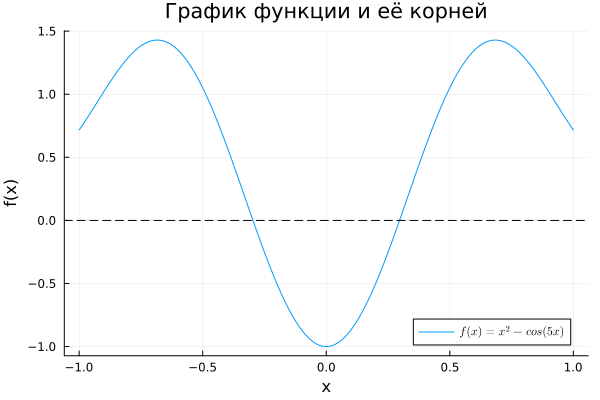

In [5]:
using Plots
f(x) = x^2 - cos(5x)
plot(-1:0.01:1, f, label="\$f(x) = x^2 - cos(5x)\$")
hline!([0], color=:black, linestyle=:dash, label="")
xlabel!("x"); ylabel!("f(x)")
title!("График функции и её корней")

Из графика видно, что функция пересекает ось X дважды, значит уравнение имеет два корня, расположенных приблизительно в интервалах [-0.4, -0.2] и [0.2, 0.4].


На интервале изоляции корня функция f(x) должна удовлетворять следующим условиям:
1) функция f(x) непрерывна вместе со своими производными первого
и второго порядка;

3) функция f(x) на концах интервала [a, b] имеет разные знаки $f(a) \cdot f(b) <
0$;
4) первая и вторая производные $f'(x)$ и $f''(x)$ сохраняют определённый
знак на всём интервале [a, b].

#### 16.1.1.1 Метод половинного деления
Метод половинного деления является простейшим алгоритмом поиска корней. Его геометрическая интерпретация основана на последовательном сужении интервала, содержащего корень, путем деления его пополам. Ключевое преимущество метода – гарантированная сходимость для любой непрерывной функции, меняющей знак на концах интервала. Однако скорость сходимости относительно невысока, что делает метод менее эффективным по сравнению с более сложными алгоритмами.

Алгоритм метода половинного деления:

1) вычисляем середину интервала $c = \frac{a + b}{2}$;
2) находим значение f(c);
3) проверяем условие $f(a) \cdot f(c) < 0$:
   - если выполняется, корень находится в $[a, c]$;
   - иначе - в $[c, b]$.
4) если величина интервала меньше либо равна $\epsilon$, то корень найден,
иначе возвращаемся к п. 1.

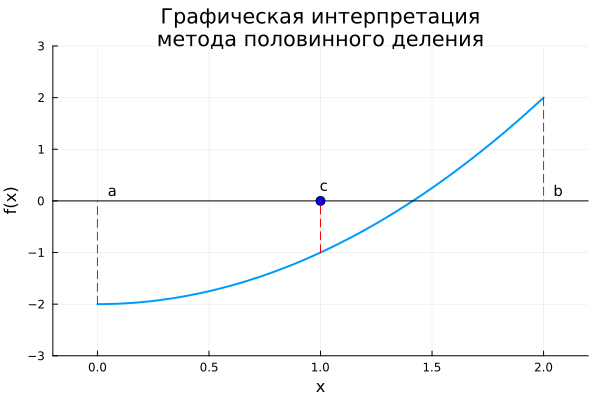

In [4]:
using Plots

# Определяем функцию
f(x) = x^2 - 2

# Начальный интервал 
a, b = 0.0, 2.0 
c = (a + b)/2  # середина

# Создаем основной график
p = plot(f, 0, 2, label="", linewidth=2, legend=:topleft)

# Ось X
hline!([0], label="", color=:black, linestyle=:solid)


# Середина интервала
scatter!([c], [0], label="", color=:blue, markersize=5)

# Пунктирные линии до оси X
plot!([a, a], [f(a), 0], color=:red, linestyle=:dash, label="")
plot!([b, b], [f(b), 0], color=:red, linestyle=:dash, label="")
plot!([c, c], [f(c), 0], color=:red, linestyle=:dash, label="")

annotate!(a+0.05, 0.2, text("a", 10, :left))
annotate!(b+0.05, 0.2, text("b", 10, :left))
annotate!(c, 0.3, text("c", 10, :left))


title!("Графическая интерпретация
метода половинного деления")
xlabel!("x")
ylabel!("f(x)")
xlims!(minimum([a,b])-0.2, maximum([a,b])+0.2)
ylims!(-3, 3)

#### 16.1.1.2 Метод хорд

Метод хорд представляет собой модификацию метода половинного деления, где новое приближение вычисляется не как середина интервала, а как точка пересечения с осью X хорды, проведенной через точки графика функции.

Уравнение хорды через точки $(a, f(a))$ и $(b, f(b))$:
$$
\frac{y - f(a)}{f(b) - f(a)} = \frac{x - a}{b - a}
$$

Нас интересует точка C(c, 0), где прямая пересекает ось абсцисс (y = 0).

Подставляем y = 0:
$$
\frac{0 - f(a)}{f(b) - f(a)} = \frac{c - a}{b - a}
$$

Значит, $c =  a - \frac{f(a)}{f(a) - f(b)} (b - a)$

Алгоритм метода хорд:
1. вычисляем точку $c$ по приведенной формуле;
2. проверяем условие $f(a) \cdot f(c) < 0$:
   - если выполняется, корень находится в $[a, c]$;
   - иначе - в $[c, b]$.
3. итерации продолжаются до достижения условия $|f(c)| < \epsilon$.

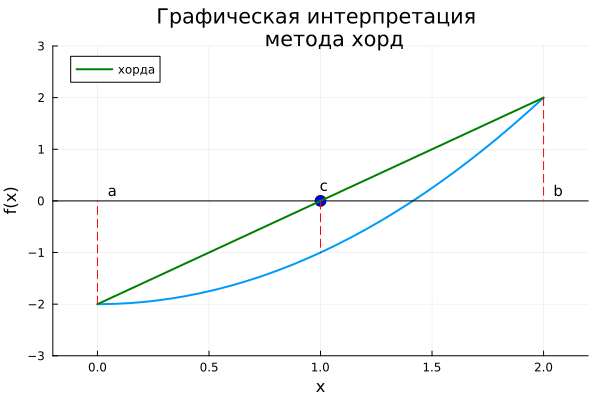

In [3]:
using Plots

# Определяем функцию
f(x) = x^2 - 2

# Начальный интервал
a, b = 0.0, 2.0
c = a - f(a)*(b - a)/(f(b) - f(a))  # Формула метода хорд

# Создаем основной график
p = plot(f, 0, 2, label="", linewidth=2, legend=:topleft)

# Ось X
hline!([0], label="", color=:black, linestyle=:solid)


# Точка пересечения хорды
scatter!([c], [0], label="", color=:blue, markersize=6)

# Хорда (секущая)
plot!([a, b], [f(a), f(b)], color=:green, linestyle=:solid, label="хорда", linewidth=2)

# Пунктирные линии до оси X
plot!([a, a], [f(a), 0], color=:red, linestyle=:dash, label="")
plot!([b, b], [f(b), 0], color=:red, linestyle=:dash, label="")
plot!([c, c], [0, f(c)], color=:red, linestyle=:dash, label="")

annotate!(a+0.05, 0.2, text("a", 10, :left))
annotate!(b+0.05, 0.2, text("b", 10, :left))
annotate!(c, 0.3, text("c", 10, :left))


# Настройки отображения
title!("Графическая интерпретация 
    метода хорд")
xlabel!("x")
ylabel!("f(x)")
xlims!(minimum([a,b])-0.2, maximum([a,b])+0.2)
ylims!(-3, 3)

#### 16.1.1.3 Метод Ньютона (касательных)

В одной из точек интервала [a; b], пусть это будет точка c, проведём касательную. Уравнение этой прямой: $y = k \cdot x + m$.

Так как эта прямая является касательной и проходит через точку $(c , f(c))$, то $k = f'(c)$.
Следовательно,
$$y = f'(x) \cdot x + m, f(c) = f'(c) \cdot c + m, m = f(c) - c \cdot f'(c),$$
$$y = f'(c) \cdot x + f(c) - c \cdot f'(c), y = f'(c) \cdot (x - c) + f(c).$$

Найдём точку пересечения касательной с осью X : 
$$f'(c) \cdot (x - c) + f(c) = 0,$$
$$x = c - \frac{f(c)}{f'(c)}.$$

Если $|f(х)| < \epsilon$, то точность достигнута и точка x – решение, иначе необходимо переменной c присвоить значение x и провести касательную через новую точку c, так продолжать до тех пор, пока |f(x)| не станет меньше ε.

Выбор начальной точки в методе Ньютона требует соблюдения важного условия: значения функции и её второй производной в этой точке должны быть одного знака. 

Поскольку мы предполагаем, что первая и вторая производные не меняют свой знак на рассматриваемом интервале, достаточно проверить условие $f(x)\cdot f''(x) > 0$ на концах отрезка [a, b]. В качестве начального приближения следует выбрать тот конец интервала, где это неравенство выполняется.

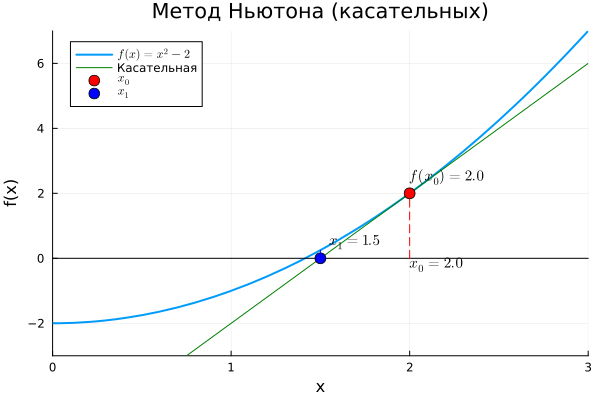

In [2]:
using Plots

# Определяем функцию и производные
f(x) = x^2 - 2
df(x) = 2x   # Первая производная
d2f(x) = 2   # Вторая производная

# Выбираем начальную точку согласно условию f(x)*f''(x) > 0
a, b = 0.0, 2.0
x0 = f(a)*d2f(a) > 0 ? a : b  # Проверяем условие на концах интервала

# Вычисляем первое приближение
x1 = x0 - f(x0)/df(x0)

# Создаем график
plot(f, 0, 3, label="\$f(x) = x^2 - 2\$", linewidth=2, legend=:topleft)

# Ось X
hline!([0], label="", color=:black, linestyle=:solid)

# Касательная в точке x0
tangent(x) = df(x0)*(x - x0) + f(x0)
plot!(0:0.01:3, tangent, label="Касательная", color=:green, linestyle=:solid)

# Точки и их проекции
scatter!([x0], [f(x0)], label="\$x_0\$", color=:red, markersize=6)
scatter!([x1], [0], label="\$x_1\$", color=:blue, markersize=6)

# Пунктирные линии
plot!([x0, x0], [0, f(x0)], color=:red, linestyle=:dash, label="")
plot!([x1, x1], [0, f(x1)], color=:blue, linestyle=:dash, label="")

# Аннотации
annotate!(x0, -0.2, text("\$ x_0 = $x0 \$", 10, :left))
annotate!(x1+0.05, 0.5, text("\$ x_1 = $(round(x1, digits=4)) \$", 10, :left))
annotate!(x0, f(x0)+0.5, text("\$f(x_0) = $(round(f(x0), digits=4))\$", 10, :left))

# Настройки отображения
title!("Метод Ньютона (касательных)")
xlabel!("x")
ylabel!("f(x)")
xlims!(0, 3)
ylims!(-3, 7)

#### 16.1.1.4 Метод простой итерации

Для применения метода простой итерации необходимо преобразовать исходное уравнение $f(x) = 0$ к эквивалентному виду:
$$
x = \phi(x)
$$

Итерационный процесс задается формулой:
$$
x_{k+1} = \phi(x_k), \quad k = 0, 1, 2, \ldots
$$
Вычисления прекращаются при достижении условия $|x_{k+1} - x_k| < \epsilon$, где $\epsilon$ – заданная точность.

Достаточным условием сходимости является выполнение неравенства:
$$
|\phi'(x)| < 1 \quad \text{для всех} \quad x \in [a, b]
$$

Исходное уравнение можно привести к нужному виду следующим способом:
1. умножаем обе части на параметр $\lambda$:
   $$
   \lambda f(x) = 0
   $$
2. добавляем $x$ к обеим частям:
   $$
   x = x + \lambda f(x)
   $$
   
Таким образом, итерационная функция принимает вид:
$$
\phi(x) = x + \lambda f(x)
$$

Для обеспечения сходимости необходимо:
$$
|1 + \lambda f'(x)| < 1
$$

#### 19.1.1.5 Метод секущих
Метод секущих представляет собой итерационный процесс нахождения корня, в котором каждое новое приближение вычисляется на основе двух предыдущих точек.

Уравнение секущей, проходящей через точки $(x_k, f(x_k))$ и $(x_{k+1}, f(x_{k+1}))$:
   $$
   \frac{y - f(x_k)}{f(x_{k+1}) - f(x_k)} = \frac{x - x_k}{x_{k+1} - x_k}
   $$

Точка пересечения с осью OX ($y = 0$):
   $$
   x_{k+2} = x_{k+1} - f(x_{k+1}) \cdot \frac{x_{k+1} - x_k}{f(x_{k+1}) - f(x_k)}, k = 0,1,2,...
   $$

Итерационный процесс продолжается до выполнения условия:
   $$
   |f(x_{k+2})| < \epsilon,
   $$
   где $\epsilon$ – заданная точность вычислений.


Метод половинного деления:
x = 2.094551481306553, f(x) = -2.6315731815884646e-9, итераций: 27

Метод хорд:
x = 2.094551480976474, f(x) = -6.3157301610772265e-9, итераций: 19

Метод секущих:
x = 2.0945514816982445, f(x) = 1.7402674856725753e-9, итераций: 3

Метод Ньютона:
x = 2.0945514815423474, f(x) = 2.327027459614328e-13, итераций: 5

Метод простой итерации:
x = 2.094551481727466, f(x) = 2.066421700419596e-9, итераций: 9


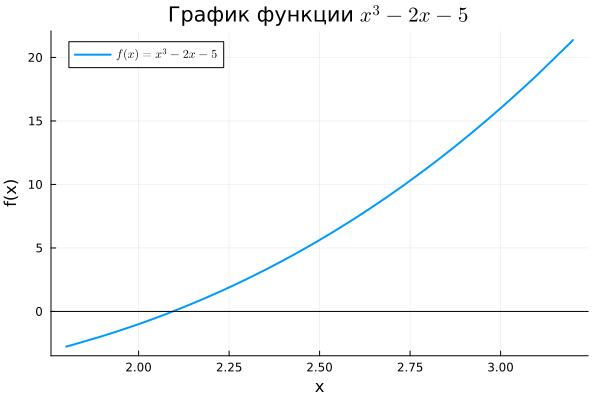

In [24]:
using Plots

# Определяем функцию и её производные
f(x) = x^3 - 2x - 5
df(x) = 3x^2 - 2    # Первая производная
d2f(x) = 6x         # Вторая производная

# Метод половинного деления
function dihotomy(a, b, eps)
    k = 0
    c = 0
    while abs(b - a) > eps
        k += 1
        c = (a + b)/2
        f(a)*f(c) < 0 ? (b = c) : (a = c)
        if abs(f(c)) < eps 
            break
        end
    end
    return (c, k)
end

# Метод хорд
function chord(a, b, eps)
    k = 0
    c = a - f(a)*(b - a)/(f(b) - f(a))
    while abs(f(c)) > eps
        k += 1
        c = a - f(a)*(b - a)/(f(b) - f(a))
        f(a)*f(c) < 0 ? (b = c) : (a = c)
    end
    return (c, k)
end

# Метод секущих
function secant(x0, x1, eps)
    k = 0
    while abs(f(x1)) > eps
        k += 1
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        x0, x1 = x1, x2
    end
    return (x1, k)
end

# Метод Ньютона (касательных)
function newton(a, b, eps)
    k = 0
    f(a)*d2f(a) < 0 ? (c = b) : (c = a)
    while abs(f(c)) > eps
        k += 1
        c = c - f(c)/df(c)
    end
    return (c, k)
end

# Метод простой итерации
function simple_iteration(x0, lambda, eps)
    k = 0
    x = x0
    while abs(f(x)) > eps
        k += 1
        x = x + lambda*f(x)
    end
    return (x, k)
end

# Интервал изоляции корня [2, 3]
a, b = 2.0, 3.0
eps = 1e-8

# Подбираем λ для метода простой итерации
lambda = -0.1  

# Вычисляем корни разными методами
res_dih = dihotomy(a, b, eps)
res_ch = chord(a, b, eps)
res_sec = secant(2.0, 2.1, eps)
res_newt = newton(a, b, eps)
res_iter = simple_iteration(2.0, lambda, eps)

# Выводим результаты
println("Метод половинного деления:")
println("x = ", res_dih[1], ", f(x) = ", f(res_dih[1]), ", итераций: ", res_dih[2])

println("\nМетод хорд:")
println("x = ", res_ch[1], ", f(x) = ", f(res_ch[1]), ", итераций: ", res_ch[2])

println("\nМетод секущих:")
println("x = ", res_sec[1], ", f(x) = ", f(res_sec[1]), ", итераций: ", res_sec[2])

println("\nМетод Ньютона:")
println("x = ", res_newt[1], ", f(x) = ", f(res_newt[1]), ", итераций: ", res_newt[2])

println("\nМетод простой итерации:")
println("x = ", res_iter[1], ", f(x) = ", f(res_iter[1]), ", итераций: ", res_iter[2])

# Строим график
plot(f, 1.8, 3.2, label="\$f(x) = x^3 - 2x - 5\$", linewidth=2)
hline!([0], label="", color=:black)
title!("График функции \$x^3 - 2x - 5\$")
xlabel!("x")
ylabel!("f(x)")


### 16.1.2 Особенности решения алгебраических уравнений
Алгебраическое уравнение (полиномиальное уравнение) – уравнение вида:
$$
P_1x^n + P_2x^{n-1} + \cdots + P_nx + P_{n+1} = 0,
$$
где $P_1 \neq 0$, $n \geq 1$, а $P_i$ – коэффициенты полинома n-й степени.

**Примеры**:
- линейное уравнение ($n=1$): $ax + b = 0$;
- квадратное уравнение ($n=2$): $ax^2 + bx + c = 0$;
- кубическое уравнение ($n=3$): $ax^3 + bx^2 + cx + d = 0$.

Для нахождения полного набора корней полиномиального уравнения n-й степени применяется итерационный подход, основанный на последовательном выделении корней (при помощи метода Мюллера) с последующим понижением степени (схема Горнера) исходного полинома. В общем случае многочлен n-й степени имеет n корней, некоторые из них могут быть комплексными.

#### 16.1.2.1 Метод Мюллера (парабол)

Метод Мюллера представляет собой итерационный алгоритм нахождения корней полиномиальных уравнений. Для работы метода требуются три точки начальныого приближения: $x_0, x_1 и x_2$, в которых вычисляются соответствующие значения функции $y_0 = f(x_0),\quad y_1 = f(x_1) \quad \text{и} \quad y_2 = f(x_2)$. На каждой итерации строится парабола вида $y = a \cdot x^2 + b \cdot x + c$, проходящая через эти три точки, и находится её пересечение с осью абсцисс, которое становится новым приближением.

Cледующее приближение рассчитывается по формуле:

$$x = x_0- \frac{2 \cdot f(x_0)}{ω ± \sqrt{ω^2 - 4 \cdot f(x_0) \cdot y_{012}}}$$

Знак «+» или «-» в формуле выбирается таким образом, чтобы знаменатель в был больше.

ω вычисляется по формуле $ω = y_{01} + y_{02} - y_{12} $, где 
$$y_{01} = \frac{y_0-y_1}{x_0-x_1}, y_{02} = \frac{y_0-y_2}{x_0-x_2}, y_{12} = \frac{y_1-y_2}{x_1-x_2}$$
– разделенные разности первого порядка;
$$y_{123} = \frac{y_{12}-y_{01}}{x_0-x_2}$$
– разделенные разности второго порядка.

Процесс повторяется до достижения заданной точности $|f(x)| < \epsilon$.


#### 16.1.2.2 Метод обратной параболы

Через три заданные точки $(x_0, f(x_0))$, $(x_1, f(x_1))$ и $(x_2, f(x_2))$ проводится парабола вида:

$$
x = a \cdot y^2 + b \cdot y + c,
$$

где коэффициенты $a$, $b$ и $c$ определяются следующими формулами:

$$
a = \frac{(x_2 - x_2)(f(x_1) - f(x_0)) - (x_1 - x_0)(f(x_2) - f(x_1))}{(f(x_2) - f(x_1))(f(x_1) - f(x_0))(f(x_2) - f(x_0))},
$$

$$
b = - a(f(x_2) + f(x_1))\frac{x_2 - x_0 }{f(x_2) - f(x_1)}.
$$

Новое приближение корня вычисляется как свободный член $c$:

$$
x_{n+1} = c = x_2 - a \cdot f(x_2)^2 - b \cdot f(x_2)
$$

После вычисления нового приближения выполняется обновление точек:
$$
\begin{align*}
x_0 &= x_1 \\
x_1 &= x_2 \\
x_2 &= c
\end{align*}
$$
с соответствующим пересчетом значений функции $f(x_0)$, $f(x_1)$ и $f(x_2)$. Итерационный процесс продолжается до достижения заданной точности:

$$
|f(x_2)| < \epsilon
$$


#### 16.1.2.3 Понижение порядка полинома (деление на линейный множитель)

Для полинома степени n:

$$
P(x) = \sum_{k=0}^n p_k x^{n-k} = p_0 x^n + p_1 x^{n-1} + \cdots + p_{n-1} x + p_n,
$$

после нахождения корня $\alpha$ выполняется деление на $(x - \alpha)$, что дает полином степени $n-1$:

$$
P(x) = (x - \alpha)Q(x) + R,
$$

где $Q(x) = \sum_{k=0}^{n-1} b_k x^{n-1-k}$ – частное, а $R$ – остаток.

#### 16.1.2.4 Схема Горнера
Схема Горнера представляет собой алгоритм вычисления значения полинома в заданной точке. Рассмотрим полином n-й степени общего вида:

$$
f(x) = P_1x^n + P_2x^{n-1} + \cdots + P_nx + P_{n+1}
$$

Для конкретного примера возьмем полином 4-й степени:

$$
f(x) = P_1x^4 + P_2x^3 + P_3x^2 + P_4x + P_5,
$$

схема Горнера позволяет переписать его в виде вложенных умножений:

$$
f(x) = P_5 + x(P_4 + x(P_3 + x(P_2 + xP_1)))
$$

Вычислительный процесс реализуется следующим образом:
1. начинаем со старшего коэффициента: $b = P_1$;
2. последовательно добавляем младшие коэффициенты:
   $$
   b = P_2 + x*b,
   $$
   $$
   b = P_3 + x*b,
   $$
   $$
   b = P_4 + x*b,
   $$
   $$
   b = P_5 + x*b. 
   $$


In [5]:
using Printf

# Функция вычисления разделённой разности первого порядка
function razd(x1, x2, f1, f2)
    return (f2 - f1) / (x2 - x1)
end

# Функция вычисления разделённой разности второго порядка
function razd2(x0, x1, x2, f0, f1, f2)
    return (razd(x1, x2, f1, f2) - razd(x0, x1, f0, f1)) / (x0 - x2)
end

# Функция вычисления значения полинома в точке по схеме Горнера
function gr(P, x0)
    y0 = zero(ComplexF64)
    for i in 1:length(P)
        y0 = P[i] + x0 * y0
    end
    return y0
end

# Единая функция понижения порядка полинома с помощью синтетического деления
function delenie_gorner(P, alfa)
    N = length(P)
    B = zeros(ComplexF64, N-1)
    B[1] = P[1]
    for i in 2:N-1
        B[i] = B[i-1] * alfa + P[i]
    end
    return B
end

# Функция нахождения очередного корня полинома методом Мюллера (парабол)
function Muller(P, x1; max_iter=1000, tol=1e-10)
    x2 = 1.15 * x1
    x0 = 0.85 * x1
    f0 = gr(P, x0)
    f1 = gr(P, x1)
    f2 = gr(P, x2)
    x = x2
    
    iter = 0
    while abs(gr(P, x)) > tol && iter < max_iter
        iter += 1
        
        u = razd(x0, x1, f0, f1) + razd(x0, x2, f0, f2) - razd(x1, x2, f1, f2)
        t1 = u - sqrt(u*u - 4.0*f0*razd2(x0, x1, x2, f0, f1, f2))
        t2 = u + sqrt(u*u - 4.0*f0*razd2(x0, x1, x2, f0, f1, f2))
        
        if abs(t1) > abs(t2)
            t = t1
        else
            t = t2
        end
        
        x_new = x0 - 2 * gr(P, x0) / t
        
        x2 = x1
        x1 = x0
        x0 = x_new
        f0 = gr(P, x0)
        f1 = gr(P, x1)
        f2 = gr(P, x2)
        x = x_new
    end
    
    if iter == max_iter
        println("Достигнуто максимальное количество итераций для корня $x")
    end
    
    return x
end

# Функция нахождения всех корней полинома методом Мюллера
function korni_polynom(P)
    N = length(P)
    roots = ComplexF64[]
    current_P = copy(P)
    
    println("Корни полинома методом Мюллера:")
    t = 1
    
    while N > 1
        x = Muller(current_P, 1.0 + 0.1im)
        
        if abs(imag(x)) < 1e-10
            @printf("x%d = %15.10f\n", t, real(x))
        else
            @printf("x%d = %15.10f %+15.10fi\n", t, real(x), imag(x))
        end
        
        push!(roots, x)
        current_P = delenie_gorner(current_P, x)
        N -= 1
        t += 1
    end
    
    return roots
end

# Функция нахождения очередного корня полинома методом обратной параболы
function obr_parabol(P, x1; max_iter=1000, tol=1e-10)
    x2 = 1.15 * x1
    x0 = 0.85 * x1
    f0 = gr(P, x0)
    f1 = gr(P, x1)
    f2 = gr(P, x2)
    
    iter = 0
    while abs(f2) > tol && iter < max_iter
        iter += 1
        
        denom = (f2 - f1) * (f1 - f0) * (f2 - f0)
        if abs(denom) < tol
            error("Деление на ноль в методе обратной параболы")
        end
        
        a = ((x2 - x1)*(f1 - f0) - (x1 - x0)*(f2 - f1)) / denom
        b = -a * (f2 + f1) + (x2 - x1) / (f2 - f1)
        c = x2 - a*f2^2 - b*f2
        
        x0 = x1
        x1 = x2
        x2 = c
        f0 = gr(P, x0)
        f1 = gr(P, x1)
        f2 = gr(P, x2)
    end
    
    if iter == max_iter
        error("Метод обратной параболы не сошелся за $max_iter итераций")
    end
    
    return x2
end

# Функция нахождения всех корней методом обратной параболы
function korni_obr_parabola(P)
    N = length(P)
    roots = ComplexF64[]
    current_P = copy(P)
    
    println("Корни полинома методом обратной параболы:")
    t = 1
    
    while N > 1
        try
            x = obr_parabol(current_P, 1.0 + 0.1im)
            
            if abs(imag(x)) < 1e-10
                @printf("x%d = %15.10f\n", t, real(x))
            else
                @printf("x%d = %15.10f %+15.10fi\n", t, real(x), imag(x))
            end
            
            push!(roots, x)
            current_P = delenie_gorner(current_P, x)
            N -= 1
            t += 1
        catch e
            println("Ошибка при поиске корня: ", e)
            break
        end
    end
    
    return roots
end

# Задание коэффициентов тестового полинома (как в Scilab)
H = ComplexF64[1, -35, 280, -1350, 1000]

println("Коэффициенты: ", H)

@time roots_muller = korni_polynom(H)
@time roots_parabola = korni_obr_parabola(H)

Коэффициенты: ComplexF64[1.0 + 0.0im, -35.0 + 0.0im, 280.0 + 0.0im, -1350.0 + 0.0im, 1000.0 + 0.0im]
Корни полинома методом Мюллера:
x1 =    0.8859704043
x2 =    3.9406835274   +5.2438297489i
x3 =    3.9406835274   -5.2438297489i
x4 =   26.2326625410
  0.104805 seconds (75.40 k allocations: 3.672 MiB, 99.69% compilation time)
Корни полинома методом обратной параболы:
x1 =    0.8859704043
x2 =    3.9406835274   +5.2438297489i
x3 =    3.9406835274   -5.2438297489i
x4 =   26.2326625410
  0.059061 seconds (48.66 k allocations: 2.298 MiB, 99.78% compilation time)


4-element Vector{ComplexF64}:
 0.8859704042973637 - 6.67788805407098e-23im
 3.9406835273706355 + 5.243829748906273im
  3.940683527370633 - 5.24382974890628im
  26.23266254096002 + 3.1634417307913054e-13im

## 16.2 Библиотеки Julia для решения нелинейных уравнений
### 16.2.1 Решение алгебраических трансцендентных уравнений

Для решения полиномиальных уравнений оптимальным выбором будет пакет **PolynomialRoots.jl**. Он предоставляет точные численные методы для нахождения корней полиномов любой степени.

Для получения дополнительной информации о пакете см. [документацию.](https://github.com/giordano/PolynomialRoots.jl)

In [4]:
using PolynomialRoots
# x^3 - 2x^2 - x + 2
roots([2, -1, -2, 1])

3-element Vector{ComplexF64}:
  2.0 - 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [5]:
using PolynomialRoots

# x^4 - 35x^3 + 280x^2 - 1350x + 1000
roots([1000.0, -1350.0, 280.0, -35.0, 1.0]) 

4-element Vector{ComplexF64}:
 26.232662540961364 + 8.881784197001252e-16im
  3.940683527370636 + 5.243829748906273im
 3.9406835273706364 - 5.243829748906274im
 0.8859704042973636 + 0.0im

Для решения алгебраических и трансцендентных уравнений лучше использовать **Roots.jl**.

Для получения дополнительной информации о пакете см. [документацию.](https://github.com/giordano/PolynomialRoots.jl)

**Основные функции**:
- find_zero(f, x0) – поиск корня от начальной точки или интервала;
- find_zeros(f, a, b) – поиск всех корней на интервале [a, b].

**Методы**:
- Bisection() – метод деления пополам (требует f(a)*f(b) < 0);
- Newton() – метод Ньютона (нужна производная);
- Brent() – гибридный алгоритм, сочетающий метод деления пополам, линейную интерполяцию и обратную квадратичную интерполяцию;
- Secant() – метод секущих;
- Order1() – метод обратной квадратичной интерполяции.



Пример 1: решение x^3 - 2x - 5 = 0 разными методами 
Метод Брента: 2.09455148
Метод Ньютона: 2.09455148
Метод секущих: 2.09455148

Пример 2: все корни sin(10x) - x/2 = 0 на [-3, 3] 
11 корней:
[-1.48697, -1.329342, -0.896024, -0.662058, -0.299146, 0.0, 0.299146, 0.662058, 0.896024, 1.329342, 1.48697]


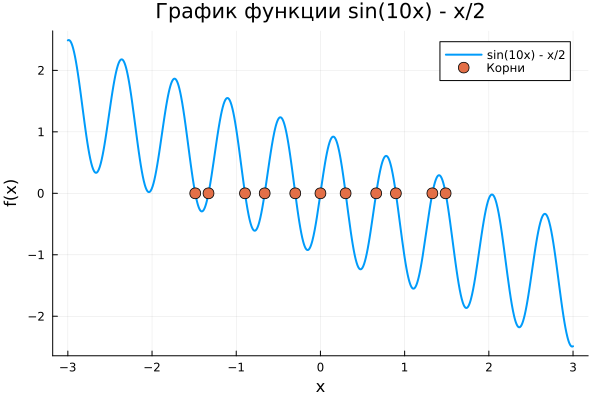


Пример 3: решение cos(x) - x = 0 методом бисекции 
Метод бисекции: 0.73908513

Пример 4: решение exp(-x) - log(x) = 0 

Корень exp(-x) - log(x): 1.3097995858041505


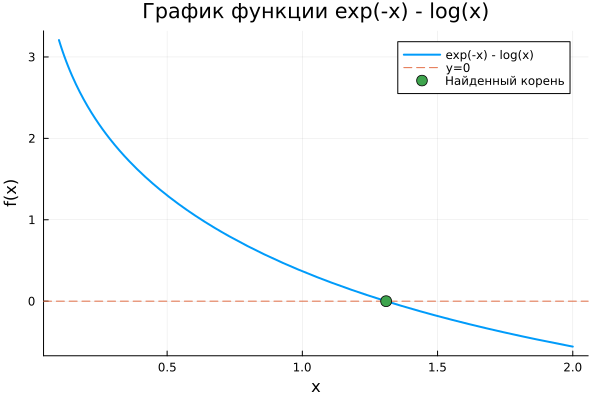

In [9]:
using Roots
using Plots
using Roots: Brent, Newton, Secant, Bisection, Order1



println("\nПример 1: решение x^3 - 2x - 5 = 0 разными методами ")
f(x) = x^3 - 2x - 5

# Метод Брента
root_brent = find_zero(f, (2.0, 3.0), Brent())
println("Метод Брента: ", round(root_brent, digits=8))
# Метод Ньютона
df(x) = 3x^2 - 2
root_newton = find_zero((f, df), 2.0, Newton())
println("Метод Ньютона: ", round(root_newton, digits=8))

# Метод секущих
root_secant = find_zero(f, (2.0, 3.0), Secant())
println("Метод секущих: ", round(root_secant, digits=8))

println("\nПример 2: все корни sin(10x) - x/2 = 0 на [-3, 3] ")
g(x) = sin(10x) - x/2
g_str = "sin(10x) - x/2"

all_roots = find_zeros(g, -3.0, 3.0)
println("Найдено ", length(all_roots), " корней:")
println(round.(all_roots, digits=6))

# Визуализация
p = plot(g, -3, 3, label=g_str, linewidth=2, legend=:topright)
scatter!(all_roots, zeros(length(all_roots)), label="Корни", markersize=6)
title!("График функции $g_str")
xlabel!("x")
ylabel!("f(x)")
display(p)

println("\nПример 3: решение cos(x) - x = 0 методом бисекции ")
h(x) = cos(x) - x
h_str = "cos(x) - x"

root_bisect = find_zero(h, (0.0, 1.0), Bisection())
println("Метод бисекции: ", round(root_bisect, digits=8))


println("\nПример 4: решение exp(-x) - log(x) = 0 ")
k(x) = exp(-x) - log(x)
k_str = "exp(-x) - log(x)"

# Численное решение
root_k = find_zero(k, (0.5, 1.5), Order1())
# Графический анализ
p2 = plot(k, 0.1, 2, label=k_str, linewidth=2)
hline!([0], label="y=0", linestyle=:dash)
title!("График функции $k_str")
xlabel!("x")
ylabel!("f(x)")
println("\nКорень exp(-x) - log(x): ", root_k)
scatter!([root_k], [0], label="Найденный корень", markersize=6)

### 16.2.1 Решение систем нелинейных уравнений


Для решения системы уравнений вида F(x)=0 можно использовать функцию **nlsolve()** из пакета NLsolve.

Для получения дополнительной информации о пакете см. [документацию.](https://docs.sciml.ai/NonlinearSolve/stable/api/nlsolve/)

In [12]:
using NLsolve

function f(x)
    [(x[1] + 3) * (x[2]^3 - 7) + 18,
     sin(x[2] * exp(x[1]) - 1)]
end

sol = nlsolve(f, [0.1, 1.2])  # Начальное приближение [0.1, 1.2]
println("Решение: ", sol.zero)

Решение: [-7.775548712324193e-17, 0.9999999999999999]


Для большей эффективности можно задать якобиан вручную.

In [13]:
function f!(F, x)
    F[1] = (x[1] + 3) * (x[2]^3 - 7) + 18
    F[2] = sin(x[2] * exp(x[1])) - 1
end

function j!(J, x)
    J[1,1] = x[2]^3 - 7
    J[1,2] = 3 * x[2]^2 * (x[1] + 3)
    u = exp(x[1]) * cos(x[2] * exp(x[1]) - 1)
    J[2,1] = x[2] * u
    J[2,2] = u
end

sol = nlsolve(f!, j!, [0.1, 1.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [0.2885804649763026, 1.1514182421994206]
 * Inf-norm of residuals: 0.000584
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 87
 * Jacobian Calls (df/dx): 47

**Основные алгоритмы:**
- метод доверительной области (:trust_region, по умолчанию).
- метод Ньютона (:newton) с опциональным линейным поиском.
- ускорение Андерсона (:anderson) для задач с фиксированной точкой.

Пример выбора метода:

In [ ]:
nlsolve(f!, [0.1, 1.2], method = :newton)

In [14]:
using NLsolve

# Определяем систему уравнений
function system!(F, x)
    F[1] = x[1]^2 + x[2]^2 - 1     # Окружность x^2 + y^2 = 1
    F[2] = exp(x[1]) - x[2]^3       # exp(x) = y^3
end

# Определяем якобиан (матрицу производных)
function jacobian!(J, x)
    J[1,1] = 2*x[1]      # ∂F_1/∂x
    J[1,2] = 2*x[2]      # ∂F_1/∂y
    J[2,1] = exp(x[1])   # ∂F_2/∂x
    J[2,2] = -3*x[2]^2   # ∂F_2/∂y
end

# Первое решение (начальное приближение [0.5, 0.5])
sol1 = nlsolve(system!, jacobian!, [0.5, 0.5])

# Второе решение (новое начальное приближение [-0.5, -0.5])
sol2 = nlsolve(system!, jacobian!, [-0.5, -0.5])

println("Первое решение: ", sol1.zero)
println("Второе решение: ", sol2.zero)

Первое решение: [7.104596769798419e-13, 1.0000000000002307]
Второе решение: [-0.5569037251062016, 0.8305770531229038]


# Глава 17 Численное интегрирование

Для непрерывной функции $f(x)$ на интервале $[a, b]$ с известной первообразной $F(x)$ определенный интеграл вычисляется по формуле:

$$
\int_a^b f(x)dx = F(b) - F(a)
$$

Однако на практике часто возникают ситуации, когда:
- первообразная не выражается через элементарные функции;
- подынтегральная функция задана таблично или графически;
- вычисление первообразной слишком сложно.

В таких случаях применяют численные методы интегрирования (называемые механическими квадратурами), основанные на приближенном вычислении площади под кривой, которая геометрически интерпретирует значение интеграла.

## 17.1 Метод трапеций

При численном интегрировании методом трапеций отрезок $[a, b]$ разбивают на $n$ равных частей точками:

$$x_0 = a, x_1, x_2, ..., x_n = b,$$ 

с шагом $h = \frac{b-a}{n}$.

Где координаты точек разбиения вычисляются по формуле:
$$x_i = x_0 + ih, \quad i = 1, 2, ..., n-1$$

Геометрически метод заключается в замене площади под кривой $y = f(x)$ суммой площадей прямолинейных трапеций:
1. в каждой точке $x_i$ вычисляют значение функции $f(x_i)$;
2. соединяют соседние точки $(x_{i-1}, f(x_{i-1}))$ и $(x_{i}, f(x_{i}))$ прямыми линиями;
3. площадь каждой трапеции вычисляется как:
$$S_i = \frac{h}{2}(f(x_{i-1}) + f(x_{i})),$$

следовательно, площадь искомой фигуры вычисляют по формуле:
$$\int_a^b f(x)dx = \sum_{i=1}^{n}S_i = \frac{h}{2}\sum_{i=1}^{n}f(x_{i-1}) + f(x_i) = h\left( \frac{f(x_{0}) + f(n)}{2} + sum_{i=1}^{n-1}f(x_i) \right),$$

где:
- $h$ – шаг разбиения;
- $x_0, x_1, ..., x_n$ – точки разбиения отрезка;
- $f(x_i)$ – значения функции в точках разбиения.

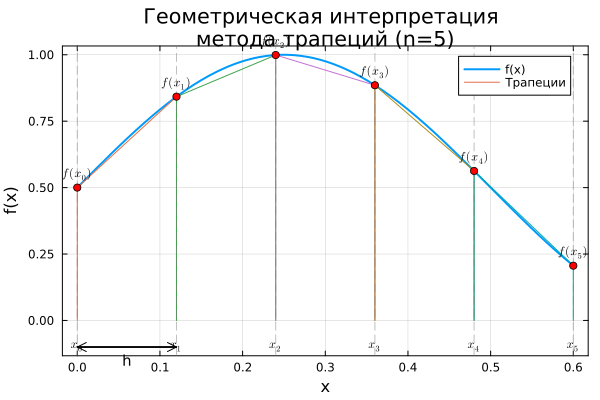

In [6]:
using Plots  

function plot_trapezoid_interpretation(f, a, b, n)
    # Вычисляем точки разбиения
    h = (b - a) / n
    x = range(a, b, length=n+1)
    y = f.(x)
    

    p = plot(f, a, b, linewidth=2, label="f(x)", legend=:topright, title="Геометрическая интерпретация 
метода трапеций (n=$n)", xlabel="x", ylabel="f(x)", framestyle=:box)
    
    # Рисуем трапеции
    for i in 1:n
        plot!([x[i], x[i], x[i+1], x[i+1]], [0, y[i], y[i+1], 0], fillalpha=0.3, linewidth=1, label=i==1 ? "Трапеции" : "")
    end
    

    for i in 0:n
        # Вертикальные линии разбиения
        vline!([x[i+1]], linestyle=:dash, color=:gray, alpha=0.5, label="") 
        
        # Подписи точек x_i
        annotate!(x[i+1], -0.1, text("\$x_{$i}\$", 8, :center))
        
        # Значения функции в точках
        scatter!([x[i+1]], [y[i+1]], markersize=4, color=:red, label="")
        annotate!(x[i+1], y[i+1]+0.05, text("\$f(x_{$i})\$", 8, :center))
    end
    
    # Подпись шага h
    annotate!(x[1] + h/2, -0.15, text("h", 10, :center))
    plot!([x[1], x[2]], [-0.1, -0.1], arrow=true, color=:black, label="")
    plot!([x[2], x[1]], [-0.1, -0.1], arrow=true, color=:black, label="")
end

# Пример использования
f(x) = 0.5 + sin(2π*x)/2  # Тестовая функция
plot_trapezoid_interpretation(f, 0, 0.6, 5)

## 17.2 Метод Симпсона
Пусть отрезок $[a,b]$, разбит на $n=2m$ равных частей с шагом $h = \frac{b-a}{n} = \frac{b-a}{2m}$.

На паре соседних участков кривая $f(x)$ заменяется параболой $L(x)$, коэффициенты которой подобраны так, что она проходит через точки $f(x_0), f(x_1), f(x_2)$.

Площадь криволинейной трапеции составит:
$$
S_i = \frac{h}{3}\left(f(x_{i-1})+4f(x_i)+f(x_{i+1}) \right)
$$

Суммируя площади всех криволинейных трапеций, получим:
$$
\int_a^b f(x)dx \approx \frac{h}{3}(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + ... +f(x_{2m-2}) + 3f(x_{2m-1}) + f(x_{2m})) = \frac{h}{3}\left(f(x_0) + f(x_{2m}) + \sum_{i=1}^{2m-1}pf(x_i)) \right),
$$
где p = 2 при чётном i и p = 4 при нечётном i.


Методы трапеций и Симпсона представляют собой частные случаи общего семейства квадратурных формул Ньютона-Котеса, которые выражаются в виде:

$$
\int_a^b f(x)dx \approx (b-a) \sum_{i=0}^n H_i f(x_i),
$$

где:
- $H_i$ – постоянные коэффициенты Ньютона-Котеса
- $n$ – степень используемого полинома

**Частные случаи:**

| Степень (n) | Название               | Формула                                                                 |
|-------------|---------------------|-------------------------------------------------------------------------|
| 1           | Метод трапеций      | $\frac{h}{2}[f(x_0) + f(x_1)]$                                         |
| 2           | Метод Симпсона      | $\frac{h}{3}[f(x_0) + 4f(x_1) + f(x_2)]$                               |
| 3           | Правило 3/8         | $\frac{3h}{8}[f(x_0) + 3f(x_1) + 3f(x_2) + f(x_3)]$                    |

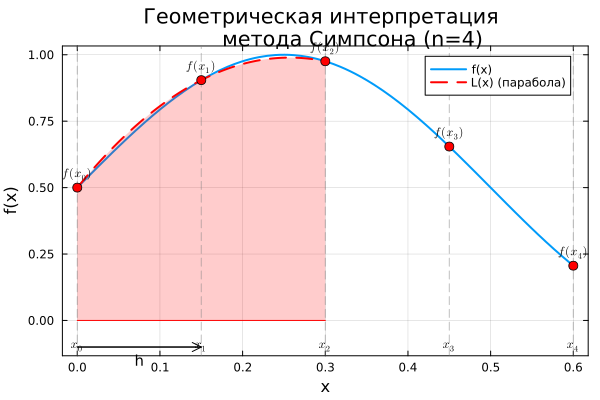

In [7]:
using Plots

function plot_simpson_interpretation(f, a, b, n)
    # Вычисляем точки разбиения
    h = (b - a) / n
    x = range(a, b, length=n+1)
    y = f.(x)
    
    # Создаем график 
    p = plot(f, a, b, linewidth=2, label="f(x)", legend=:topright, title="Геометрическая интерпретация 
        метода Симпсона (n=$n)", xlabel="x", ylabel="f(x)", framestyle=:box)
 
    
    # Строим параболу через первые три точки
    if n >= 2
        # Коэффициенты параболы L(x) = ax^2 + bx + c
        A = [x[1]^2 x[1] 1; x[2]^2 x[2] 1; x[3]^2 x[3] 1]
        coeff = A \ y[1:3]
        parabola(x) = coeff[1]*x^2 + coeff[2]*x + coeff[3]
        
        # Рисуем параболу пунктиром
        xs = range(x[1], x[3], length=100)
        plot!(xs, parabola.(xs), linestyle=:dash, linewidth=2, color=:red, label="L(x) (парабола)")
        
        # Закрашиваем площадь под параболой
        plot!(xs, [0 for _ in xs], fillrange=parabola.(xs), fillalpha=0.2, color=:red, label="")
    end
    
    for i in 0:n
        vline!([x[i+1]], linestyle=:dash, color=:gray, alpha=0.5, label="") 
        scatter!([x[i+1]], [y[i+1]], markersize=5, color=:red, label="")
        annotate!(x[i+1], -0.1, text("\$x_{$i}\$", 8, :center))
        annotate!(x[i+1], y[i+1]+0.05, text("\$f(x_{$i})\$", 8, :center))
    end
    
    # Подпись шага h
    annotate!(x[1] + h/2, -0.15, text("h", 10, :center))
    plot!([x[1], x[2]], [-0.1, -0.1], arrow=true, color=:black, label="")
    
end

# Пример использования
f(x) = 0.5 + sin(2π*x)/2  # Тестовая функция
plot_simpson_interpretation(f, 0, 0.6, 4)  # Четное число интервалов

## 17.3 Правило Рунге оценки точности численного интегрирования

Для вычисления определённого интеграла $\int_a^b f(x)dx$ применяется следующий подход. При разбиении интервала $[a,b]$ на $n$ равных частей с шагом $h = \frac{b-a}{n}$ и узлами $x_i = a + ih$, где $i = 0, 1, ..., n-1, n = b$, численный интеграл на отрезке $[x_i,x_{i+1}]$ выражается как:

$$
I_{i} = \int_{x_i}^{x_{i+1}} f(x)dx = I_{h,i} + R_i,
$$

где $I_{h,i}$ – любая из рассмотренных ранее квадратурных формул,
$R_i = C_i h^k + O(h^{k+1})$ представляет собой погрешность метода, а $k$ – порядок точности:
- $k=1$ для метода прямоугольников;
- $k=2$ для метода трапеций;
- $k=4$ для метода Симпсона.

Согласно правилу Рунге, оценка погрешности вычисляется через сравнение результатов с разными шагами. Если $I_{h,i}$ – значение, полученное с шагом $h$, а $I_{h/2,i}$ – с шагом $h/2$, то погрешность оценивается как:

$$
\epsilon_i \approx \frac{|I_{h,i} - I_{h/2,i}|}{2^k - 1}
$$

Критерий остановки итерационного процесса имеет вид:

$$
\epsilon_i < \tau,
$$

где $\tau$ – заданная допустимая погрешность. Если условие не выполняется, шаг интегрирования уменьшается вдвое ($h \rightarrow h/2$), и вычисления повторяются до достижения требуемой точности.

## 17.4 Квадратурные формулы Гаусса и Чебышёва

Формула Гаусса:

$$
\int_a^b f(t)dt = \frac{b-a}{2} \sum_{i=0}^{n} A_i \cdot f\left(\frac{b+a}{2} + \frac{a-b}{2}t_i\right)
$$

Коэффициенты для различных $n$:

| n | Узлы $t_i$                     | Веса $A_i$                              |
|---|--------------------------------|----------------------------------------|
| 2 | ±0.57735027                    | 1, 1                                    |
| 3 | ±0.77459667, 0                 | 5/9, 8/9, 5/9                           |
| 4 | ±0.86113631, ±0.33998104       | 0.34785484, 0.65214516                  |
| 5 | ±0.90617985, ±0.53846931, 0    | 0.23692688, 0.47862868, 0.56888889      |

Формула Чебышёва:

$$
\int_a^b f(t)dt = \frac{b-a}{2} \sum_{i=0}^{n}f\left(\frac{b+a}{2} + \frac{a-b}{2}t_i\right)
$$

Узлы для различных $n$:

| n | Узлы $t_i$                                                                |
|---|---------------------------------------------------------------------------|
| 2 | ±0.577350                                                                 |
| 3 | ±0.707107, 0                                                              |
| 4 | ±0.794654, ±0.187592                                                      |
| 5 | ±0.832498, ±0.374541, 0                                                   |
| 6 | ±0.866247, ±0.422519, ±0.266635                                           |
| 7 | ±0.883862, ±0.529657, ±0.323912, 0                                        |

In [26]:
# Подынтегральная функция: x^3 / sqrt(2 + cos(x))
function f(x)
    return x^3 / sqrt(2 + cos(x))
end

# Метод трапеций
function trapezoid(a, b, n)
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2
    for i in 1:n-1
        integral += f(a + i*h)
    end
    return integral * h
end

# Вычисление интеграла методом трапеций с заданной точностью eps.Оценка точности проводится по правилу Рунг
function trapezoid_adaptive(a, b, eps)
    n = 5
    Ih = trapezoid(a, b, n)
    error = 100 * eps
    k = 1
    
    while error > eps
        n *= 2
        Ih2 = trapezoid(a, b, n)
        error = abs(Ih - Ih2) / 3  
        k += 1
        Ih = Ih2
    end
    
    return k, Ih
end

# Метод Симпсона
function simpson(a, b, m)
    n = 2*m  # Гарантируем четное число интервалов
    h = (b - a) / n
    integral = f(a) + f(b)
    p = 4
    
    for i in 1:n-1
        integral += p * f(a + i*h)
        p = 6 - p  
    end
    
    return integral * h / 3
end

function simpson_adaptive(a, b, eps)
    n = 3
    Ih = simpson(a, b, n)
    error = 100 * eps
    k = 1
    
    while error > eps
        n *= 2
        Ih2 = simpson(a, b, n)
        error = abs(Ih - Ih2) / 15  
        k += 1
        Ih = Ih2
    end
    
    return k, Ih
end

# Квадратура Гаусса (n=8)
function gauss(a, b)
    t = [-0.96028986, -0.79666648, -0.52553242, -0.18343464,
         0.18343464, 0.52553242, 0.79666648, 0.96028986]
    
    A = [0.10122854, 0.22238104, 0.31370664, 0.36268378,
         0.36268378, 0.31370664, 0.22238104, 0.10122854]
    
    integral = 0.0
    for i in 1:length(t)
        x = (a + b)/2 + (b - a)/2 * t[i]
        integral += A[i] * f(x)
    end
    
    return integral * (b - a)/2
end

# Квадратура Чебышёва (n=9)
function chebyshev(a, b)
    t = [-0.911589, -0.601019, -0.528762, -0.167906, 0.0,
         0.167906, 0.528762, 0.601019, 0.911589]
    
    integral = 0.0
    for i in 1:length(t)
        x = (a + b)/2 + (b - a)/2 * t[i]
        integral += f(x)
    end
    
    return integral * (b - a)/length(t)
end

# Параметры интегрирования
a = 0.0
b = 2π  # Новый интервал интегрирования
eps = 1e-9

# Вычисления и вывод результатов
println("Метод трапеций:")
steps, result = trapezoid_adaptive(a, b, eps)
println("Значение интеграла = ", result)
println("Потребовалось $steps итераций\n")

println("Метод Симпсона:")
steps, result = simpson_adaptive(a, b, eps)
println("Значение интеграла = ", result)
println("Потребовалось $steps итераций\n")

println("Метод Гаусса (n=8):")
result = gauss(a, b)
println("Значение интеграла = ", result, "\n")

println("Метод Чебышёва (n=9):")
result = chebyshev(a, b)
println("Значение интеграла = ", result)

Метод трапеций:
Значение интеграла = 267.7824029347913
Потребовалось 18 итераций

Метод Симпсона:
Значение интеграла = 267.78240293511885
Потребовалось 8 итераций

Метод Гаусса (n=8):
Значение интеграла = 267.755196874095

Метод Чебышёва (n=9):
Значение интеграла = 267.9605088409476


## 17.5 Библиотеки для численного решения интегралов

В Julia существует несколько библиотек для численного интегрирования, каждая со своим синтаксисом и особенностями.

**QuadGK** (1D интегрирование) 

Назначение: Одномерные интегралы (включая бесконечные пределы).  
Метод: Адаптивный квадратурный метод Гаусса-Кронрода.  
Для получения дополнительной информации см. [документацию.](https://github.com/JuliaMath/QuadGK.jl)

In [28]:
using QuadGK

# ∫x² dx от 0 до 1 
result, err = quadgk(x -> x^2, 0, 1)
println("Результат: ", result, ", ошибка: ", err)

# ∫e^(-x²) dx от -∞ до ∞ 
result, _ = quadgk(x -> exp(-x^2), -Inf, Inf)
println("Результат: ", result)

Результат: 0.3333333333333333, ошибка: 0.0
Результат: 1.7724538509055137


**Cubature** (N-D интегрирование)

Назначение: Многомерные интегралы (2D, 3D, ...).  
Метод: Адаптивная квадратура.  
Для получения дополнительной информации см. [документацию.](https://github.com/JuliaMath/Cubature.jl)

In [29]:
using Cubature

# Двойной интеграл ∫∫(x*y) dx dy на [0,1]×[0,1] 
f(x) = x[1] * x[2]  # x[1] = x, x[2] = y
result, _ = hcubature(f, [0, 0], [1, 1])
println("Результат: ", result)

# Тройной интеграл ∫∫∫(x + y + z) dx dy dz на [0,1]³
f(x) = x[1] + x[2] + x[3]
result, err = hcubature(f, [0, 0, 0], [1, 1, 1])
println("Результат: ", result, ", ошибка: ", err)

Результат: 0.25
Результат: 1.4999999999999998, ошибка: 2.220446049250313e-16


**HCubature** (Оптимизированная N-D квадратура)

Назначение: Альтернатива Cubature с оптимизациями.  
Метод: Адаптивная квадратура (часто быстрее).  
Для получения дополнительной информации см. [документацию.](https://github.com/JuliaMath/HCubature.jl)

In [31]:
using HCubature

# ∫∫(sin(x) + cos(y)) dx dy на [0, π]×[0, π/2]
f(x) = sin(x[1]) + cos(x[2])
result, _ = hcubature(f, [0, 0], [π, π/2])
println("Результат: ", result)


Результат: 6.283185307185815


# Глава 18 Численное решение обыкновенных дифференциальных уравнений

При решении задач математического моделирования очень часто приходится решать обыкновенные дифференциальные уравнения. 

Напомним численные методы решения дифференциального уравнения первого порядка. Будем 
рассматривать для следующей *задачи Коши*. 
Найти решение дифференциального уравнения

$$
	x'=f(x,t),
$$
удовлетворяющего начальному условию

$$
	x(t_0)=x_0
$$
иными словами, требуется найти интегральную кривую  $x=x(t)$, проходящую через заданную точку  $M_0(t_0,x_0)$.

Для дифференциального уравнения $n$-го порядка

$$
	x^{(n)}=f(t,x,x^{'},x^{''},\dots,x^{(n-1)})
$$
задача Коши состоит в нахождении решения  $x=x(t)$, удовлетворяющего уравнению и начальным условиям 

$$
	x(t_0)=x_0,{x}^{'}(t_0)=x_0^{'},\dots,x^{(n-1)}(t_0)=x_0^{(n-1)}
$$
Рассмотрим основные численные методы решения задачи Коши.

## 18.1 Решение дифференциальных уравнений методом Эйлера
При решении задачи Коши  на интервале $[t_0,t_n]$, выбрав достаточно малый шаг *h*, построим систему точек 

$$
	t_i=t_0+ih,\quad i=0,1,\dots, n,\quad h=\frac{t_n-t_0}{n}
$$

Основная расчётная формула

$$
	x_{i+1}=x_i+hf(x_i,t_i),\quad i=0,1,\dots,n-1.
$$

## 18.2  Решение дифференциальных уравнений при помощи модифицированного метода Эйлера

Более точным методом решения задачи Коши является *модифицированный метод Эйлера*, при котором сначала вычисляют промежуточные значения.

$$
	t_p=t_i+\frac{h}{2},\ x_p=x_i+\frac{h}{2}f(x_i,t_i),
$$

после чего находят значение  $x_{i+1}$ по формуле

$$
	x_{i+1}=x_i+hf(x_p,t_p),\quad i=0,1,\dots, n-1
$$

## 18.3  Решение дифференциальных уравнений методами Рунге-Кутта

Рассмотренные выше методы Эйлера (как обычный, так и модифицированный) являются частными случаями явного
*метода Рунге-Кутта* $k$-го порядка. В общем случае формула вычисления очередного приближения методом Рунге-Кутта имеет вид:

$$
	x_{i+1}=x_i+h\varphi (t_i,x_i,h),\quad i=0,1,\dots, n-1
$$


Метод Эйлера является методом Рунге-Кутта первого порядка ($k=1$) и получается при  $\varphi
(t,x,h)=f(t,x)$.

Семейство *методов Рунге-Кутта* второго порядка  имеет вид

$$
	\begin{split}
		x_{i+1}&=x_i+h\Biggl((1-\alpha )f(t_i,x_i)+\alpha f\left(t_i+
		\frac{h}{2\alpha },x_i+\frac{h}{2\alpha}f(t_i,x_i)\right)\Biggr),\\
		i&=0,1,\dots, n-1
	\end{split}
$$

Два наиболее известных среди методов Рунге-Кутта второго порядка – это метод Хойна ($\alpha
=\frac{1}{2}$) и модифицированный метод Эйлера ($\alpha =1$). При  $\alpha =\frac{1}{2}$ получаем расчётную формулу *метода Хойна*:

$$
	x_{i+1}=x_i+\frac{h}{2}\left(f(t_i,x_i)+f(t_i+h,x_i+hf(t_i,x_i))\right),\quad i=0,1,\dots, n-1
$$

При  $\alpha =1$ получаем расчётную формулу уже рассмотренного выше модифицированного метода Эйлера 

$$
	x_{i+1}=x_i+h f\left(t_i+\frac{h}{2},x_i+\frac{h}{2}f(t_i,x_i)\right),\quad i=0,1,\dots, n-1
$$

Наиболее известным является *метод Рунге-Кутта четвёртого порядка*, расчётные формулы которого можно записать в виде:

$$
	\left\{
	\begin{aligned}
		x_{i+1} &=x_i+\Delta x_i,\quad i=0,1,\dots, n-1\\
		\Delta x_i &=\frac{h}{6}(K_1^i+2K_2^i+2K_3^i+K_4^i)\\
		K_1^i &=f(t_i,x_i)\\
		K_2^i &=f(t_i+\frac{h}{2},x_i+\frac{h}{2}K_1^i)\\
		K_3^i &=f(t_i+\frac{h}{2},x_i+\frac{h}{2}K_2^i)\\
		K_4^i &=f(t_i+h,x_i+hK_3^i)
	\end{aligned}
	\right.
$$

Рассмотренные методы Рунге-Кутта относятся к классу *одношаговых методов*, в которых для вычисления значения в очередной
точке  $x_{k+1}$ нужно знать значение в предыдущей точке  $x_{k}$.

Ещё один класс методов решения задачи Коши – *многошаговые методы*, в которых используются точки 
$x_{k-3}$,  $x_{k-2}$,  $x_{k-1}$,  $x_{k}$ для вычисления  $x_{k+1}$. В многошаговых методах первые четыре начальные точки  $(t_{0},x_{0})$,  $(t_{1},x_{1})$,  $(t_{2},x_{2})$,  $(t_{3},x_{3})$ должны быть получены заранее любым из одношаговых методов (метод **Эйлера**, **Рунге-Кутта** и т.д.). Наиболее известными многошаговыми методами являются методы прогноза-коррекции **Адамса** и **Милна**.

## 18.4  Решение дифференциальных уравнений методом Адамса


Рассмотрим решение задачи Коши методом **Адамса**, будем численно решать  дифференциальное  на интервале  $[t_{i},t_{i+1}]$, считая, что решение в точках  $t_{0},t_{1},t_{2},\dots,t_{i}$ уже найдено (метод Эйлера или Рунге-Кутта), и значения в этих точках будем использовать для нахождения значения $x(t_{i+1})$.

Первое приближение (прогноз) $\tilde{x}_{i+1}$ вычисляется по формуле.
$$
	\begin{split}
		\tilde {x}_{i+1}=x_{i}&+\frac{h}{24}(-9f(t_{i-3},x_{i-3})+37f(t_{i-2},x_{i-2})-\\
		&-59f(t_{i-1},x_{i-1})+55f(t_{i},x_{i}))
	\end{split}
$$

Как только  $\tilde{x}_{i+1}$ вычислено, его можно использовать для вычисления второго приближения (корректор)

$$
	\begin{split}
		x_{i+1}=x_{i}+\frac{h}{24}(&f(t_{i-2},x_{i-2})-5f(t_{i-1},x_{i-1})+\\
		&+19f(t_{i},x_{i})+9f(t_{i+1},\tilde{x}_{i+1}))
	\end{split}
$$

Таким образом, для вычисления значения $x(t_{i+1})$ методом **Адамса** необходимо последовательно
применять формулы для вычисления прогноза $\tilde{x}_{i+1}$ и корректора $x_{i+1}$, а первые четыре точки можно получить одноточечными методами **Эйлера** или **Рунге-Кутта**.


## 18.5  Решение дифференциальных уравнений методом Милна

Рассмотрим решение задачи Коши методом **Милна**, будем численно решать  дифференциальное  на интервале  $[t_{k},t_{k+1}]$, считая, что решение в точках  $t_{0},t_{1},t_{2},\dots,t_{k}$ уже найдено (метод Эйлера или Рунге-Кутта), и значения в этих точках будем использовать для нахождения значения  $x(t_{k+1})$. Вычислительная схема метода **Милна** состоит в следующем.

Вычисляем первое приближение – ***прогноз Милна*** $\tilde x_{k+1}$ для значения функции в точке  $t_{k+1}$ 

$$
	\tilde {x}_{k+1}=x_{k-3}+\frac{4h}{3}(2f(t_{k-2},x_{k-2})-f(t_{k-1},x_{k-1})+2f(t_{k},x_{k}))
$$

Далее вычисляем второе приближение – ***корректор Милна***

$$
	x_{k+1}=x_{k-1}+\frac{h}{3}(f(t_{k-1},x_{k-1})+4f(t_{k},x_{k})+f(t_{k+1},\tilde{x}_{k+1}))
$$

В методе Милна для вычисления значения  $x(t_{k+1})$ необходимо последовательно применять формулы для вычисления прогноза $\tilde {x}_{k+1}**$ и корректора $x_{k+1}$, а первые четыре точки можно получить методом Рунге-Кутта.

Существует **модифицированный метод Милна**. В нём сначала вычисляется первое приближение – ***прогноз Милна*** $\tilde {x}_{k+1}$, затем вычисляется *управляющий параметр* $m_{k+1}$

$$
	m_{k+1}=\tilde {x}_{k+1}+\frac{28}{29}(x_{k}-\tilde {x}_{k}),
$$

после чего вычисляется значение второго приближения – ***корректор Милна*** по формуле

$$
	x_{k+1}=x_{k-1}+\frac{h}{3}(f(t_{k-1},x_{k-1})+4f(t_{k},x_{k})+f(t_{k+1},m_{k+1}))
$$

В модифицированном методе Милна первые четыре точки также можно получить методом **Рунге-Кутта**.

Рассмотрим примеры решения численного обыкновенных дифференциальных уравнений (задач Коши) с помощью методов **Эйлера**, **Рунге-Кутта**, **Милна** и **Адамса**, используя язык программирования *julia*.

**Задача 1.**

$$
y' = y \cdot \frac{x+2}{x+1}, y(0)=1
$$

Точное решение задачи имеет вид $ y=(x+1) \cdot e^x $. Ниже приведена программа на языке программирования *Julia* решения этой задачи методами **Эйлера**, **Рунге-Кутта**, **Милна** и **Адамса**.


In [1]:
using Printf,Plots
# Правая часть диференциального уравнения
f(x,y)=y*(x+2)/(x+1)
# Начальное условие
x0=Float64(0)
y0=Float64(1)
# Количество участков на интервале интегрирования
n=Int64(10)
# Правая граница интервала интегрирования
xn=Float64(4)
# Шаг интегрирования
h=(xn-x0)/n
# Массив абсцисс
x=zeros(n+1)
# Массив для хранения точного решениия
yt=zeros(n+1)
# Цикл для формирования точного решения
for i=1:n+1
    x[i]=x0+(i-1)*h
    yt[i]=(x[i]+1)*exp(x[i])
end
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(n+1)
ye[1]=y0
# Цикл для формирования решения методом Эйлера
for i=2:n+1
    ye[i]=ye[i-1]+h*f(x[i-1],ye[i-1])
end
# Реализация метода Рунге-Кутта
# Массив для хранения решения методом Рунге-Кутта
yrk=zeros(n+1)
yrk[1]=y0
# Цикл для формирования решения методом Рунге-Кутта
for i=2:n+1
    K1=f(x[i-1],yrk[i-1]);
    K2=f(x[i-1]+h/2,yrk[i-1]+h/2*K1);
    K3=f(x[i-1]+h/2,yrk[i-1]+h/2*K2);
    K4=f(x[i-1]+h,yrk[i-1]+h*K3);
    delt=h/6*(K1+2*K2+2*K3+K4);
    yrk[i]=yrk[i-1]+delt;
 end
# Реализация метода Адамса
# Массив для хранения решения методом Адамса
ya=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ya[i]=yrk[i]
end
# Цикл для формирования решения методом Адамса
for i=5:n+1
    yp=ya[i-1]+h/24*(-9*f(x[i-4],ya[i-4])+37*f(x[i-3],ya[i-3])-59*f(x[i-2],ya[i-2])+55*f(x[i-1],ya[i-1]));
    ya[i]=ya[i-1]+h/24*(f(x[i-3],ya[i-3])-5*f(x[i-2],ya[i-2])+19*f(x[i-1],ya[i-1])+9*f(x[i],yp));
end
# Реализация метода Милна
# Массив для хранения решения методом Милна
ym=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ym[i]=yrk[i]
end
# Цикл для формирования решения методом Милна
for i=5:n+1
    yp=ym[i-4]+4*h/3*(2*f(x[i-3],ym[i-3])-f(x[i-2],ym[i-2])+2*f(x[i-1],ym[i-1]));
    ym[i]=ym[i-2]+h/3*(f(x[i-2],ym[i-2])+4*f(x[i-1],ym[i-1])+f(x[i],yp));
end
# Цикл для вывода результатов
for i=1:n+1
    @printf("x=%8.2f, ye=%8.4f, yrk=%8.4f, ya=%8.4f, ym=%8.4f, yt=%8.4f\n", x[i], ye[i], yrk[i], ya[i], ym[i], yt[i])
end

x=    0.00, ye=  1.0000, yrk=  1.0000, ya=  1.0000, ym=  1.0000, yt=  1.0000
x=    0.40, ye=  1.8000, yrk=  2.0866, ya=  2.0866, ym=  2.0866, yt=  2.0886
x=    0.80, ye=  3.0343, yrk=  4.0000, ya=  4.0000, ym=  4.0000, yt=  4.0060
x=    1.20, ye=  4.9223, yrk=  7.2905, ya=  7.2905, ym=  7.2905, yt=  7.3043
x=    1.60, ye=  7.7862, yrk= 12.8498, ya= 12.8478, ym= 12.8499, yt= 12.8779
x=    2.00, ye= 12.0985, yrk= 22.1132, ya= 22.1066, ym= 22.1129, yt= 22.1672
x=    2.40, ye= 18.5510, yrk= 37.3796, ya= 37.3635, ym= 37.3781, yt= 37.4788
x=    2.80, ye= 28.1539, yrk= 62.3124, ya= 62.2784, ym= 62.3081, yt= 62.4897
x=    3.20, ye= 42.3790, yrk=102.7267, ya=102.6597, ym=102.7166, yt=103.0366
x=    3.60, ye= 63.3668, yrk=167.8190, ya=167.6932, ym=167.7974, yt=168.3519
x=    4.00, ye= 94.2236, yrk=272.0866, ya=271.8580, ym=272.0434, yt=272.9908


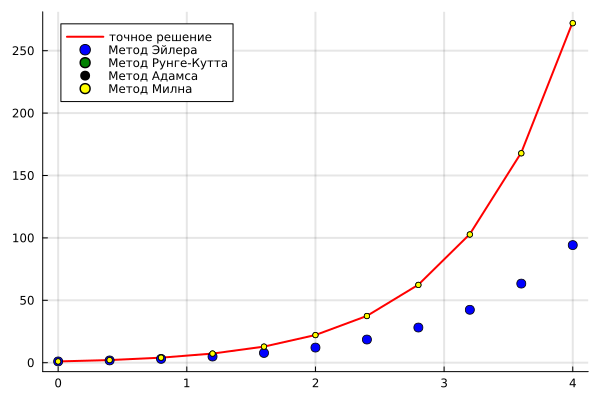

In [2]:
# Графическое решение задачи
Plots.plot(x, yt, color = :red, linewidth = 2, label = "точное решение",gridlinewidth=2)
Plots.scatter!(x, ye, color = :blue, markersize = 5, label = "Метод Эйлера")
Plots.scatter!(x, yrk, color = :green, markersize = 3, label = "Метод Рунге-Кутта")
Plots.scatter!(x, ya, color = :black, markersize = 3, label = "Метод Адамса")
Plots.scatter!(x, ym, color = :yellow, markersize = 3, label = "Метод Милна")

**Задача 2.**

$$
y'=y, y(0)=1. 
$$

Точное решение этого уравнение имеет вид $y=e^x$. Решая уравнение численно методами **Эйлера**, **Рунге-Кутта**, **Милна** и **Адамса** в точке x=1 должны получить число $e=2.7182818...$. Решение приведено ниже.

In [3]:
# Правая часть диференциального уравнения
f(x,y)=y
# Начальное условие
x0=Float64(0)
y0=Float64(1)
# Количество участков на интервале интегрирования
n=Int64(10)
# Правая граница интервала интегрирования
xn=Float64(1)
# Шаг интегрирования
h=(xn-x0)/n
# Массив абсцисс
x=zeros(n+1)
# Массив для хранения точного решениия
yt=zeros(n+1)
# Цикл для формирования точного решения
for i=1:n+1
    x[i]=x0+(i-1)*h
    yt[i]=exp(x[i])
end
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(n+1)
ye[1]=y0
# Цикл для формирования решения методом Эйлера
for i=2:n+1
    ye[i]=ye[i-1]+h*f(x[i-1],ye[i-1])
end
# Реализация метода Рунге-Кутта
# Массив для хранения решения методом Рунге-Кутта
yrk=zeros(n+1)
yrk[1]=y0
# Цикл для формирования решения методом Рунге-Кутта
for i=2:n+1
    K1=f(x[i-1],yrk[i-1]);
    K2=f(x[i-1]+h/2,yrk[i-1]+h/2*K1);
    K3=f(x[i-1]+h/2,yrk[i-1]+h/2*K2);
    K4=f(x[i-1]+h,yrk[i-1]+h*K3);
    delt=h/6*(K1+2*K2+2*K3+K4);
    yrk[i]=yrk[i-1]+delt;
 end
# Реализация метода Адамса
# Массив для хранения решения методом Адамса
ya=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ya[i]=yrk[i]
end
# Цикл для формирования решения методом Адамса
for i=5:n+1
    yp=ya[i-1]+h/24*(-9*f(x[i-4],ya[i-4])+37*f(x[i-3],ya[i-3])-59*f(x[i-2],ya[i-2])+55*f(x[i-1],ya[i-1]));
    ya[i]=ya[i-1]+h/24*(f(x[i-3],ya[i-3])-5*f(x[i-2],ya[i-2])+19*f(x[i-1],ya[i-1])+9*f(x[i],yp));
end
# Реализация метода Милна
# Массив для хранения решения методом Милна
ym=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ym[i]=yrk[i]
end
# Цикл для формирования решения методом Милна
for i=5:n+1
    yp=ym[i-4]+4*h/3*(2*f(x[i-3],ym[i-3])-f(x[i-2],ym[i-2])+2*f(x[i-1],ym[i-1]));
    ym[i]=ym[i-2]+h/3*(f(x[i-2],ym[i-2])+4*f(x[i-1],ym[i-1])+f(x[i],yp));
end
# Вывод числа e, которое получено путем численного решения оду y'=y разными методами
    @printf("x=%8.2f, ye=%8.6f, yrk=%8.6f, ya=%8.6f, ym=%8.6f, yt=%8.6f\n", x[n+1], ye[n+1], yrk[n+1], ya[n+1], ym[n+1], yt[n+1])


x=    1.00, ye=2.593742, yrk=2.718280, ya=2.718284, ym=2.718282, yt=2.718282


**Задача 3.**

$$
y'=\frac{4}{1+x^2}, y(0)=0. 
$$

Точное решение этого уравнение имеет вид $y=arctg x$. Решая уравнение численно методами **Эйлера**, **Рунге-Кутта**, **Милна** и **Адамса** в точке x=1 должны получить число $\pi=3.14159...$. Решение приведено ниже.

In [4]:
# Правая часть диференциального уравнения
f(x,y)=4/(1+x*x)
# Начальное условие
x0=Float64(0)
y0=Float64(0)
# Количество участков на интервале интегрирования
n=Int64(10)
# Правая граница интервала интегрирования
xn=Float64(1)
# Шаг интегрирования
h=(xn-x0)/n
# Массив абсцисс
x=zeros(n+1)
# Массив для хранения точного решениия
yt=zeros(n+1)
# Цикл для формирования точного решения
for i=1:n+1
    x[i]=x0+(i-1)*h
    yt[i]=4*atan(x[i])
end
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(n+1)
ye[1]=y0
# Цикл для формирования решения методом Эйлера
for i=2:n+1
    ye[i]=ye[i-1]+h*f(x[i-1],ye[i-1])
end
# Реализация метода Рунге-Кутта
# Массив для хранения решения методом Рунге-Кутта
yrk=zeros(n+1)
yrk[1]=y0
# Цикл для формирования решения методом Рунге-Кутта
for i=2:n+1
    K1=f(x[i-1],yrk[i-1]);
    K2=f(x[i-1]+h/2,yrk[i-1]+h/2*K1);
    K3=f(x[i-1]+h/2,yrk[i-1]+h/2*K2);
    K4=f(x[i-1]+h,yrk[i-1]+h*K3);
    delt=h/6*(K1+2*K2+2*K3+K4);
    yrk[i]=yrk[i-1]+delt;
 end
# Реализация метода Адамса
# Массив для хранения решения методом Адамса
ya=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ya[i]=yrk[i]
end
# Цикл для формирования решения методом Адамса
for i=5:n+1
    yp=ya[i-1]+h/24*(-9*f(x[i-4],ya[i-4])+37*f(x[i-3],ya[i-3])-59*f(x[i-2],ya[i-2])+55*f(x[i-1],ya[i-1]));
    ya[i]=ya[i-1]+h/24*(f(x[i-3],ya[i-3])-5*f(x[i-2],ya[i-2])+19*f(x[i-1],ya[i-1])+9*f(x[i],yp));
end
# Реализация метода Милна
# Массив для хранения решения методом Милна
ym=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ym[i]=yrk[i]
end
# Цикл для формирования решения методом Милна
for i=5:n+1
    yp=ym[i-4]+4*h/3*(2*f(x[i-3],ym[i-3])-f(x[i-2],ym[i-2])+2*f(x[i-1],ym[i-1]));
    ym[i]=ym[i-2]+h/3*(f(x[i-2],ym[i-2])+4*f(x[i-1],ym[i-1])+f(x[i],yp));
end
# Вывод числа pi, которое получено путем численного решения оду y'=y разными методами
    @printf("x=%8.2f, ye=%8.6f, yrk=%8.6f, ya=%8.6f, ym=%8.6f, yt=%8.6f\n", x[n+1], ye[n+1], yrk[n+1], ya[n+1], ym[n+1], yt[n+1])


x=    1.00, ye=3.239926, yrk=3.141593, ya=3.141553, ym=3.141584, yt=3.141593


**Задача 4.**

$$
y'=\frac{1}{x}, y(1)=0. 
$$

Точное решение этого уравнение имеет вид $y=ln x$. Решая уравнение численно методами **Эйлера**, **Рунге-Кутта**, **Милна** и **Адамса** в точке x=1 должны получить число $ln 2=0.693...$. Решение приведено ниже.

In [5]:
# Правая часть диференциального уравнения
f(x,y)=1/x
# Начальное условие
x0=Float64(1)
y0=Float64(0)
# Количество участков на интервале интегрирования
n=Int64(10)
# Правая граница интервала интегрирования
xn=Float64(2)
# Шаг интегрирования
h=(xn-x0)/n
# Массив абсцисс
x=zeros(n+1)
# Массив для хранения точного решениия
yt=zeros(n+1)
# Цикл для формирования точного решения
for i=1:n+1
    x[i]=x0+(i-1)*h
    yt[i]=log(x[i])
end
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(n+1)
ye[1]=y0
# Цикл для формирования решения методом Эйлера
for i=2:n+1
    ye[i]=ye[i-1]+h*f(x[i-1],ye[i-1])
end
# Реализация метода Рунге-Кутта
# Массив для хранения решения методом Рунге-Кутта
yrk=zeros(n+1)
yrk[1]=y0
# Цикл для формирования решения методом Рунге-Кутта
for i=2:n+1
    K1=f(x[i-1],yrk[i-1]);
    K2=f(x[i-1]+h/2,yrk[i-1]+h/2*K1);
    K3=f(x[i-1]+h/2,yrk[i-1]+h/2*K2);
    K4=f(x[i-1]+h,yrk[i-1]+h*K3);
    delt=h/6*(K1+2*K2+2*K3+K4);
    yrk[i]=yrk[i-1]+delt;
 end
# Реализация метода Адамса
# Массив для хранения решения методом Адамса
ya=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ya[i]=yrk[i]
end
# Цикл для формирования решения методом Адамса
for i=5:n+1
    yp=ya[i-1]+h/24*(-9*f(x[i-4],ya[i-4])+37*f(x[i-3],ya[i-3])-59*f(x[i-2],ya[i-2])+55*f(x[i-1],ya[i-1]));
    ya[i]=ya[i-1]+h/24*(f(x[i-3],ya[i-3])-5*f(x[i-2],ya[i-2])+19*f(x[i-1],ya[i-1])+9*f(x[i],yp));
end
# Реализация метода Милна
# Массив для хранения решения методом Милна
ym=zeros(n+1)
# Формирование первых четырёх точек методом Рунге-Кутта
for i=1:4
    ym[i]=yrk[i]
end
# Цикл для формирования решения методом Милна
for i=5:n+1
    yp=ym[i-4]+4*h/3*(2*f(x[i-3],ym[i-3])-f(x[i-2],ym[i-2])+2*f(x[i-1],ym[i-1]));
    ym[i]=ym[i-2]+h/3*(f(x[i-2],ym[i-2])+4*f(x[i-1],ym[i-1])+f(x[i],yp));
end
# Вывод ln2, которое получено путем численного решения оду y'=y разными методами
    @printf("x=%8.2f, ye=%8.6f, yrk=%8.6f, ya=%8.6f, ym=%8.6f, yt=%8.6f\n", x[n+1], ye[n+1], yrk[n+1], ya[n+1], ym[n+1], yt[n+1])


x=    2.00, ye=0.718771, yrk=0.693147, ya=0.693153, ym=0.693149, yt=0.693147


**Задача 5 (об остывании кофе)**. Дифференциальное уравнение, описывающее процесс остывания кофе в чашке, известно в науке, как закон теплопроводности Ньютона.

$$
\frac{dT}{dt}=-r \cdot (T-T_s), T(0)=T_0=90
$$

здесь $T(t)$ - функция определяющая температуру чашки T в момент времени t, $T_s=23$ - температура окружающей среды, r - коэффициент остывания, для керамической чашки 250 мл - $r=0.035 \frac{Вт}{м \cdot К}$, для керамической чашки 125 мл - $r=0.047 \frac{Вт}{м \cdot К}$. Точное решение имеет вид:
$$
T(t)=T_0+(T_s -T_0) \cdot e^{-r t}
$$


Решим уравнение численно методами **Эйлера**, **Рунге-Кутта**. Реализация на языке *Julia* приведена ниже.

In [6]:
r=0.047
Ts=23
T0=90
# Правая часть диференциального уравнения
f(x,y)=-r*(y-Ts)
# Начальное условие
x0=Float64(0)
y0=Float64(90)
# Количество участков на интервале интегрирования
n=Int64(10)
# Правая граница интервала интегрирования
xn=Float64(5)
# Шаг интегрирования
h=(xn-x0)/n
# Массив абсцисс
x=zeros(n+1)
for i=1:n+1
    x[i]=x0+(i-1)*h
end
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(n+1)
ye[1]=y0
# Цикл для формирования решения методом Эйлера
for i=2:n+1
    ye[i]=ye[i-1]+h*f(x[i-1],ye[i-1])
end
# Реализация метода Рунге-Кутта
# Массив для хранения решения методом Рунге-Кутта
yrk=zeros(n+1)
yrk[1]=y0
# Цикл для формирования решения методом Рунге-Кутта
for i=2:n+1
    K1=f(x[i-1],yrk[i-1]);
    K2=f(x[i-1]+h/2,yrk[i-1]+h/2*K1);
    K3=f(x[i-1]+h/2,yrk[i-1]+h/2*K2);
    K4=f(x[i-1]+h,yrk[i-1]+h*K3);
    delt=h/6*(K1+2*K2+2*K3+K4);
    yrk[i]=yrk[i-1]+delt;
 end
# Цикл для вывода результатов
for i=1:n+1
    @printf("t=%8.2f, ye=%8.4f, yrk=%8.4f\n", x[i], ye[i], yrk[i])
end

t=    0.00, ye= 90.0000, yrk= 90.0000
t=    0.50, ye= 88.4255, yrk= 88.4439
t=    1.00, ye= 86.8880, yrk= 86.9239
t=    1.50, ye= 85.3866, yrk= 85.4392
t=    2.00, ye= 83.9205, yrk= 83.9889
t=    2.50, ye= 82.4889, yrk= 82.5724
t=    3.00, ye= 81.0909, yrk= 81.1888
t=    3.50, ye= 79.7258, yrk= 79.8373
t=    4.00, ye= 78.3927, yrk= 78.5172
t=    4.50, ye= 77.0910, yrk= 77.2277
t=    5.00, ye= 75.8199, yrk= 75.9682


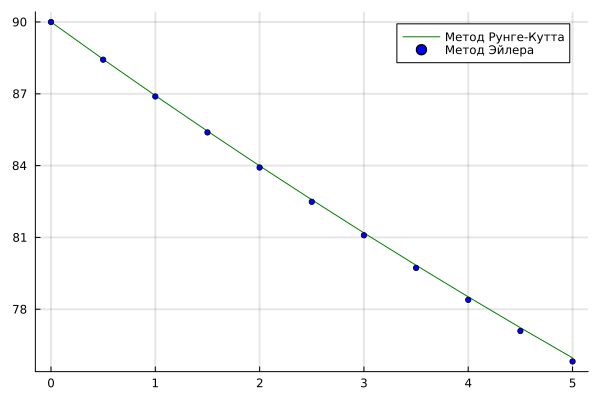

In [7]:
# Графическое решение задачи
#plot(x, yt, color = :red, linewidth = 2, label = "точное решение",gridlinewidth=2)
Plots.plot(x, yrk, color = :green, markersize = 3, label = "Метод Рунге-Кутта",gridlinewidth=2)
Plots.scatter!(x, ye, color = :blue, markersize = 3, label = "Метод Эйлера")

## 18.6 Использование пакета DifferentialEquations для решения дифференциальных уравнений

Рассмотрим использование пакета DifferentialEquations на примере решения следующей задачи Коши

Сущестует описание на русском https://engee.com/helpcenter/stable/ru/julia/DifferentialEquations/getting_started.html

Решить задачу Коши

$$
\cfrac{dx}{dt}=6 \dot x - 13 \cdot t^3 - 22 \cdot t^2 +17 \cdot t -11 +sin(t) \\
x(0)=2
$$

Точное решение имеет вид

$$
x(t)=\cfrac{119}{296}\cdot e^{6t}+\cfrac{1}{24} \cdot \left (52 \cdot t^{3}+114 \cdot t^{2}- 30 \cdot t+39 \right)-\cfrac{1}{37} \cdot (6 \cdot \sin~t+\cos~t).
$$




In [8]:
using DifferentialEquations
using Plots
#Оперелим дифференциальное уравнение
#Правая часть дифференциального уравнения
f(x, p, t) = 6*x-13*t^3-22*t^2+17*t-11+sin(t)
#f(x, p, t) = p[1]*x+p[2]*t^3+p[3]*t^2+p[4]*t+p[4]+sin(t)
#Начальное значение
u0 = 2
# Интервал интегрирования
tspan = (0.0, 1.0)
#p=[6 -13 -22 17 -11]
# Определяем всю задачу Коши
prob = ODEProblem(f, u0, tspan)
#prob = ODEProblem(f, u0, tspan,p)

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 2

In [9]:
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8,saveat=0.1)
#sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8,saveat=0.1,save_everystep = false)
# Параметры решателя solve
#prob - сама задача, 
# Tsit5() - метод решения - в данном случае метод Цитураса 5 поряка
# могут быть другие значения 
# см. описнаия ниже , пречисленные ниже
# reltol - относительная точность, abstol - абсолютная точность, 
# save_everystep = false - сохранять или нет каждую точку найденного решения

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
   2.0
   2.239126463636707
   2.858405134789061
   4.094379683876676
   6.367239036937074
  10.431798909742389
  17.652609386049154
  30.50523495166455
  53.48964737230435
  94.79453714721087
 169.32988778067627

Вот некоторые распространенные алгоритмы для решения ОДУ в **DifferentialEquations.jl** (https://engee.com/helpcenter/stable/ru/julia/DifferentialEquations/getting_started.html):

+ **AutoTsit5(Rosenbrock23())** подходит для решения как жестких, так и нежестких уравнений. Это неплохой алгоритм в том случае, если об уравнении ничего не известно;

+ **AutoVern7(Rodas5())** подходит для эффективного решения как жестких, так и нежестких уравнений с высокой точностью;

+ **Tsit5()** подходит для стандартных нежестких уравнений. Это первый алгоритм, который следует попробовать в большинстве случаев;

+ **BS3()** подходит для быстрого решения нежестких уравнений с низкой точностью;

+ **Vern7()** подходит для решения нежестких уравнений с высокой точностью;

+ **Rodas4()** или **Rodas5()** подходят для небольших жестких уравнений с определенными в Julia типами, событиями и т. д.;

+ **KenCarp4()** или **TRBDF2()** подходят для решения жестких уравнений среднего размера (100—​2000 ОДУ);

+ **RadauIIA5()** подходит для решения жестких уравнений с очень высокой точностью;

+ **QNDF()** подходит для решения больших жестких уравнений.

**Анализ решения**:
+ solve(x) – значение решения в точке x;
+ solve[n] – обращение к значению решения номер *n*;
+ solve.t[n] – значение абсциссы в точке  номер *n*; 


In [10]:
sol(0.15)

2.5487657992128843

In [11]:
g(t,x)=6*x-13*t^3-22*t^2+17*t-11+sin(t)
#точное решение
hx=0.01
n=Int64(1/hx)+1
tt=zeros(n)
yt=zeros(n)
for i=1:n
    tt[i]=(i-1)*hx
    yt[i]=119/296*exp(6*tt[i])+1/24 * (52 * tt[i]^3+114 * tt[i]^2- 30 * tt[i]+39 )-1/37 * (6 *sin(tt[i])+cos(tt[i]))
    #y[i]=sol(tt[i])
end
  
#приближённое решение
h2=0.2
n2=Int64(1/h2)+1
t2=zeros(n2)
y2=zeros(n2)
yRK=zeros(n2)
for i=1:n2
    t2[i]=(i-1)*h2
    y2[i]=sol(t2[i])
end
#Метод Рунге-Кутта

yRK[1]=u0;
   for i=2:n2
    K1=g(tt[i-1],yRK[i-1]);
    K2=g(tt[i-1]+h2/2,yRK[i-1]+h2/2*K1);
    K3=g(tt[i-1]+h2/2,yRK[i-1]+h2/2*K2);
    K4=g(tt[i-1]+h2,yRK[i-1]+h2*K3);
    delt=h2/6*(K1+2*K2+2*K3+K4);
    yRK[i]=yRK[i-1]+delt;
  end

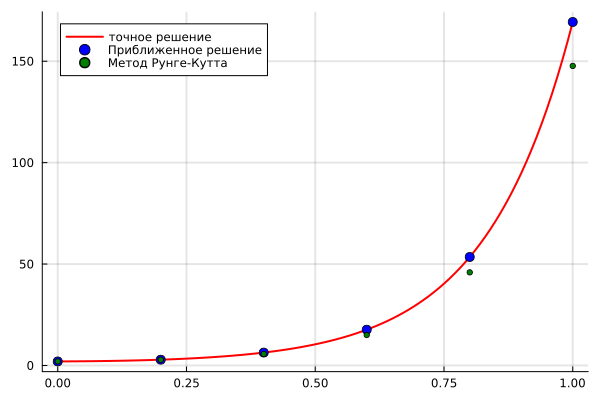

In [12]:
plot(tt, yt, color = :red, linewidth = 2, label = "точное решение",gridlinewidth=2)
scatter!(t2, y2, color = :blue, markersize = 5, label = "Приближенное решение")
scatter!(t2, yRK, color = :green, markersize = 3, label = "Метод Рунге-Кутта")


## 18.7 Решение системы обыкновенных дифференциальных уравнений

 Найти решение задачи Коши для следующей системыдифференциальных уравнений:
$$
	\cfrac{dx}{dt}=y \cdot z\\
	\cfrac{dy}{dt}=-x \cdot z\\
	\cfrac{dz}{dt}=-\cfrac{1}{2} \cdot z \cdot y \\
    x(0)=0, y(0)=1, z(0)=1.
$$
на интервале [0; 1].

Рассмотрим решение системы обыкновенных дифференциальных уравнений методом **Эйлера**.

In [2]:
# Правая часть системы
function fe(u,t)
   du=zeros(3) 
   du[1]=u[2]*u[3];
   du[2]=-u[1]*u[3]; 
   du[3]=-u[1]*u[2]/2;
   return du
end
# Начальное условие
te0=Float64(0)
# Правая граница интервала интегрирования
ten=Float64(1)
ue0=[Float64(0);Float64(1);Float64(1)];
#println(u0);
# Количество участков на интервале интегрирования
ne=Int64(25)
# Шаг интегрирования
he=(ten-te0)/ne
# Массив абсцисс
te=zeros(ne+1)
for i=1:ne+1
    te[i]=te0+(i-1)*he
end
println(te)
# Реализация метода Эйлера
# Массив для хранения решения методом Эйлера
ye=zeros(3,ne+1)
ye[:,1]=ue0
for i=2:ne+1
    ye[:,i]=ye[:,i-1]+he*fe(ye[:,i-1],te[i-1])
end
#print(ye)

[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.84, 0.88, 0.92, 0.96, 1.0]


***Самостоятельное задание.*** Реализуйте метод **Рунге-Кутта** для рассматриваемой системы.

График решения, найденного методом **Эйлера**.



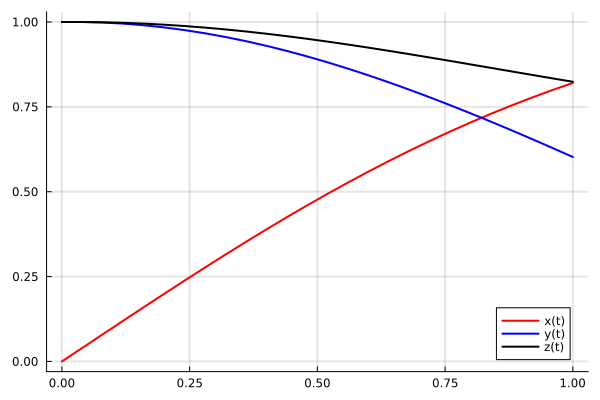

In [4]:
using Plots
Plots.plot(te, ye[1,:], color = :red, linewidth = 2, label = "x(t)",gridlinewidth=2)
Plots.plot!(te, ye[2,:], color = :blue, linewidth = 2, label = "y(t)",gridlinewidth=2)
Plots.plot!(te, ye[3,:], color = :black, linewidth = 2, label = "z(t)",gridlinewidth=2)

А теперь найдём решенние используя пакет DifferentialEquations.

In [5]:
function f(du, u,t)
   du[1]=u[2]*u[3];
   du[2]=-u[1]*u[3]; 
   du[3]=-u[1]*u[2]/2;  
end

f (generic function with 1 method)

In [6]:
using DifferentialEquations
function syst1(du, u,p,t)
   du[1]=u[2]*u[3];
   du[2]=-u[1]*u[3]; 
   du[3]=-u[1]*u[2]/2;  
end
u0 = [0; 1;1]
tspan = (0, 1)
prob = ODEProblem(syst1, u0, tspan)
sol = solve(prob,saveat=0.1)
#sol = solve(prob, AutoTsit5(Rosenbrock23()), reltol = 1e-8, abstol = 1e-8)
#sol = solve(prob, Rodas5(), reltol = 1e-8, abstol = 1e-8)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Vector{Float64}}:
 [0.0, 1.0, 1.0]
 [0.09975069692157078, 0.9950124574490465, 0.9975093446926175]
 [0.19802171304561336, 0.9801976504534762, 0.9901483348406972]
 [0.29341286099925135, 0.9559856807824527, 0.9782403667954936]
 [0.3846721134203797, 0.9230534381368, 0.9622961584497687]
 [0.4707503267853382, 0.882265808330789, 0.9429719914112777]
 [0.5508311685459317, 0.8346170176425881, 0.92102814879505]
 [0.6243399969713977, 0.7811526334906391, 0.8972734753476033]
 [0.6909341435255074, 0.7229165924795662, 0.8725273083774598]
 [0.7504783033475109, 0.660895315894316, 0.8475796793936312]
 [0.8030014185827887, 0.5959763779394863, 0.8231608250543999]

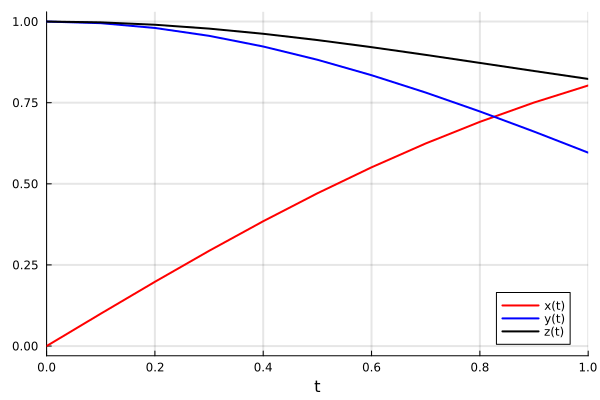

In [7]:
#Построение графика решения
using Plots
Plots.plot(sol, idxs=(0,1),  color = :red, linewidth = 2, label = "x(t)",gridlinewidth=2)
Plots.plot!(sol, idxs=(0,2) , color = :blue, linewidth = 2, label = "y(t)",gridlinewidth=2)
Plots.plot!(sol, idxs=(0,3), color = :black, linewidth = 2, label = "z(t)",gridlinewidth=2)

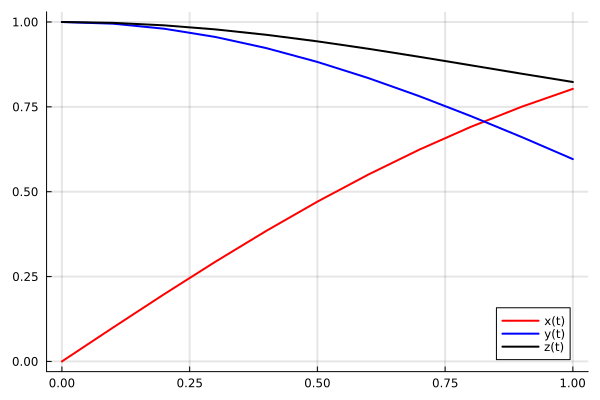

In [8]:
#Другая версия построения графика решения

ttt=zeros(11)
x=zeros(11)
y=zeros(11)
z=zeros(11)
for i=1:11
    ttt[i]=sol.t[i]
    x[i]=sol.u[i][1]
    y[i]=sol.u[i][2]
    z[i]=sol.u[i][3]
end
Plots.plot(ttt, x, color = :red, linewidth = 2, label = "x(t)",gridlinewidth=2)
Plots.plot!(ttt, y , color = :blue, linewidth = 2, label = "y(t)",gridlinewidth=2)
Plots.plot!(ttt, z, color = :black, linewidth = 2, label = "z(t)",gridlinewidth=2)

Наложим точки, найденные с помощью метода **Эйлера** на график решения, полученный с помощью ***solve***.

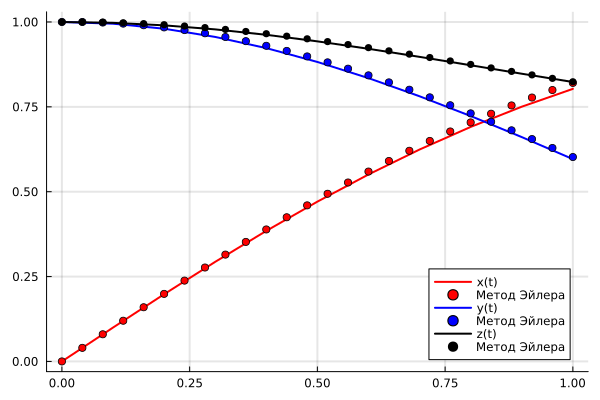

In [9]:
Plots.plot(ttt, x, color = :red, linewidth = 2, label = "x(t)",gridlinewidth=2)
Plots.scatter!(te,ye[1,:] , color = :red, markersize = 4, label = "Метод Эйлера")
Plots.plot!(ttt, y , color = :blue, linewidth = 2, label = "y(t)",gridlinewidth=2)
Plots.scatter!(te,ye[2,:] , color = :blue, markersize = 4, label = "Метод Эйлера")
Plots.plot!(ttt, z, color = :black, linewidth = 2, label = "z(t)",gridlinewidth=2)
Plots.scatter!(te,ye[3,:] , color = :black, markersize = 4, label = "Метод Эйлера")

# Глава 19 Численное решение уравнений в частных производных
Здесь на примере параболичского уравнения рассмотрим явную разностную схему численного решения уравнений в частных производных, на примере эллиптического уравнения - неявную разностную схему решения уравнения в частных производных.

Краткое описание разностных методов решения уравнений в частных производных можно найти в книге билиотеки ALT - **Е.Р.Алексеев, К.В. Дога, О.В. Чеснокова Scilab: Решение инженерных и математических задач** https://www.altlinux.org/Images.www.altlinux.org/3/3a/Scilab.pdf. Для более подробного изучения рекомендуем  учебники **Самарский А.А. Теория разностных схем**, **Вержбицкий В.М. Основы численных методов**.



Рассмотрим решение параболического уравнения на примере следующей
задачи.

**Задача 1**. Решить параболическое уравнение, описывающее распределение температуры в
стержне длиной $L$, начальная температура стержня задается произвольной функцией $\varphi(x)$. Температуры концов стержня равны $u(0,t)=U_{1}=\mbox{const}$, $u(L,t)=U_{2}=\mbox{const}$

$$
  \begin{array}{l}
  \displaystyle\frac{\partial u}{\partial t} =
   a^{2}\frac{\partial^{2}u}{\partial t^{2}} + f(x,t),\qquad 
   a^{2}=\frac{\lambda}{c\rho},\qquad 0<x<L,\qquad 0<t<\infty,\\
   u(0,t)=U_{1}=\mbox{const},\qquad u(L,t)=U_{2}=\mbox{const},\qquad 0<t<\infty,\\
   u(x,0)=\varphi(x),\qquad 0<x<L,
\end{array}
$$
здесь  $a^2$ – коэффициент температуропроводности, 
$\lambda$ – коэффициент теплопроводности материала стержня,
$c$ – удельная теплоемкость,  $\rho$ - плотность.

Заменим производные разностными соотношениями 

$$
  \frac{\partial u(x_{i},t_{j})}{\partial t}=\frac{u_{i,j+1}-u_{i,j}}{\Delta }
$$

$$
  \frac{\partial ^{2}u(x_{i},t_{j})}{\partial
x^{2}}=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^{2}}.
$$

Получим явную разностную вычислительную схему

$$
  u_{i,j+1}=\gamma \cdot u_{i,j-1}+(1-2\gamma) \cdot u_{i,j}+\gamma u_{i,j+1} + \Delta \cdot f_{i,j}
$$


$$
  u_{0,j}=\mu_{j},\qquad u_{n,j}=\nu_{j},\qquad u_{i,0}=\varphi_{i},\qquad
   \gamma=\frac{a^{2}\Delta}{h^{2}}
$$

Здесь h – шаг по переменной x, $\displaystyle h=\frac{L}{h}$, $i=0,1,2,\ldots,n$, 
$\displaystyle\Delta$ - шаг по времени, $\displaystyle\Delta =\frac{t_{k}-t_{0}}{k}$, $j=0,1,\ldots k$.


Ниже приведён код на языке Julia решения задачи 1.

Входными данными программы решения задачи являются:

1. N=50 – количество интервалов, на которые разбивается отрезок $(0, L)$;
1. K=200 – количество интервалов, на которые разбивается отрезок $(0, T)$;
1. L=5 – длина стержня;
1. T=3 – интервал времени;
1. a=0.4 – параметр дифференциального уравнения.

Результат:

1. решение – сеточная функция $u$, определенная на сетке  $\Omega _{h}^{\Delta }$;
1. массивы $x$ и $t$.


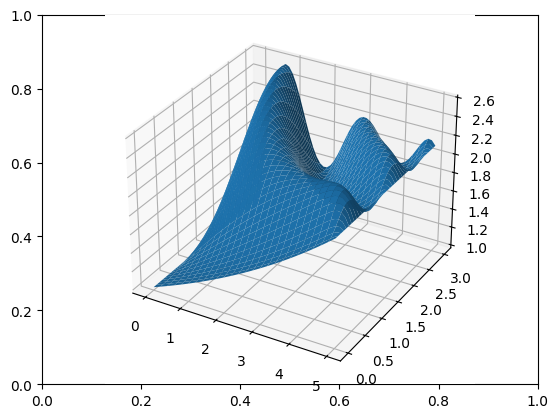

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7ff213d146a0>

In [10]:
using PyPlot
#using Plots
#Правая часть дифференциального уравнения.
function f(x,t)
  return sin(x*t)
end
#Начальное условие
function fi(x)
  return exp(0.15*x)
end
#Условие на левой границе
function myu(t)
  return 1
end
#Условие на правой границе
function nyu(x)
  return 2.117
end
#Решение параболического уравнения методом сеток с
#помощью явной разностной схемы. N - количество участков,
#на которые разбивается интервал по х (0,L); K - количество
#участков, на которые разбивается интервал по t (0,T); a -
#параметр дифференциального уравнения теплопроводности,
#Функция возвращает матрицу решений u и вектора x, t
#Вычисляем шаг по х
N=50
K=200
L=5
T=3
a=0.4 
#Вычисляем шаг по x
h=L/N;
#Вычисляем шаг по t
  delta=T/K;
#Формируем массив x и первый столбец матрицы решений U 
#из начального условия
x=zeros(N+1)
t=zeros(K+1)
u=zeros(N+1,K+1)
for i=1:N+1
    x[i]=(i-1)*h;
    u[i,1]=fi(x[i]);
end
#Формируем массив t, первую и последнюю строку 
#матрицы решений U из граничных условий
for j=1:K+1
    t[j]=(j-1)*delta;
    u[1,j]=myu(t[j]);
    u[N+1,j]=nyu(t[j]);
end
gam=a^2*delta/h^2;
#Формируем матрицу решений u с помощью явной разностной схемы
for j=1:K
    for i=2:N
        u[i,j+1]=gam*u[i-1,j]+(1-2*gam)*u[i,j]+gam*u[i+1,j]+delta*f(x[i],t[j]);
    end
  end
# Строим график решения
# Вывод  решения u с помощью функции surf из пакета PyPlot
PyPlot.surf(x,t,u')

**Задача 2**. Рассмотрим разностную схему для решения эллиптического уравнения

$$
\begin{array}{l}
  \displaystyle \Delta u=\frac{\partial^{2}\Psi}{\partial x^{2}} +
   \frac{\partial^{2}\Psi}{\partial y^{2}} - \frac{5}{x} \frac{\partial\Psi}{\partial x}=-2\\
\end{array}
$$

в прямоугольной области  $$\Omega (R-b\leqslant x\leqslant R+b,-a\leqslant y\leqslant a)$$
с граничными условиями Дирихле на границе $\Gamma$

$$
\Psi_{(x,y)\in \Gamma}= 0.
$$

Построим сетку  $\Omega_{hx}^{hy}$, для чего проведем в области  $\Omega$ прямые, параллельные осям $y=y_j$ и $x=x_i$, где $x_{i}=R-b+i\cdot hx$, $\displaystyle hx=\frac{2b}{Nx}$, $i=0,1,2,\ldots,Nx$, $y_{j}=-a+j\cdot hy$, $\displaystyle hy=\frac{2a}{Ny}$, $j=0,1,\ldots,Ny$. Для построения разностного уравнения заменим частные производные и граничные условия следующими соотношениями:

$$
 \begin{array}{l}
   \displaystyle
 \frac{\partial^{2}\Psi(x_{i},y_{j})}{\mathstrut\partial x^{2}} = 
  \frac{\Psi_{i-1,j}-2\Psi_{i,j}+\Psi_{i+1,j}}{hx^{2}} \\
  \displaystyle
 \frac{\partial^{2}\Psi(x_{i},y_{j})}{\partial y^{2}} =
  \frac{\Psi_{i,j-1}-2\Psi_{i,j}+\Psi_{i,j+1}}{hy^{2}}
 \end{array}
$$

$$
  \begin{array}{l}
  \Psi_{i,0} = \Psi_{i,Ny} =0,\qquad i=0,1,\ldots,Nx\\
  \Psi_{0,j} = \Psi_{Nx,j}=0,\qquad j=0,1,\ldots,Ny
  \end{array}
$$

С помощью приведённых выше соотношений преобразуем эллиптическую краевую задачу к следующей системе разностных уравнений.
$$
 \begin{array}{l}
 \displaystyle
  \Psi_{i,j} = \frac{1}{\mathstrut{}A} \left(B_{i}\Psi_{i+1,j} + C_{i}\Psi_{i-1,j} + 
   D(\Psi_{i,j-1} + \Psi_{i,j+1}) + 2\right) \\
 \displaystyle
  A = \frac{\mathstrut{}2}{hx^{2}} + \frac{2}{hy^{2}},\qquad
   B_{i} = \frac{1}{hx^{2}} + \frac{5}{2hx\,x_{i}},\qquad
   C_{i} = \frac{1}{hx^{2}} - \frac{5}{2hx\,x_{i}},\qquad
   D=\frac{1}{hy^{2}}\\
   i=1,2,\ldots,\mathstrut{}Nx-1;\qquad j=1,2,\ldots,Ny-1\\
   \Psi_{i,0}=\Psi_{i,Ny} = 0,\qquad i=0,1,\ldots,Nx\\
   \Psi_{0,j}=\Psi_{Nx,j}=0,\qquad i=0,1,\ldots ,Ny
  \end{array}
$$

Эту систему можно решать итерационными методами (например **методом Зейделя**). В случае медленной сходимости итерационных процессов при решении сеточных уравнений, получаемых при аппроксимации
гиперболических и эллиптических задач, имеет смысл попробовать заменить метод Зейделя градиентными методами (или методами релаксации). На листинге представлено решение уравнения сеточным методом, а также – график найденного решения.

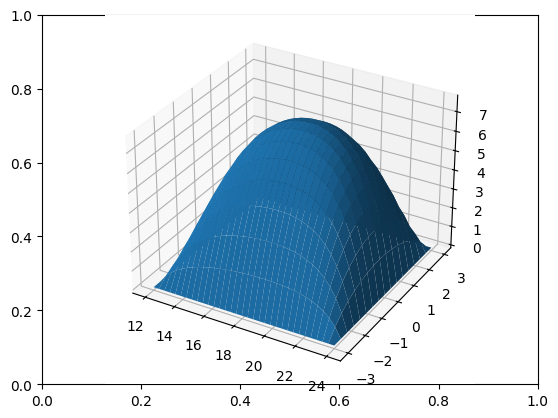

In [11]:
using PyPlot
r=18
a=3
b=6
Nx=32
Ny=16
eps=0.01    
#Входные данные:
#r, a, b - значения, определяющие область решения задачи,
#Nx - количество участков, на которые разбивается интервал по
#х(R-b,R+b);
#Ny - количество участков, на которые разбивается интервал по
#y (-a,a);
#eps - точность решения уравнения методом Зейделя.
#Выходные данные:
#psi - матрица решений в узлах сетки, массив x, массив y,
#k - количество итерация при решении разностного уравнения
# методом Зейделя.
#Вычисляем шаг по y
hy=2*a/Ny;
#Вычисляем шаг по x
hx=2*b/Nx;
x=zeros(Nx+1)
B=zeros(Nx+1)
C=zeros(Nx+1)
y=zeros(Ny+1)
psi=zeros(Nx+1,Ny+1)
R=zeros(Nx,Ny)
#Формируем массив x, первый и последний столбцы матрицы
#решений psi из граничного условия
for i=1:Nx+1
    x[i]=r-b+(i-1)*hx;
    psi[i,1]=0;
    psi[i,Ny+1]=0;
end
#Формируем массив y, первую и последнюю строки матрицы
#решений psi из граничного условия
for j=1:Ny+1
    y[j]=-a+(j-1)*hy;
    psi[1,j]=0;
    psi[Nx+1,1]=0;
end;
#Вычисляем коэффициенты разностного уравнения
A=2/hy^2+2/hx^2;
D=1/hy^2;
for i=2:Nx+1
    B[i]=1/hx^2+5/(2*hx*x[i]);
    C[i]=1/hx^2-5/(2*hx*x[i]);
end
#Решение разностного уравнения методом Зейделя с
#точностью eps
p=1;
k=0;
while p>eps
# Формируем очередное приближение - матрицу psi и матрицу ошибок R    
    for i=2:Nx
      for j=2:Ny
        V=1/A*(B[i]*psi[i-1,j]+C[i]*psi[i+1,j]+D*(psi[i,j-1]+psi[i,j+1])+2);
        R[i,j]=abs(V-psi[i,j]);
        psi[i,j]=V;
      end
    end
 # Вычисляем норму матрицы ошибок   
    p=R[2,2];
    for i=2:Nx
      for j=2:Ny
        if R[i,j]>p
          p=R[i,j];
        end
      end
    end
  k=k+1;
end
# Вывод  решения psi с помощью функции surf из пакета PyPlot
PyPlot.surf(x,y,psi');